In [8]:
# -*- coding: UTF-8 -*-

import cv2
import os
from moviepy.editor import *
import json
import PIL
#import tqdm
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import glob
import random
import math
import numpy as np
import scipy.ndimage
import copy
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib.gridspec as gridspec
import seaborn as sns
from PIL import Image
import mpl_toolkits.axes_grid1
import matplotlib.cm as cm

server_data = '/Volumes/Drosophila2/Data'
local_data = '/Users/hiroki/Desktop/study/code/data'

datasets = {
        'mating'    : 'TsukubaRIKEN/mating_movie',
        'smile1'    : 'TsukubaRIKEN/seong09-191214-w1118EclosedFemale-smile-24h',
        'smile2'    : 'TsukubaRIKEN/seong09-191214-w1118EclosedMale-smile-24h',
        'w1118_1'   : 'TsukubaRIKEN/seong09-200429.w1118.M.ST',
        'w1118_2'   : 'TsukubaRIKEN/seong07-200422-w1118.F.ST',
        'w1118_3'   : 'TsukubaRIKEN/seong08-200429-w1118.ST.all-free',
        'OrR_1'     : 'TsukubaRIKEN/seong05-200514-OrR.M.ST',
        'OrR_2'     : 'TsukubaRIKEN/seong06-200514-OrR.F.ST',
        'OrR_3'     : 'TsukubaRIKEN/seong08-200514-0rR.ST.all-free',
        'CS_1'      : 'TsukubaRIKEN/seong09-200513.CS.M.ST',
        'CS_2'      : 'TsukubaRIKEN/seong10-20513CS.F.ST',
        'CS_3'      : 'TsukubaRIKEN/seong07-200513-CS.free.ST'
        }

mating_mv = [
        'vi_0033_20190424_133130',
        'vi_0034_20190425_013130',
        'vi_0035_20190425_133130',
        'vi_0036_20190426_013130',
        'vi_0037_20190426_133131',
        'vi_0038_20190427_013131',
        'vi_0039_20190427_133131',
        ]

smile1_mv = [
            'seong09-191214-w1118EclosedFemale-smile-24h',
            'seong09-191214-w1118EclosedFemale-smile-empty',
            'seong09-191214-w1118EclosedFemale-smile-empty2'
            ]

smile2_mv = [
            'seong09-191214-w1118EclosedMale-smile-24h',
            'seong09-191214-w1118EclosedMale-smile-empty1',
            'seong09-191214-w1118EclosedMale-smile-empty2'
            ]

w1118_1_mv = [
            'vi_0000_20200429_104213-back',
            'vi_0001_20200429_112841',
            'vi_0002_20200430_112841',
            'vi_0003_20200501_112841'
            ]

w1118_2_mv = [
            'seong07-200422-w1118.F.ST-back',
            'vi_0001_20200429_110751',
            'vi_0002_20200430_110751',
            'vi_0003_20200501_110751'
            ]

w1118_3_mv = [
            'vi_0001_20200429_094729',
            'vi_0002_20200429_104150',
            'vi_0003_20200430_104150',
            'vi_0004_20200501_104150'
            ]

OrR_1_mv = [
            'vi_0099_20200514_152926',
            'vi_0102_20200514_224210',
            'vi_0103_20200515_224210'
            ]

OrR_2_mv = [
            'vi_0110_20200514_152929(1)',
            'vi_0113_20200514_224230(1)',
            'vi_0114_20200515_224230'
            ]

OrR_3_mv = [
            'vi_0011_20200514_153005 (2)',
            'vi_0013_20200514_224247',
            'vi_0014_20200515_224247'
            ]

CS_1_mv =  [
            'vi_0014_20200513_182108 (1)',
            'vi_0015_20200513_193414 (1)',
            'vi_0016_20200514_193414'
            ]

CS_2_mv =  [
            'vi_0006_20200513_182208 (2)',
            'vi_0007_20200513_193827 (1)',
            'vi_0008_20200514_193827'
            ]

CS_3_mv =  [
            'vi_0016_20200513_182125 (1)',
            'vi_0017_20200513_194218 (1)',
            'vi_0018_20200514_194219'
            ]

movies = {
        'mating'    : mating_mv ,
        'smile1'    : smile1_mv ,
        'smile2'    : smile2_mv ,
        'w1118_1'   : w1118_1_mv,
        'w1118_2'   : w1118_2_mv,
        'w1118_3'   : w1118_3_mv,
        'OrR_1'     : OrR_1_mv  ,
        'OrR_2'     : OrR_2_mv  ,
        'OrR_3'     : OrR_3_mv  ,
        'CS_1'      : CS_1_mv   ,
        'CS_2'      : CS_2_mv   ,
        'CS_3'      : CS_3_mv   ,
        }

# 1:Male,2:Female,3:free

targets = [
            #'smile1',
            #'smile2',
            'w1118_1',
            'w1118_2',
            'w1118_3',
            'OrR_1',
            'OrR_2',
            'OrR_3',
            'CS_1',
            'CS_2',
            'CS_3'
            ]


被接近対象あり

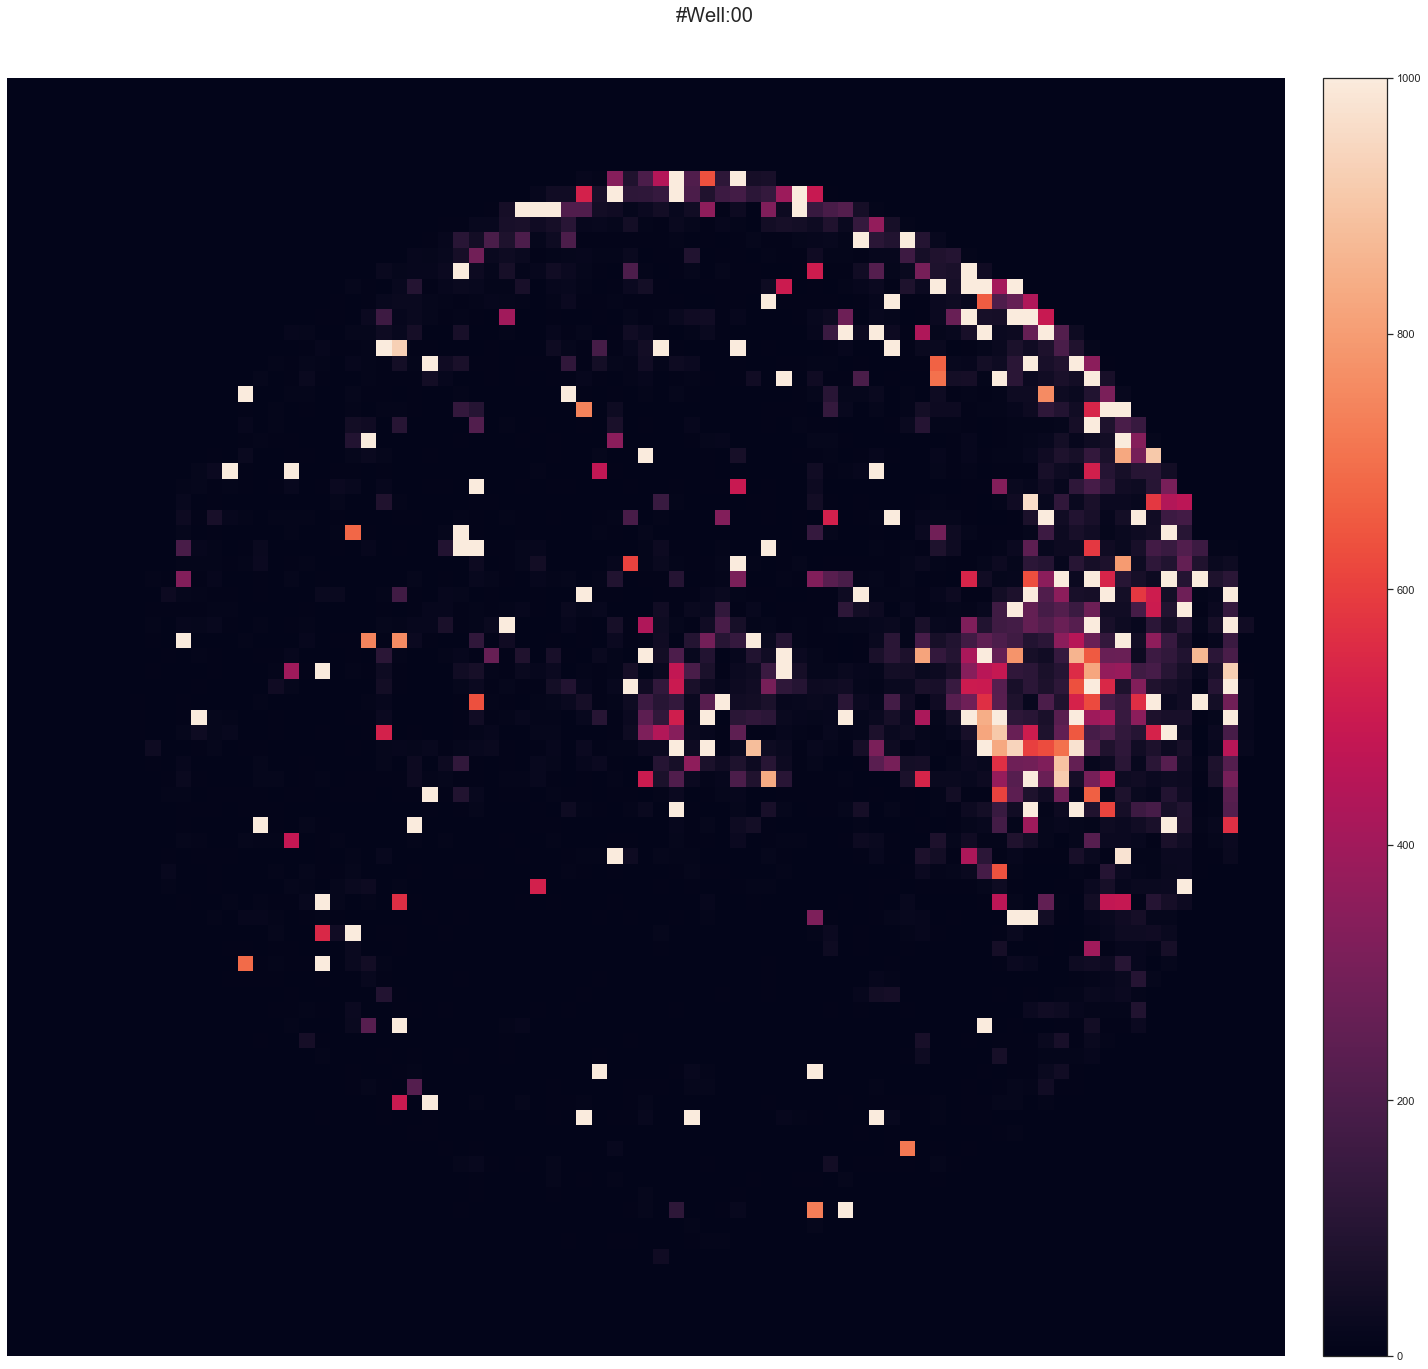

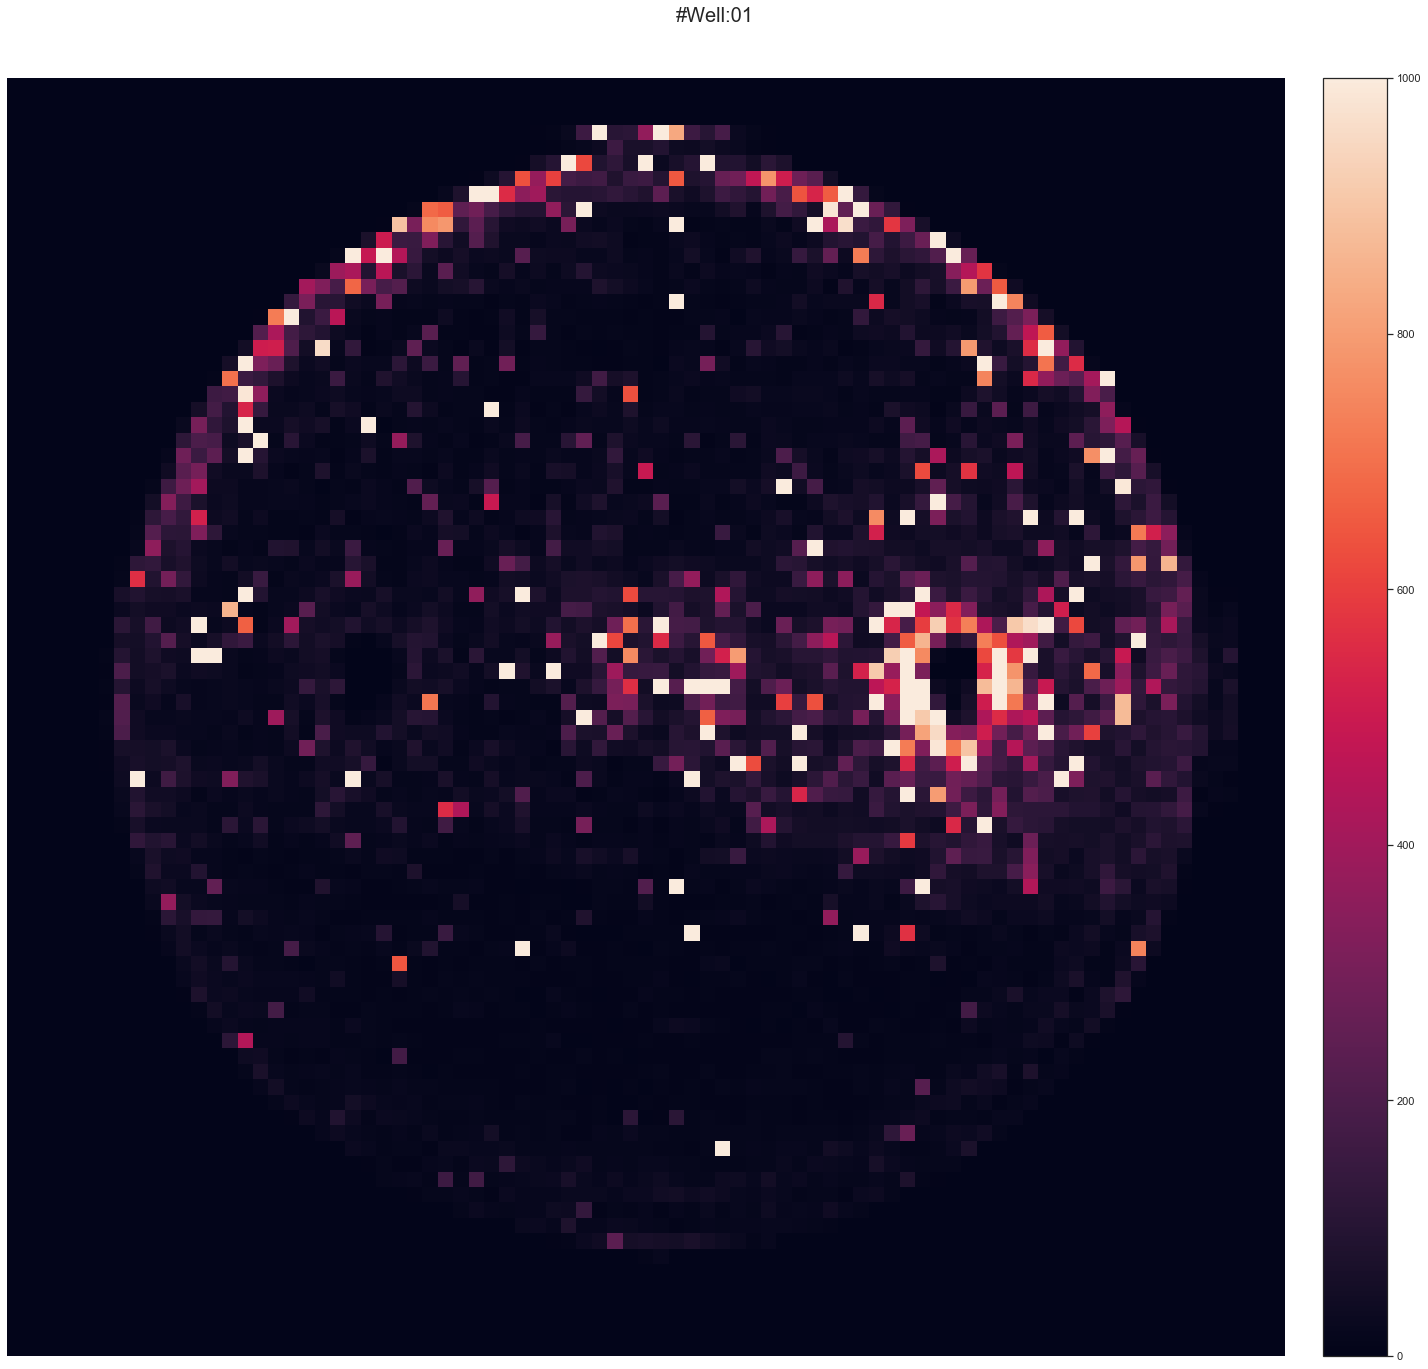

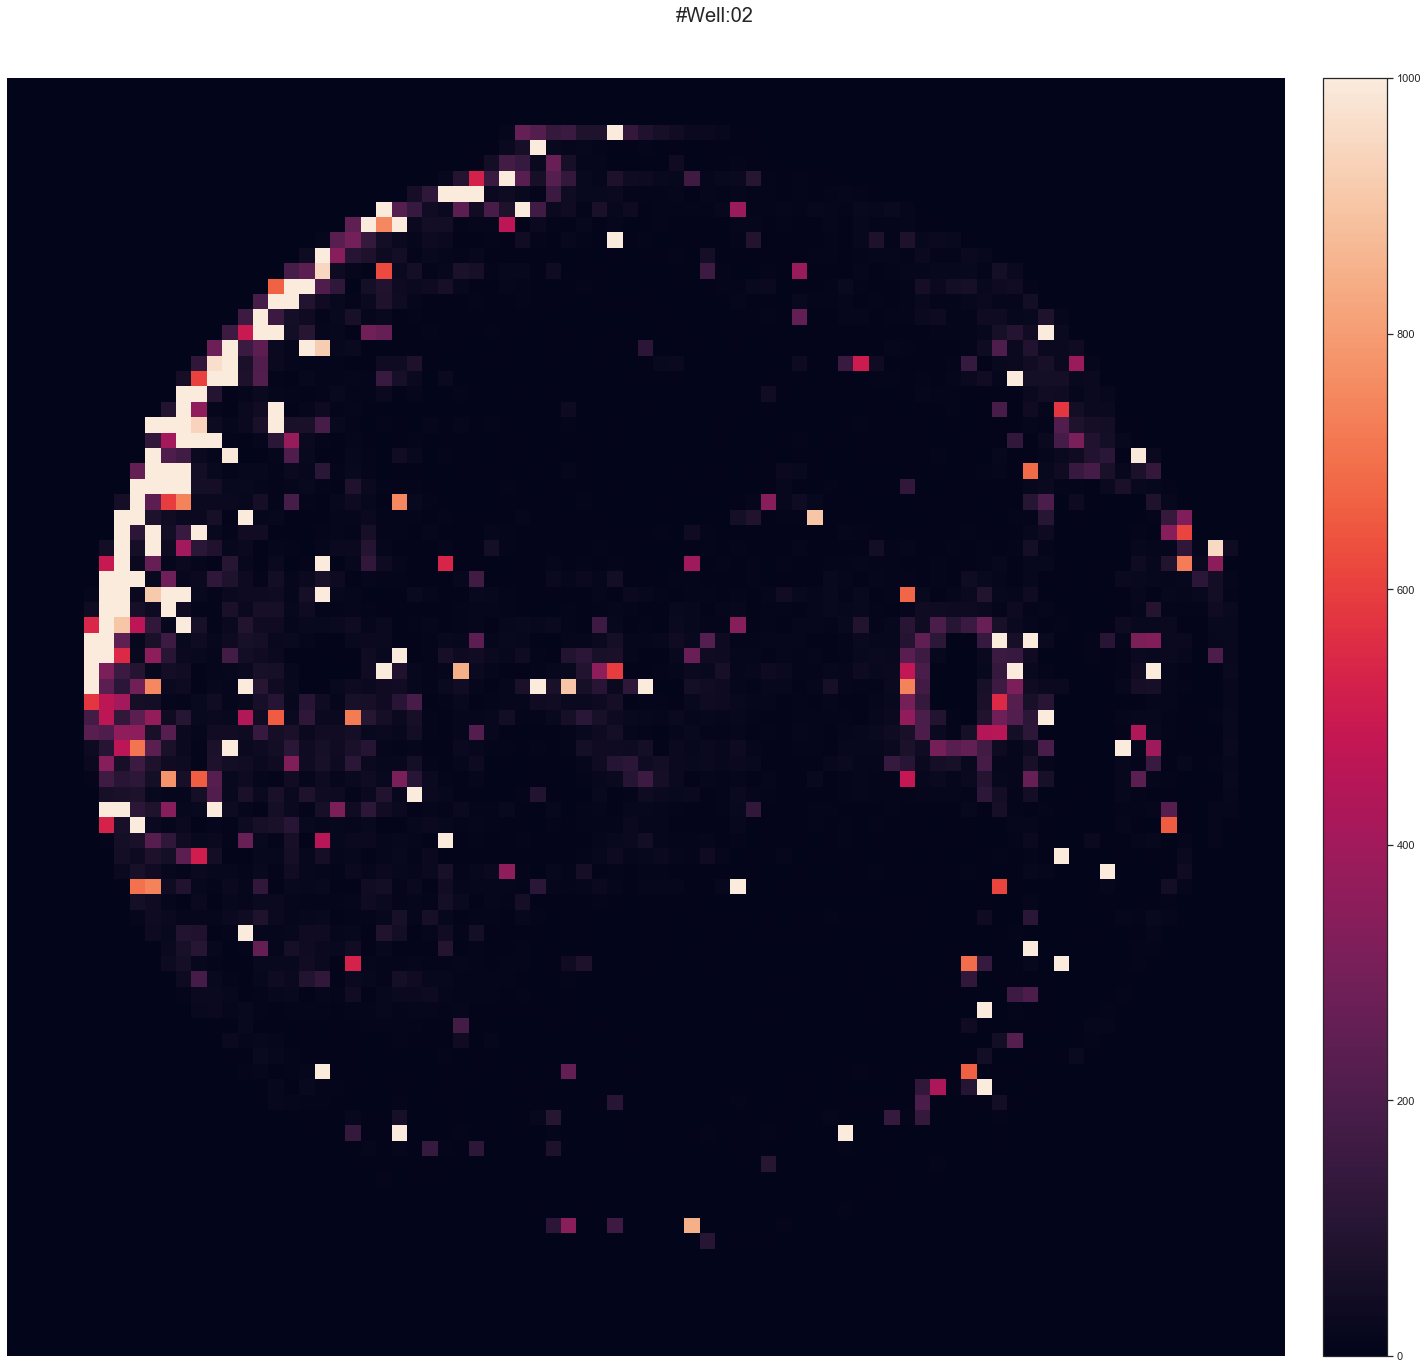

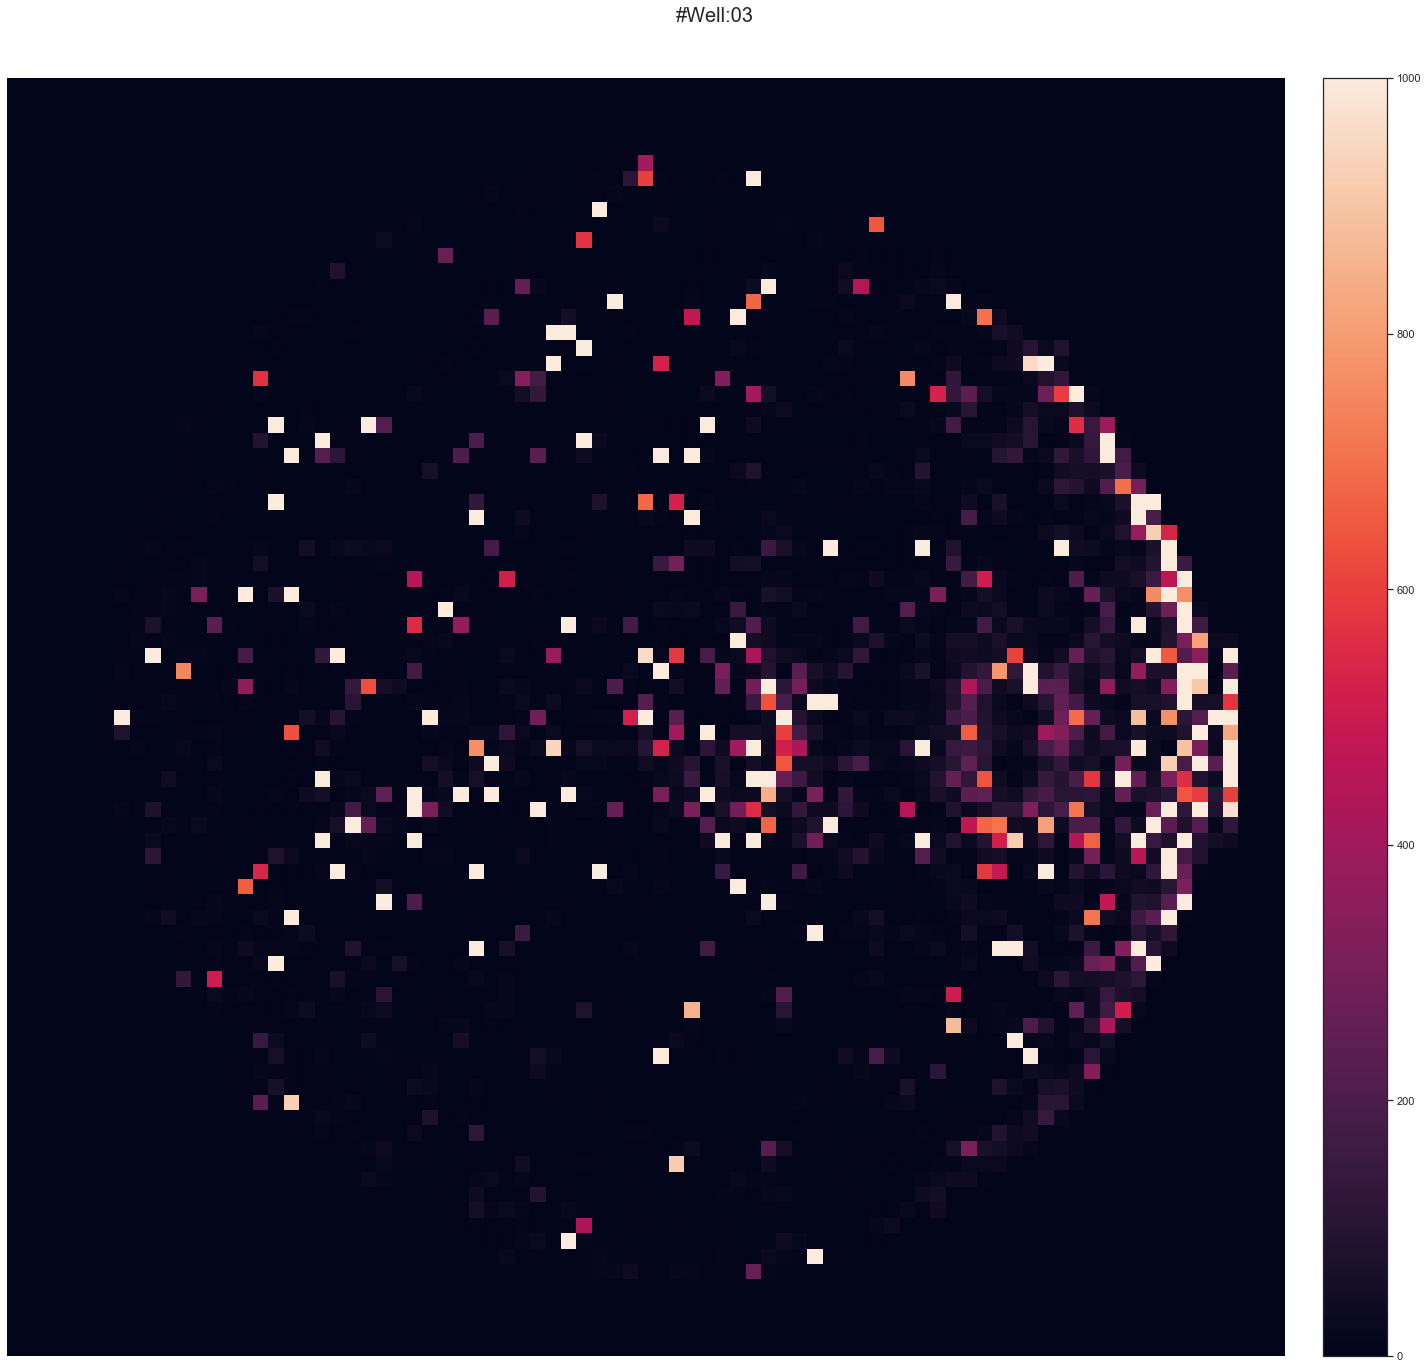

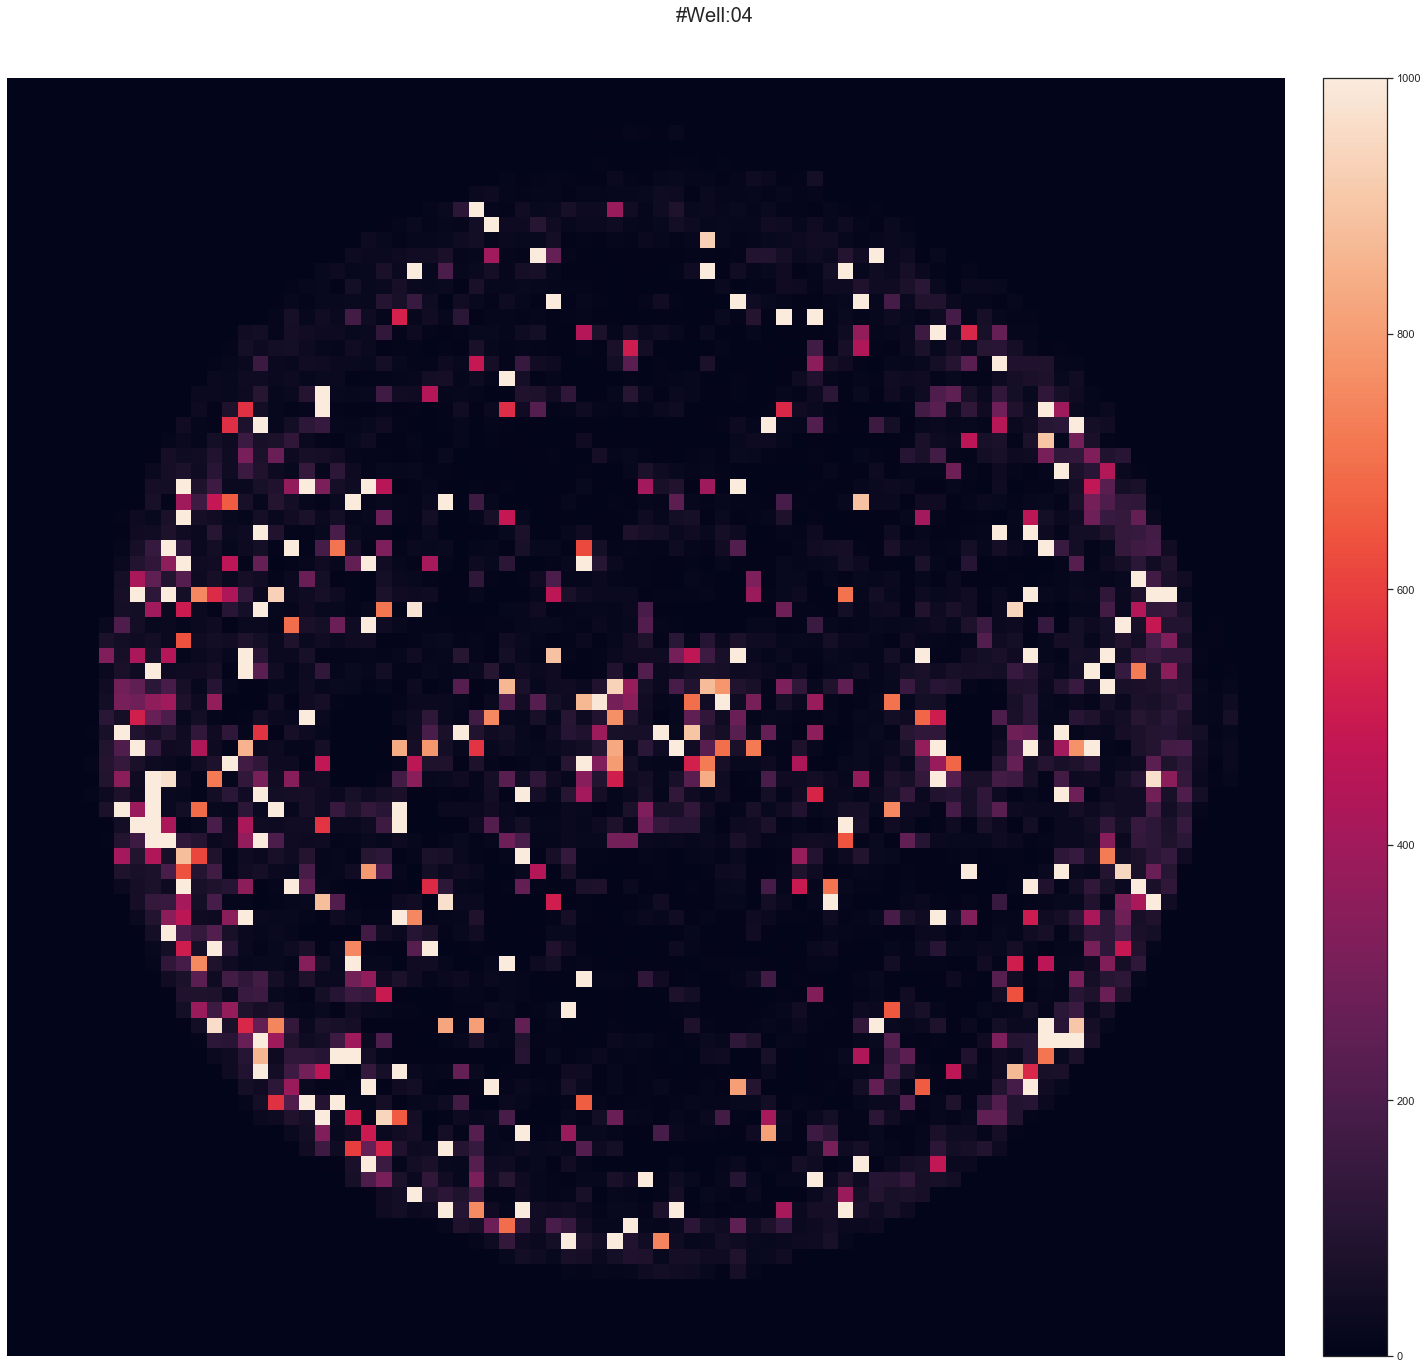

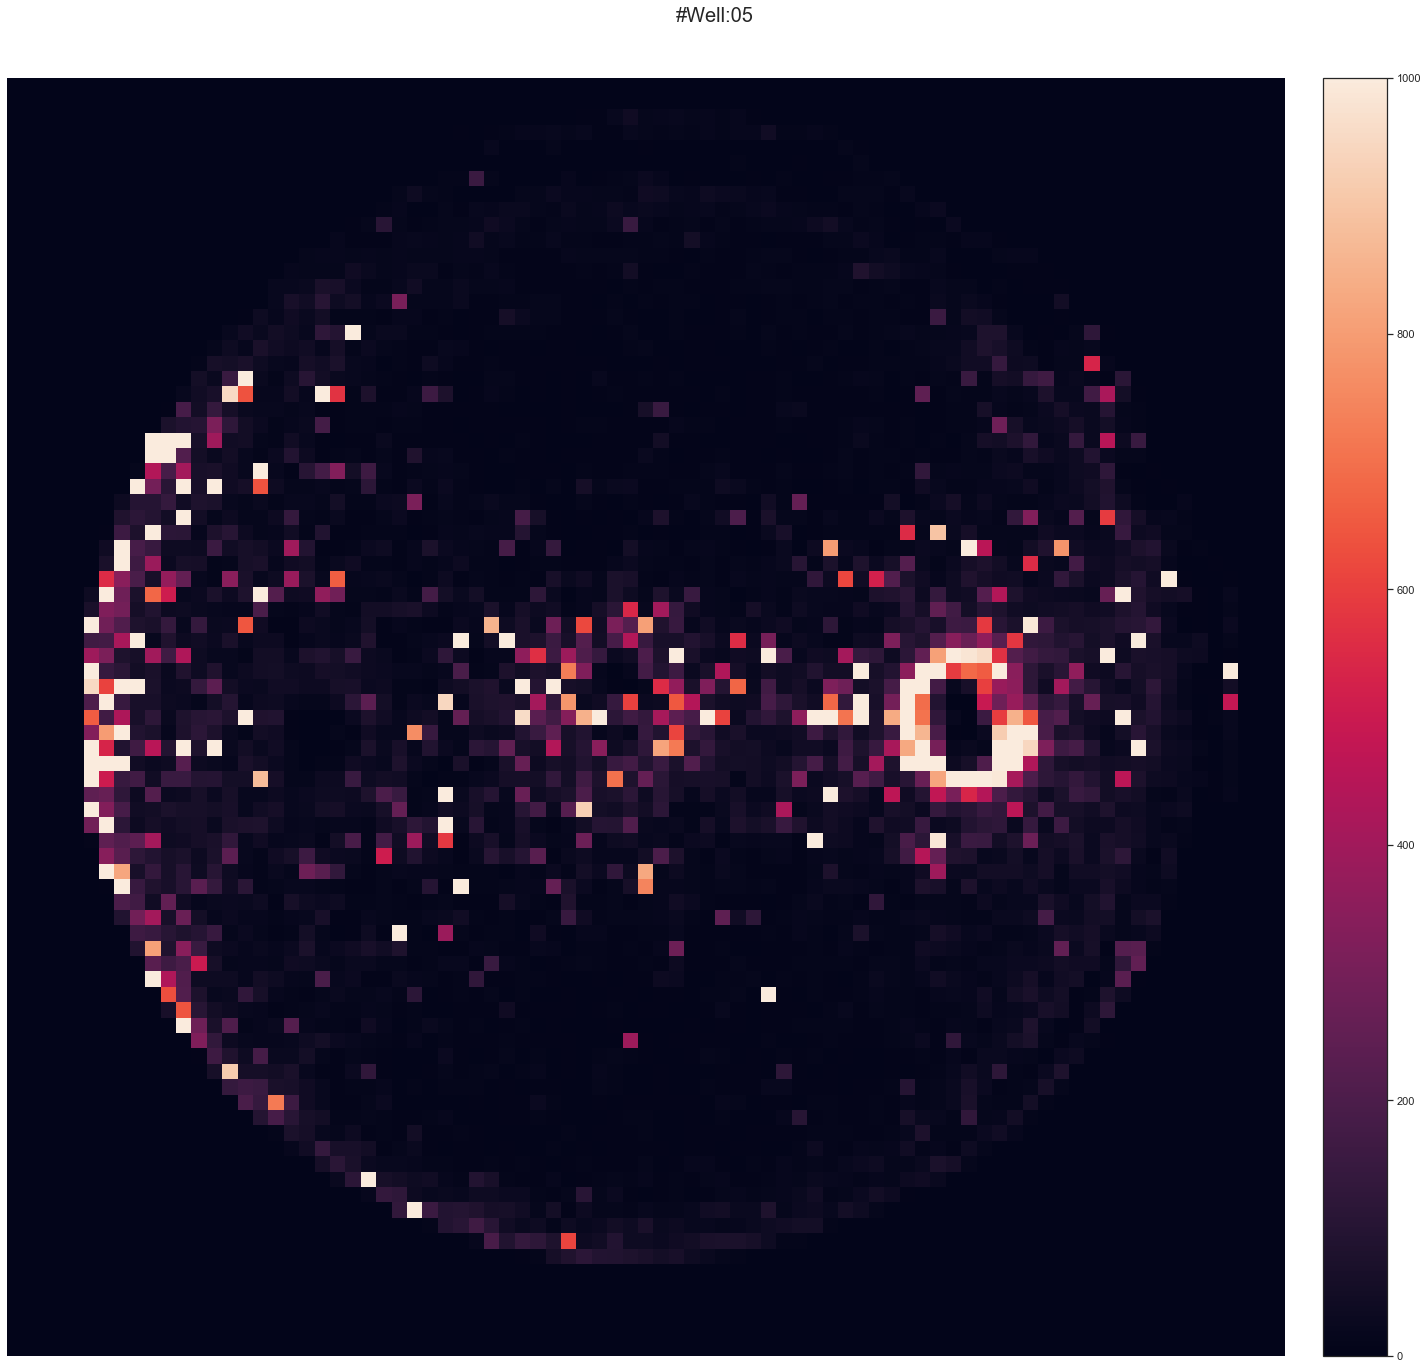

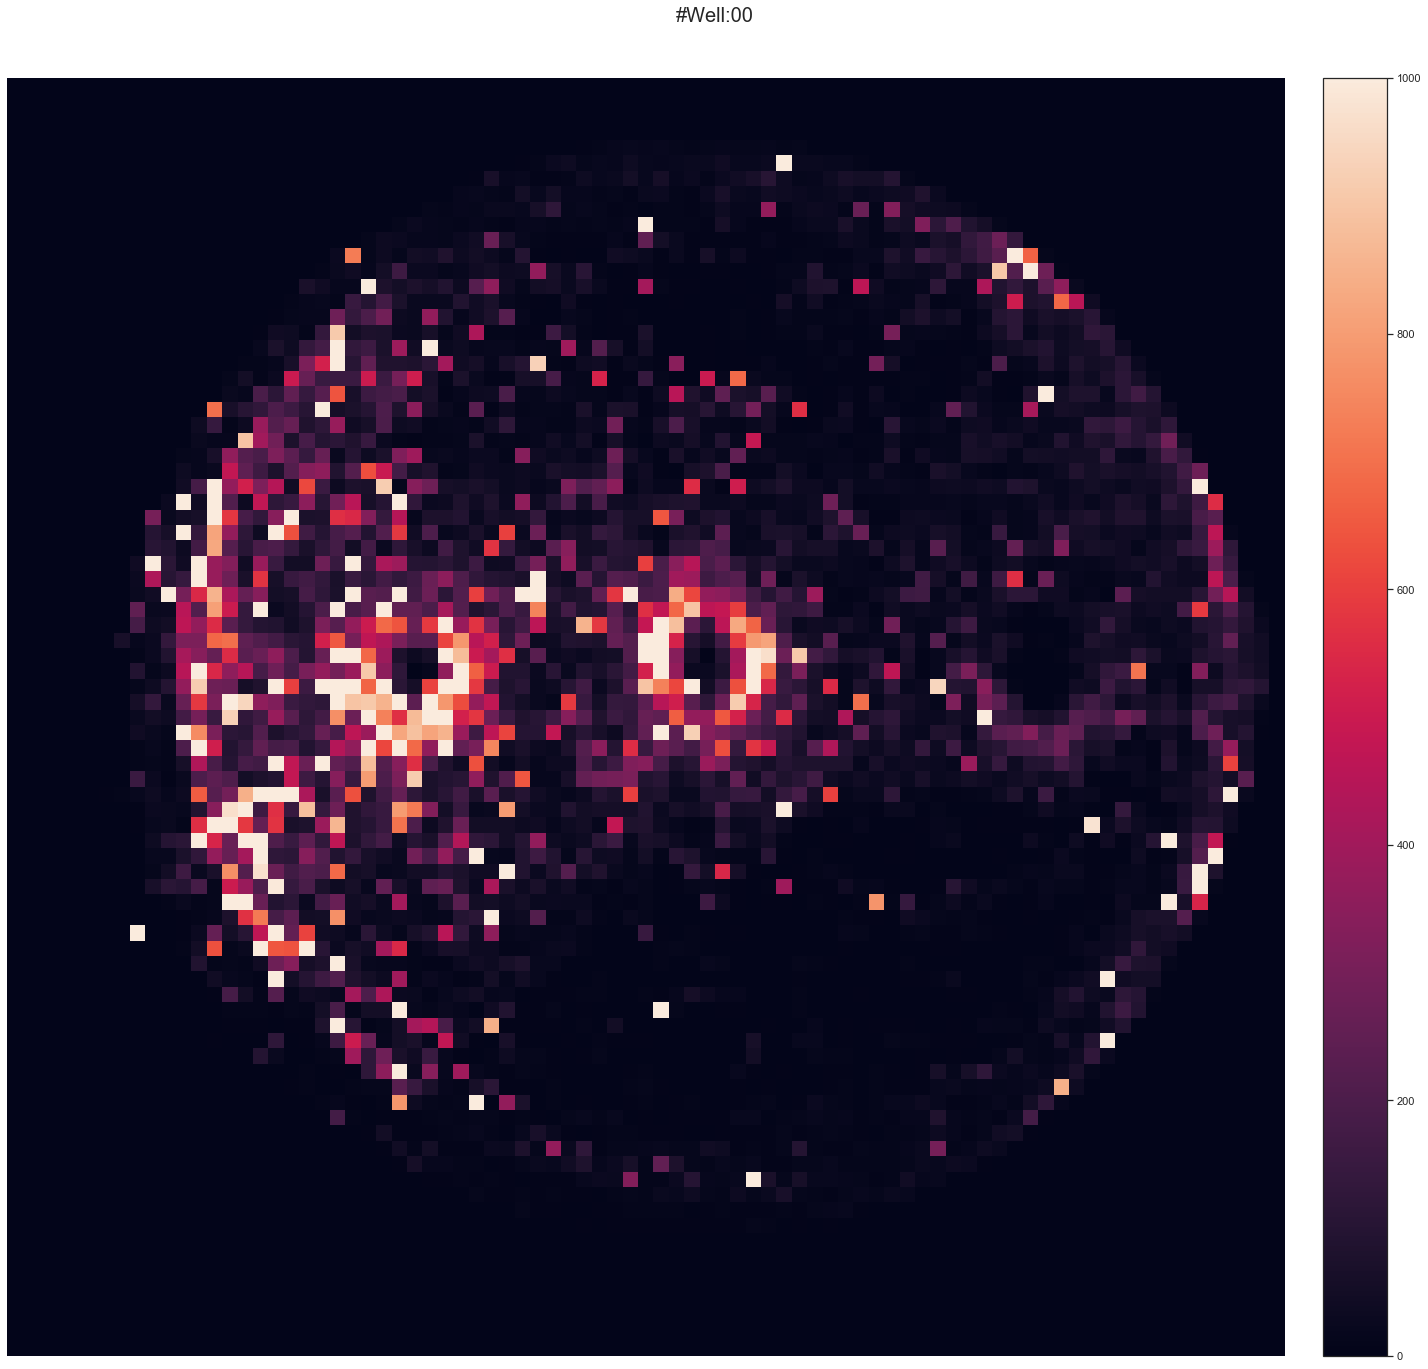

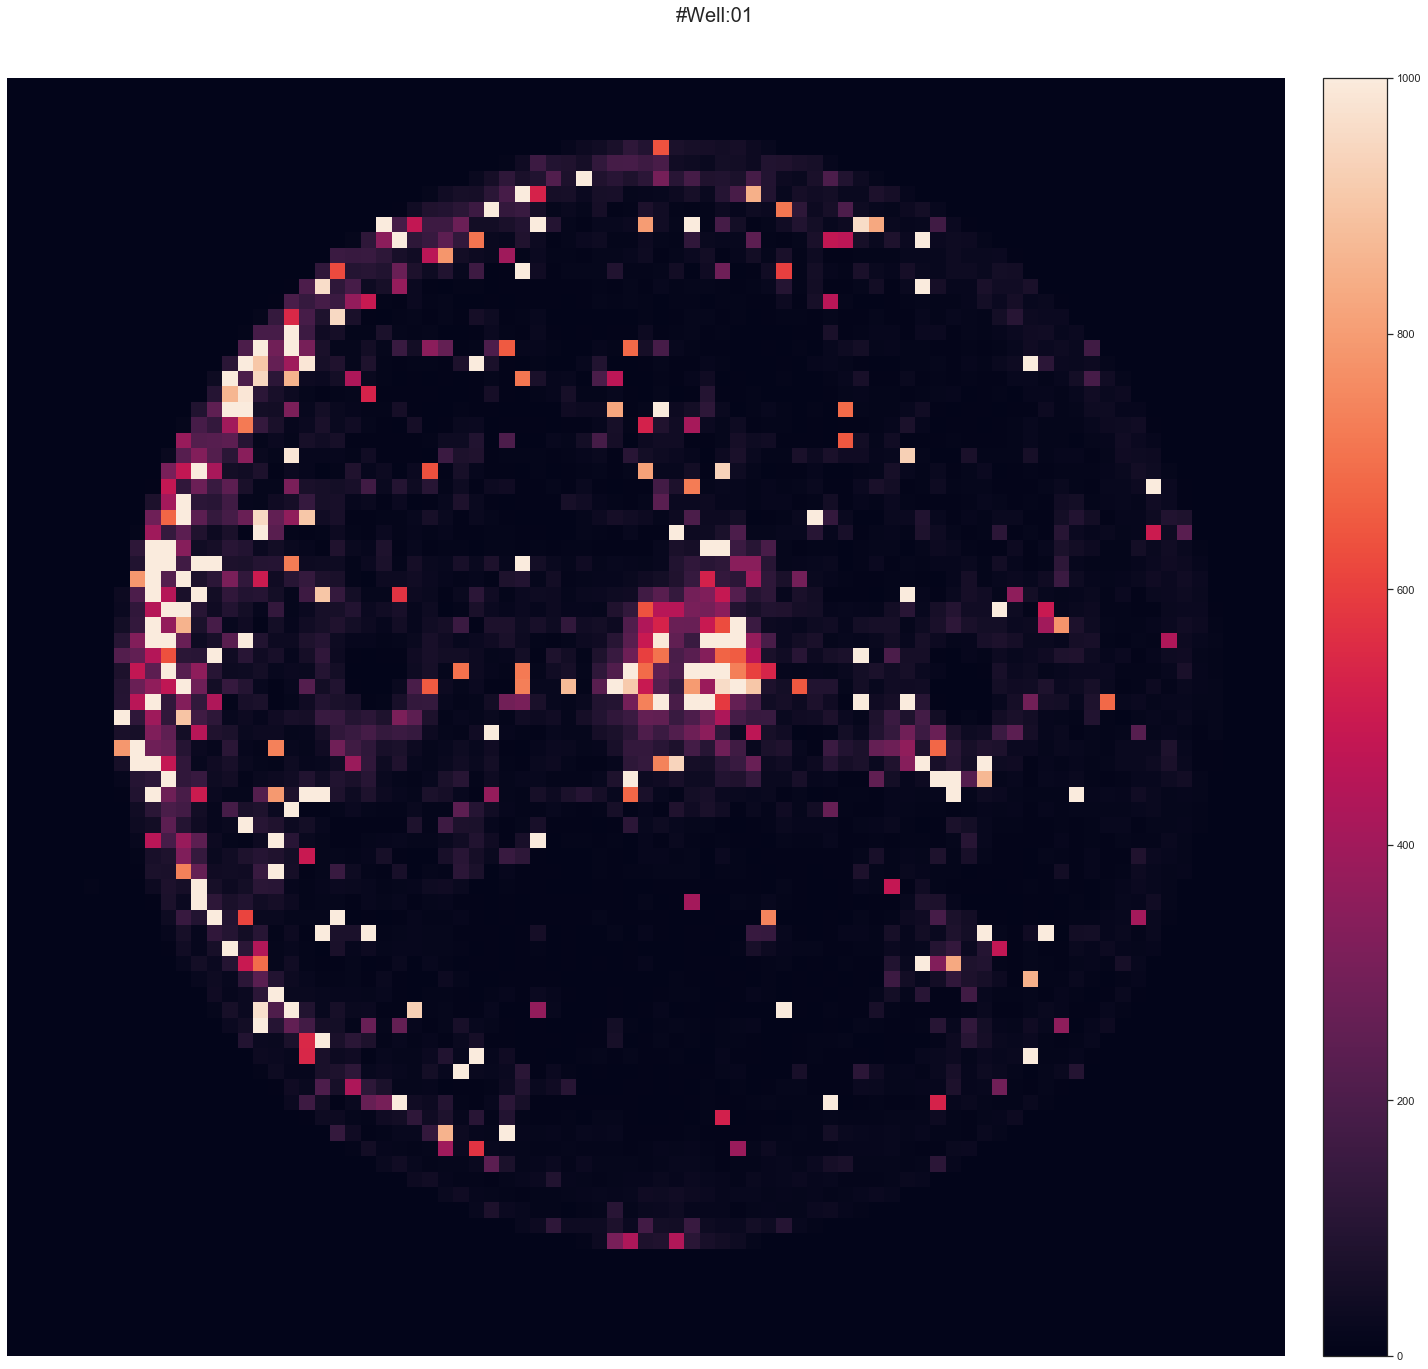

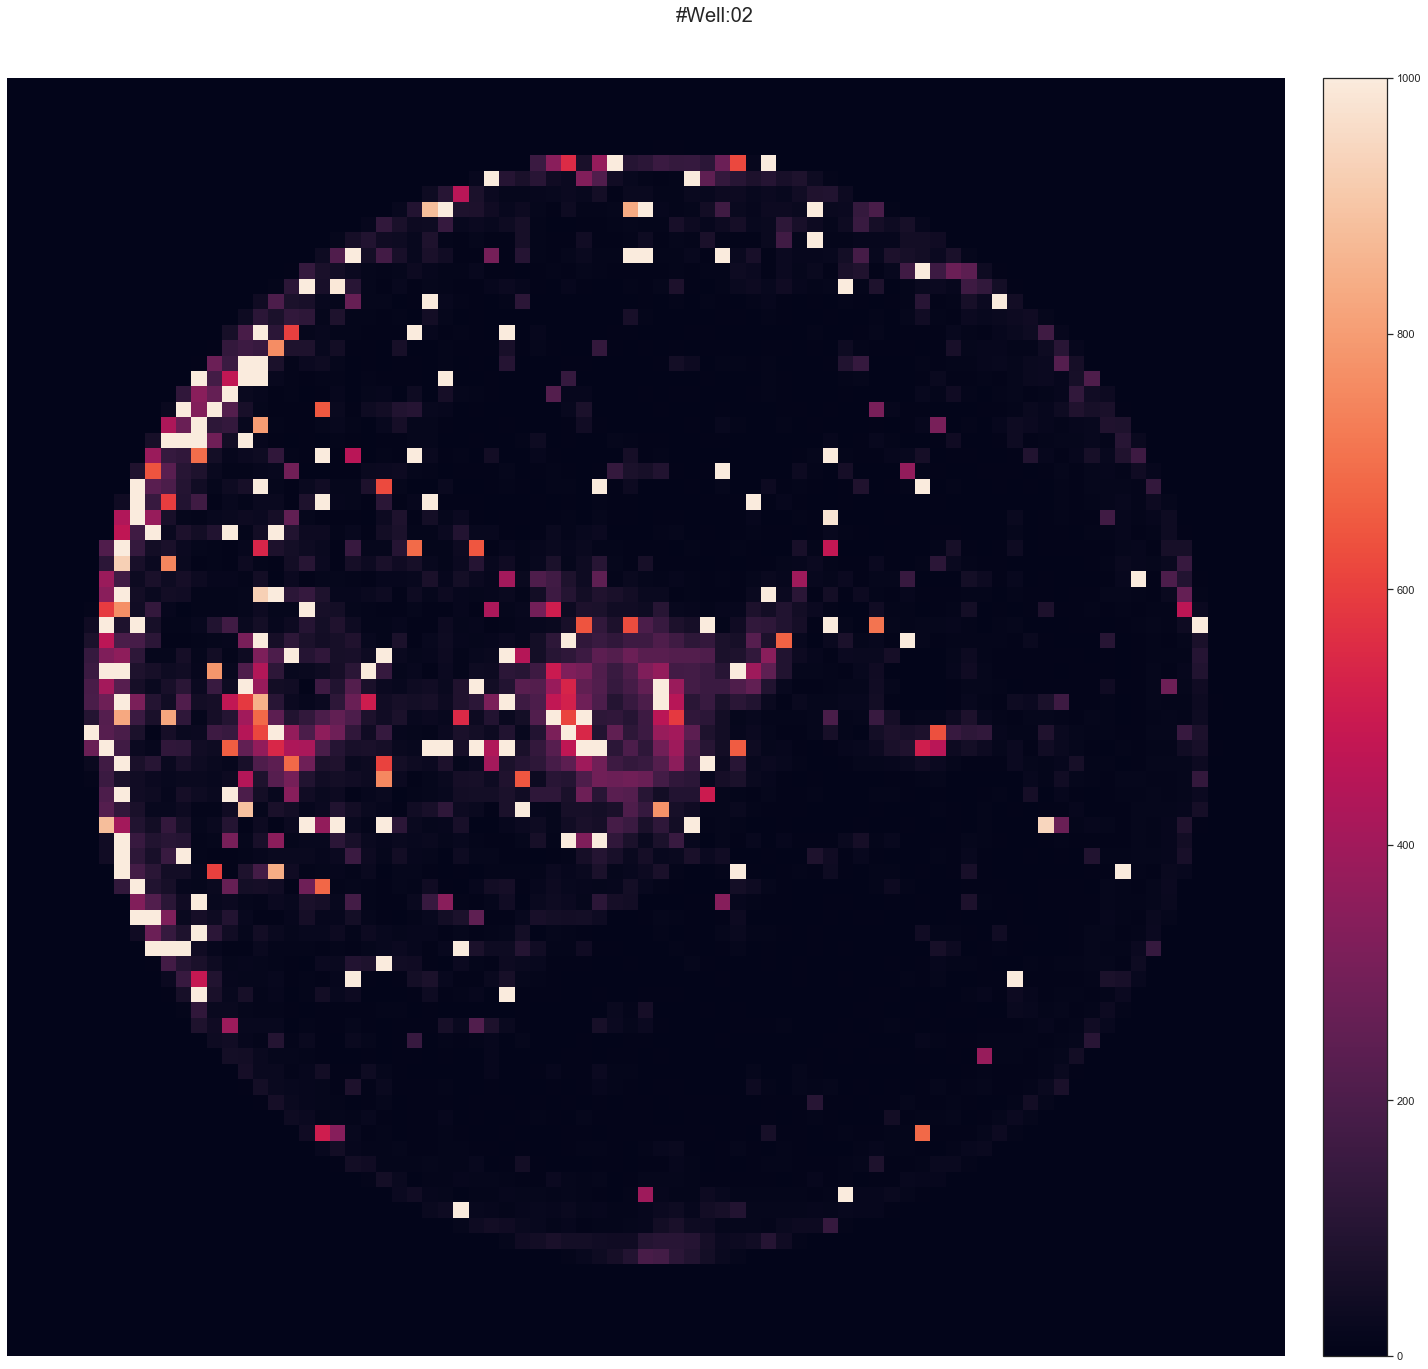

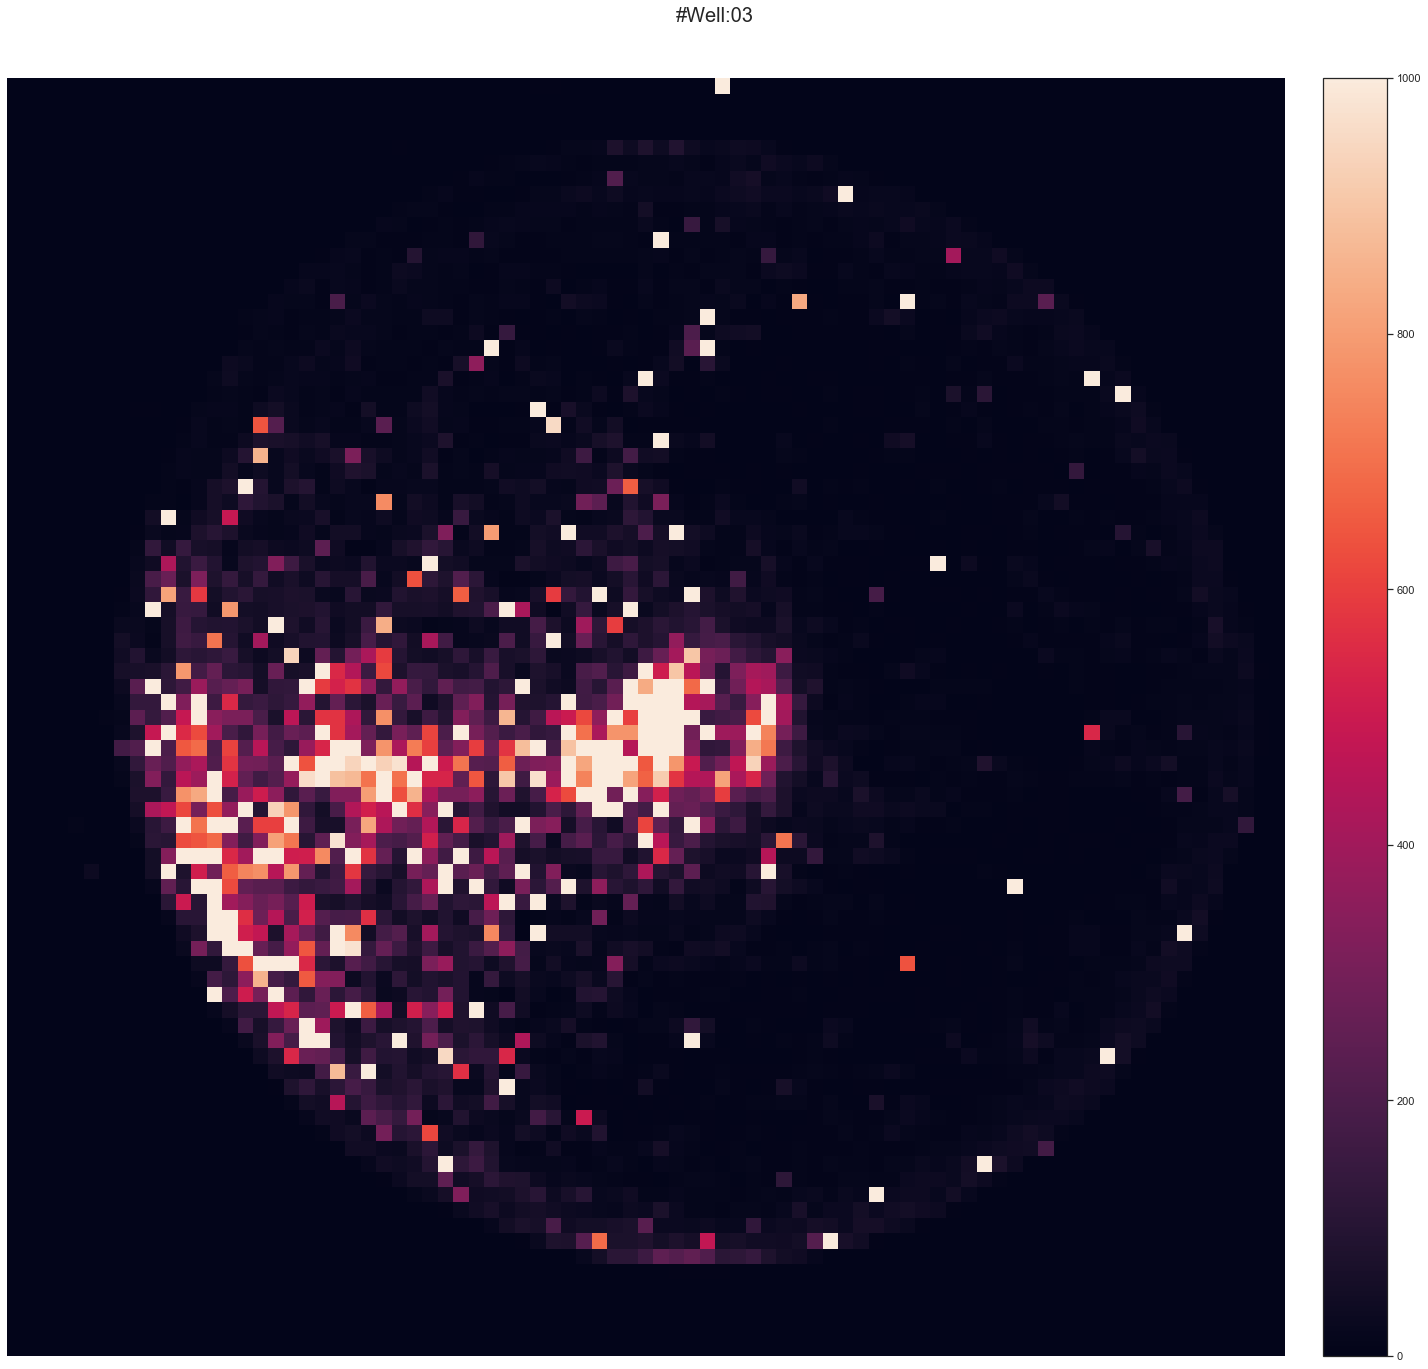

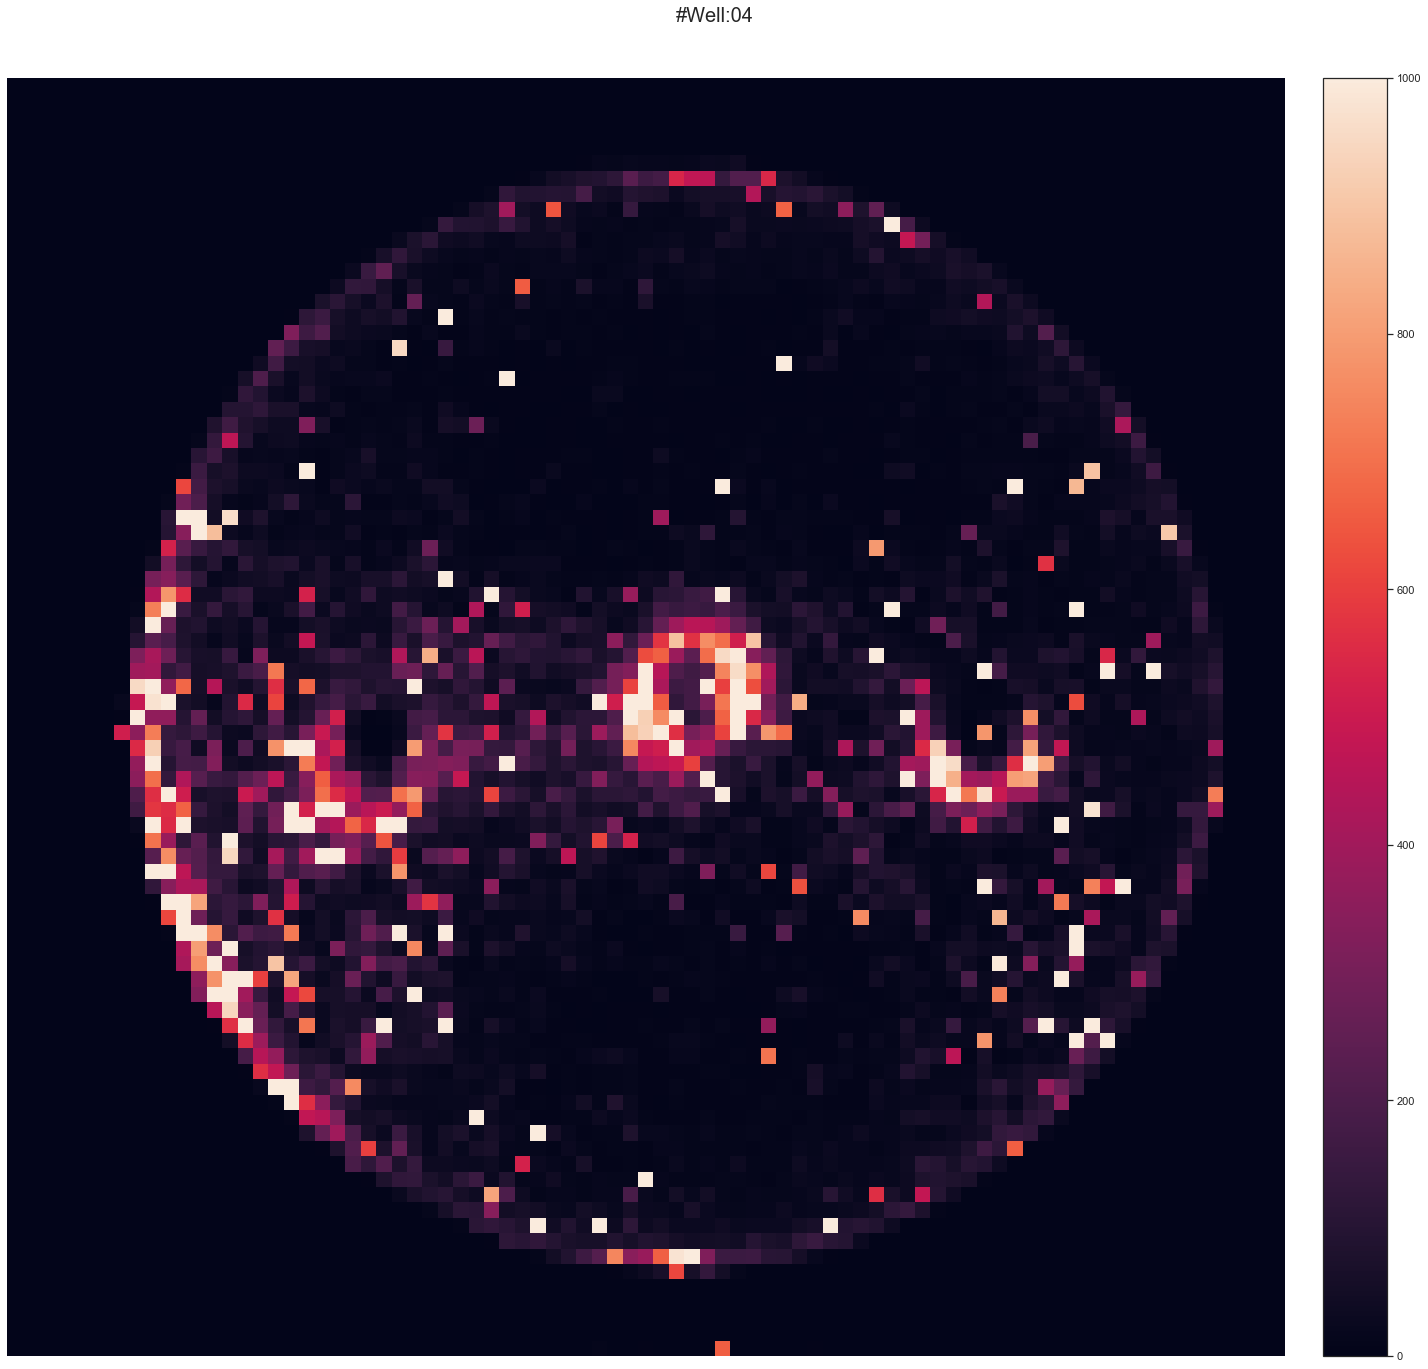

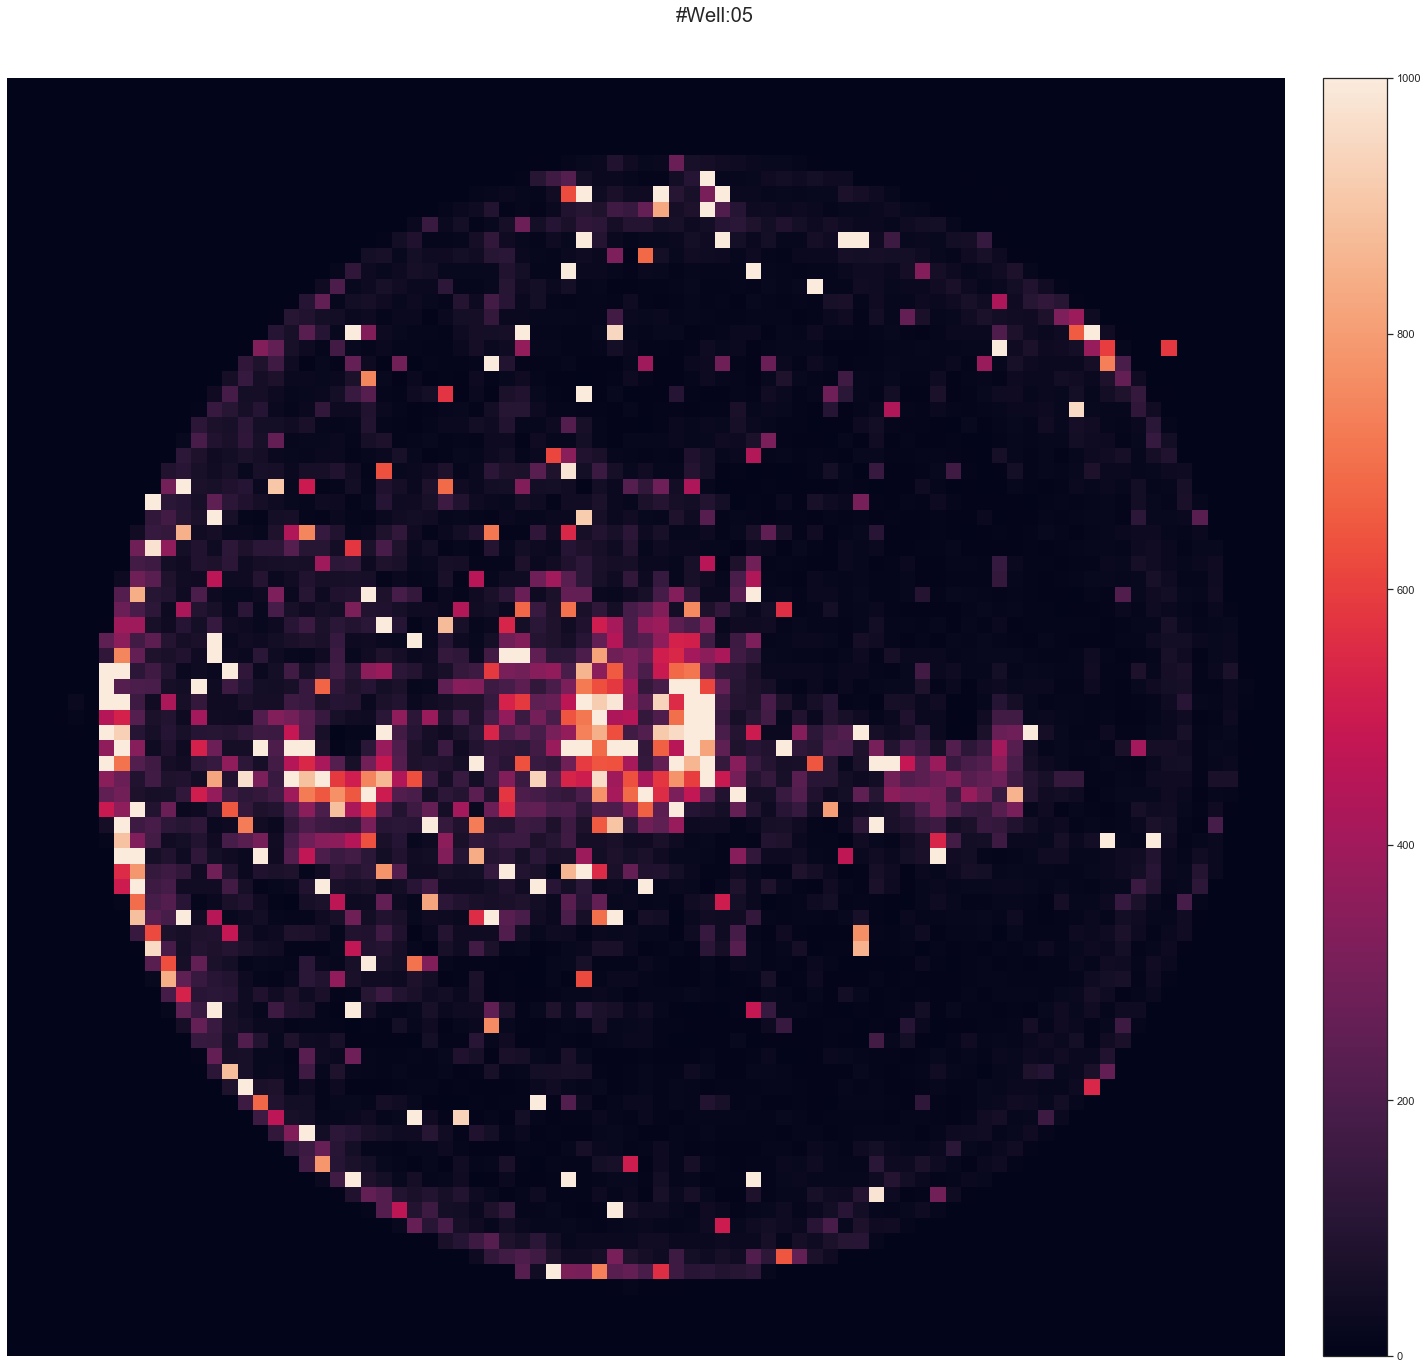

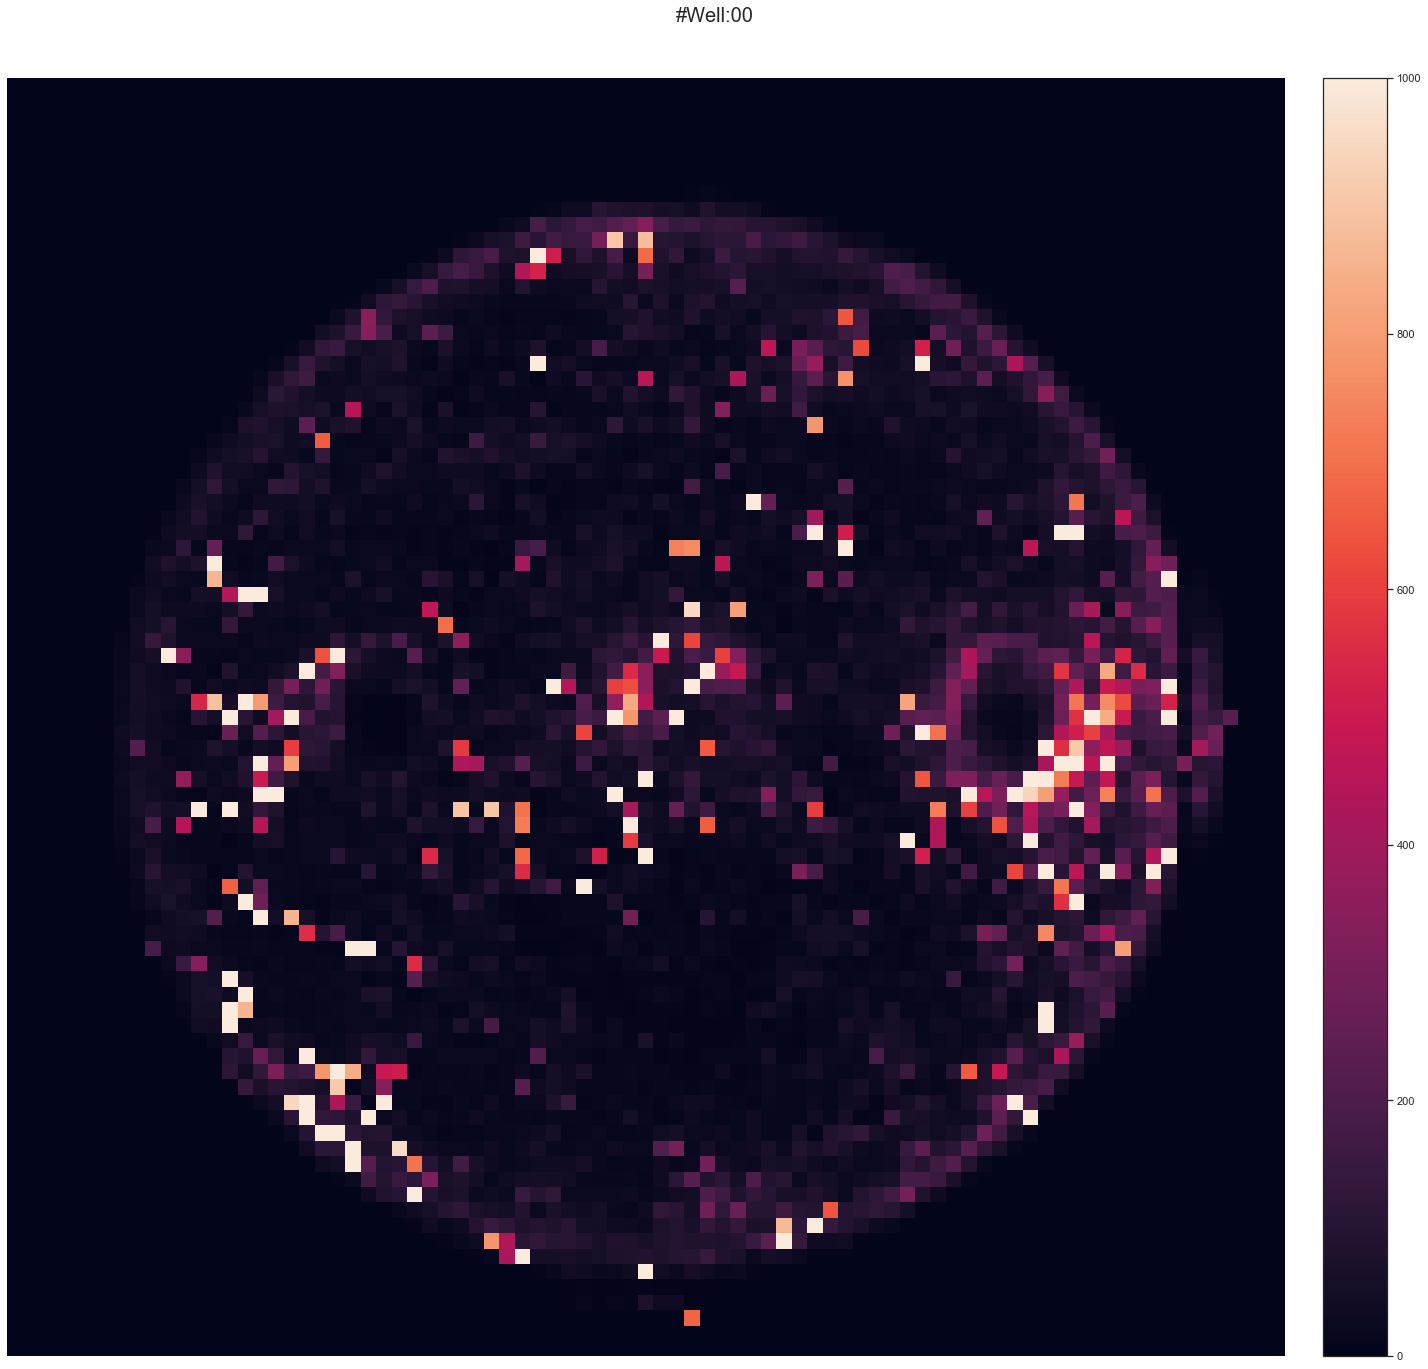

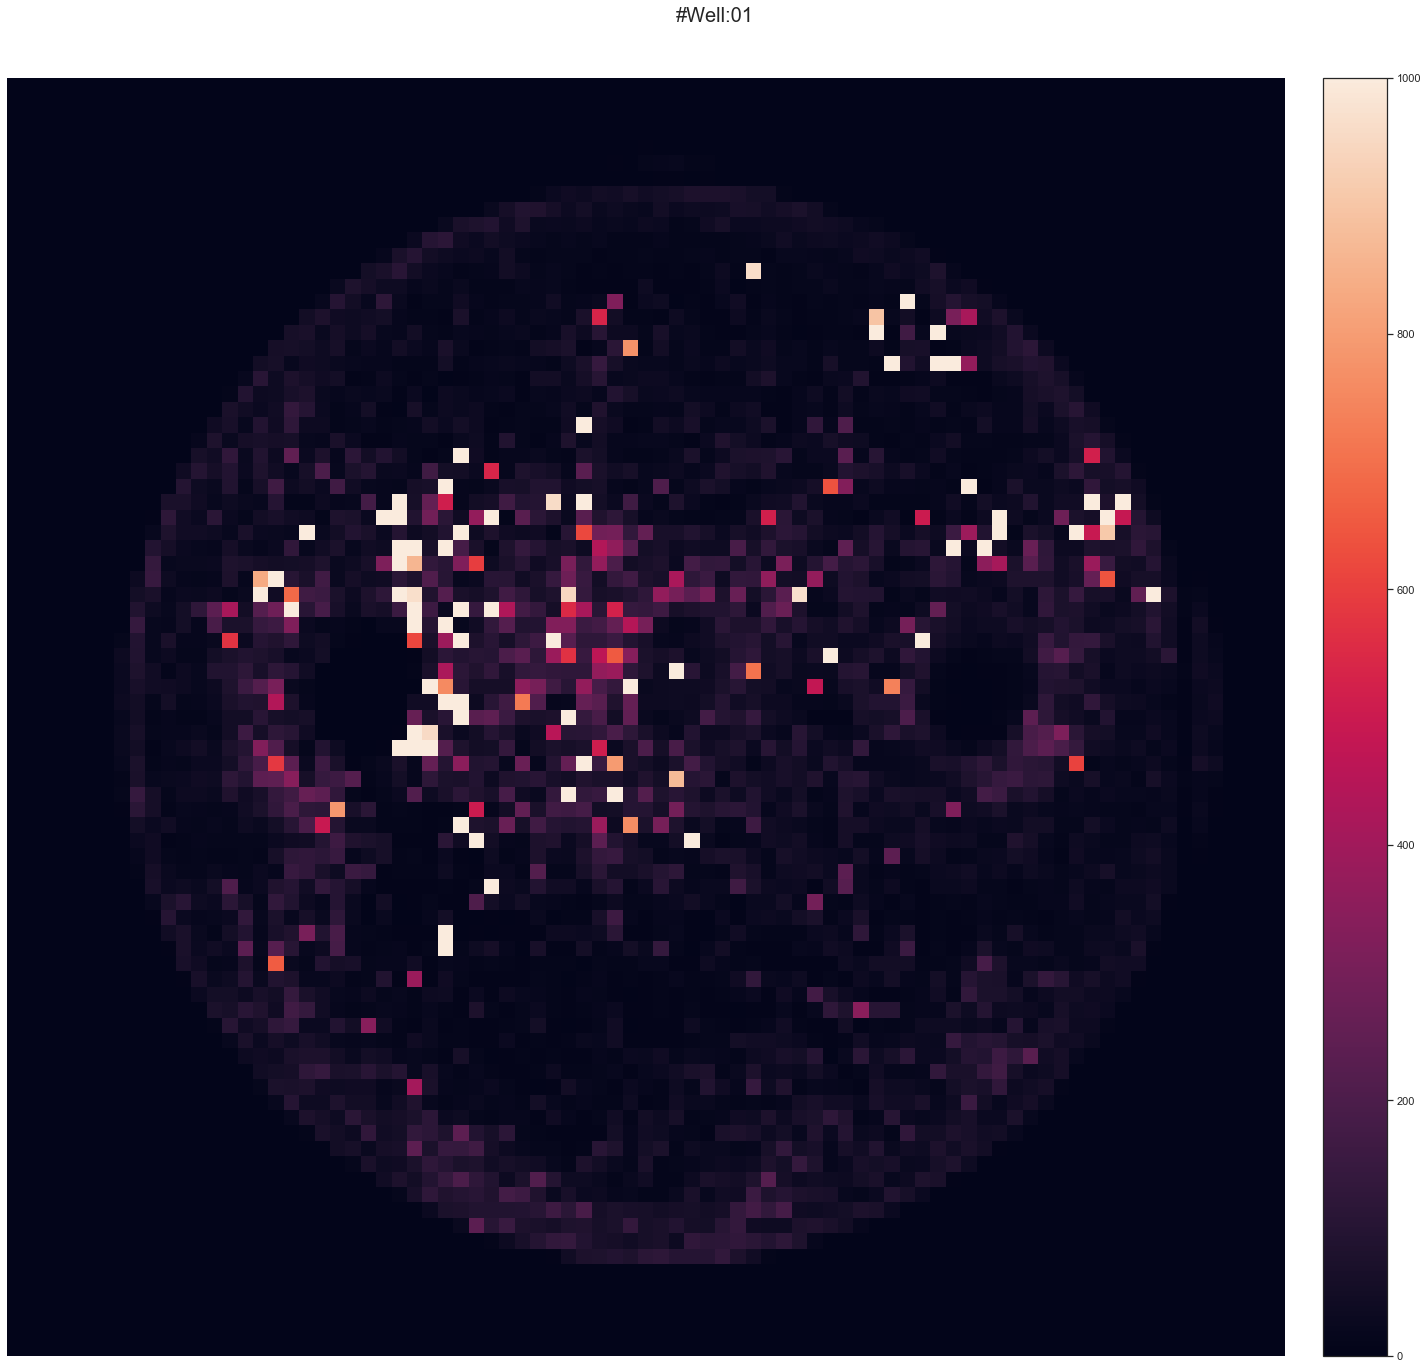

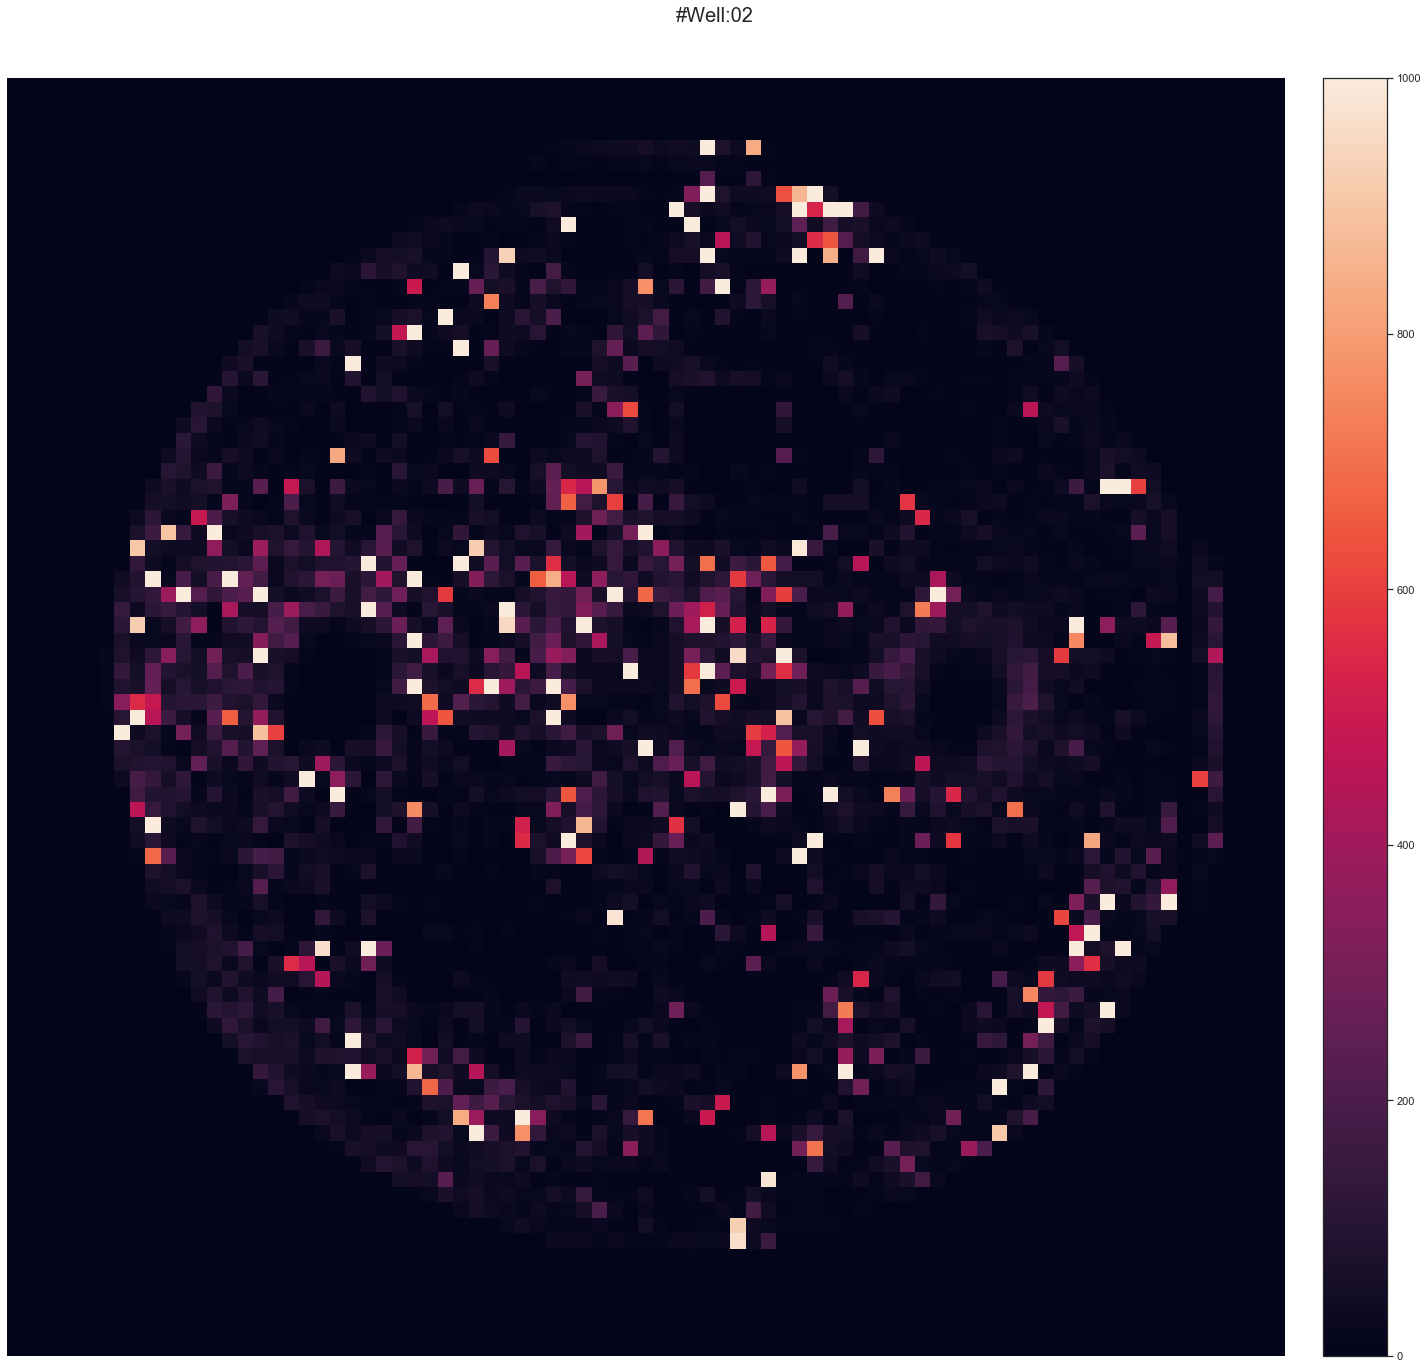

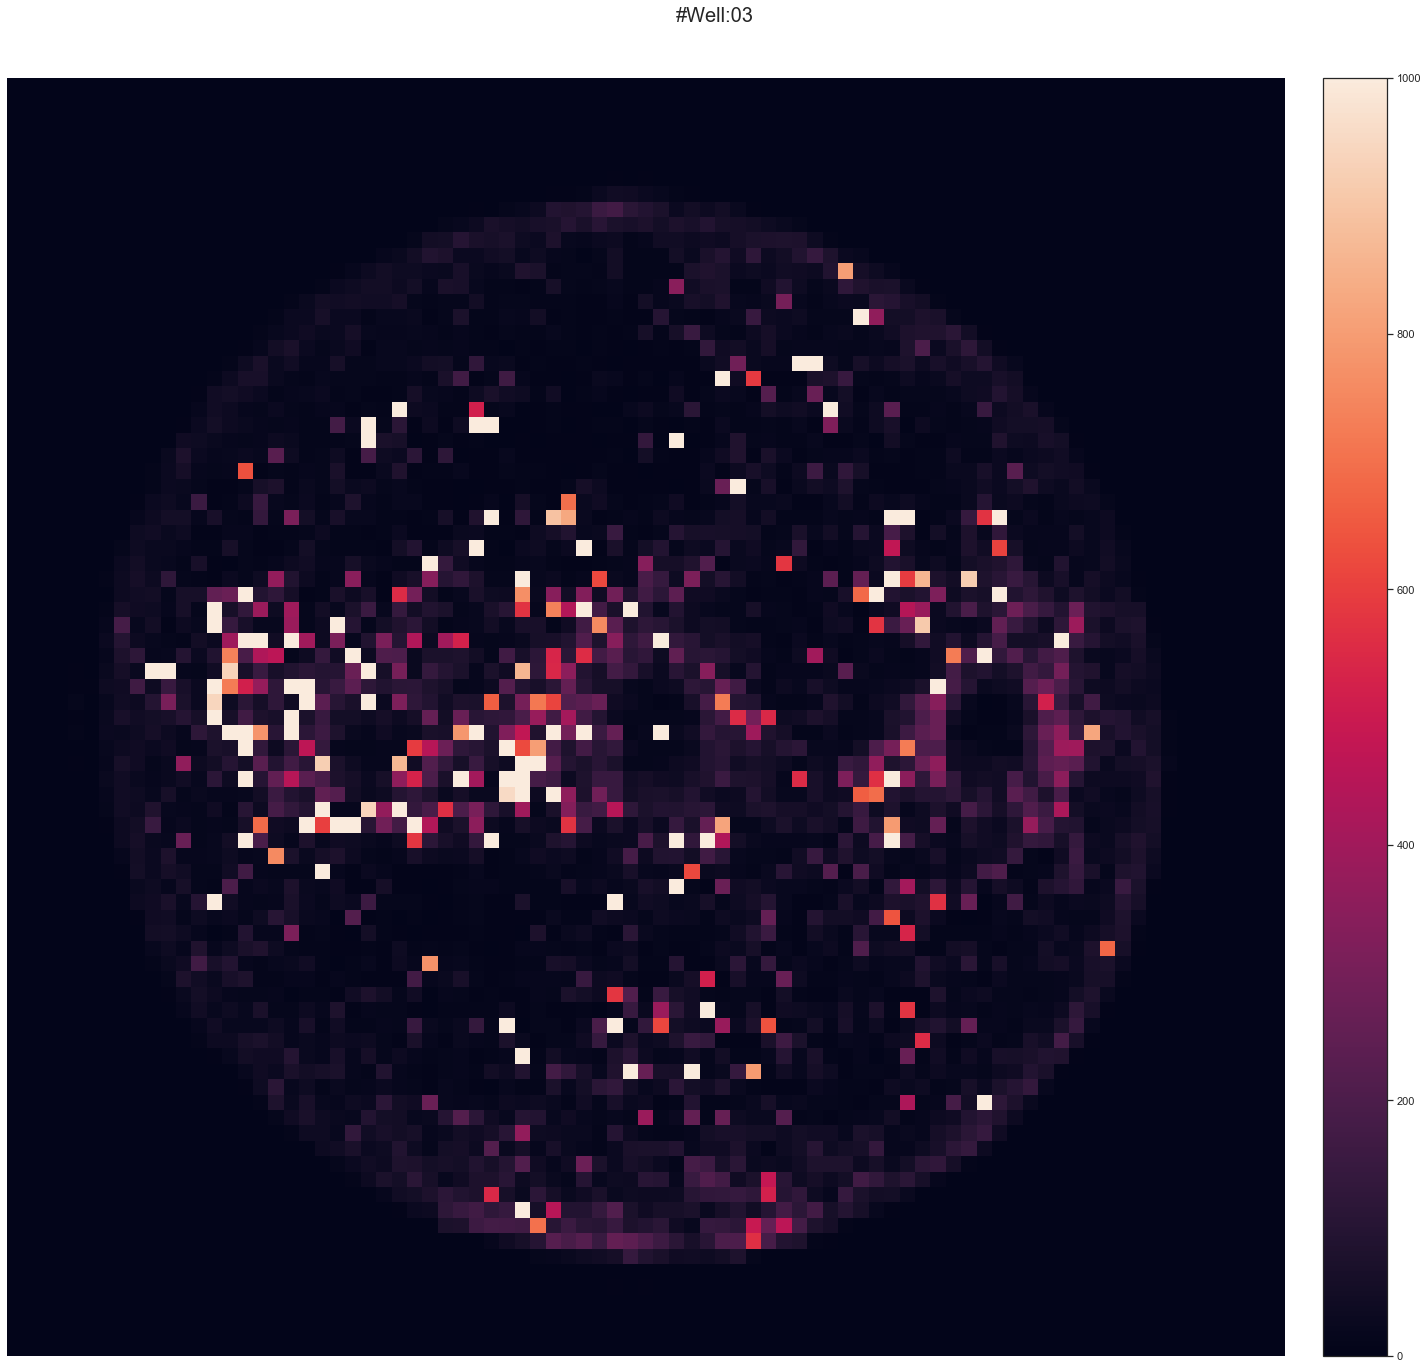

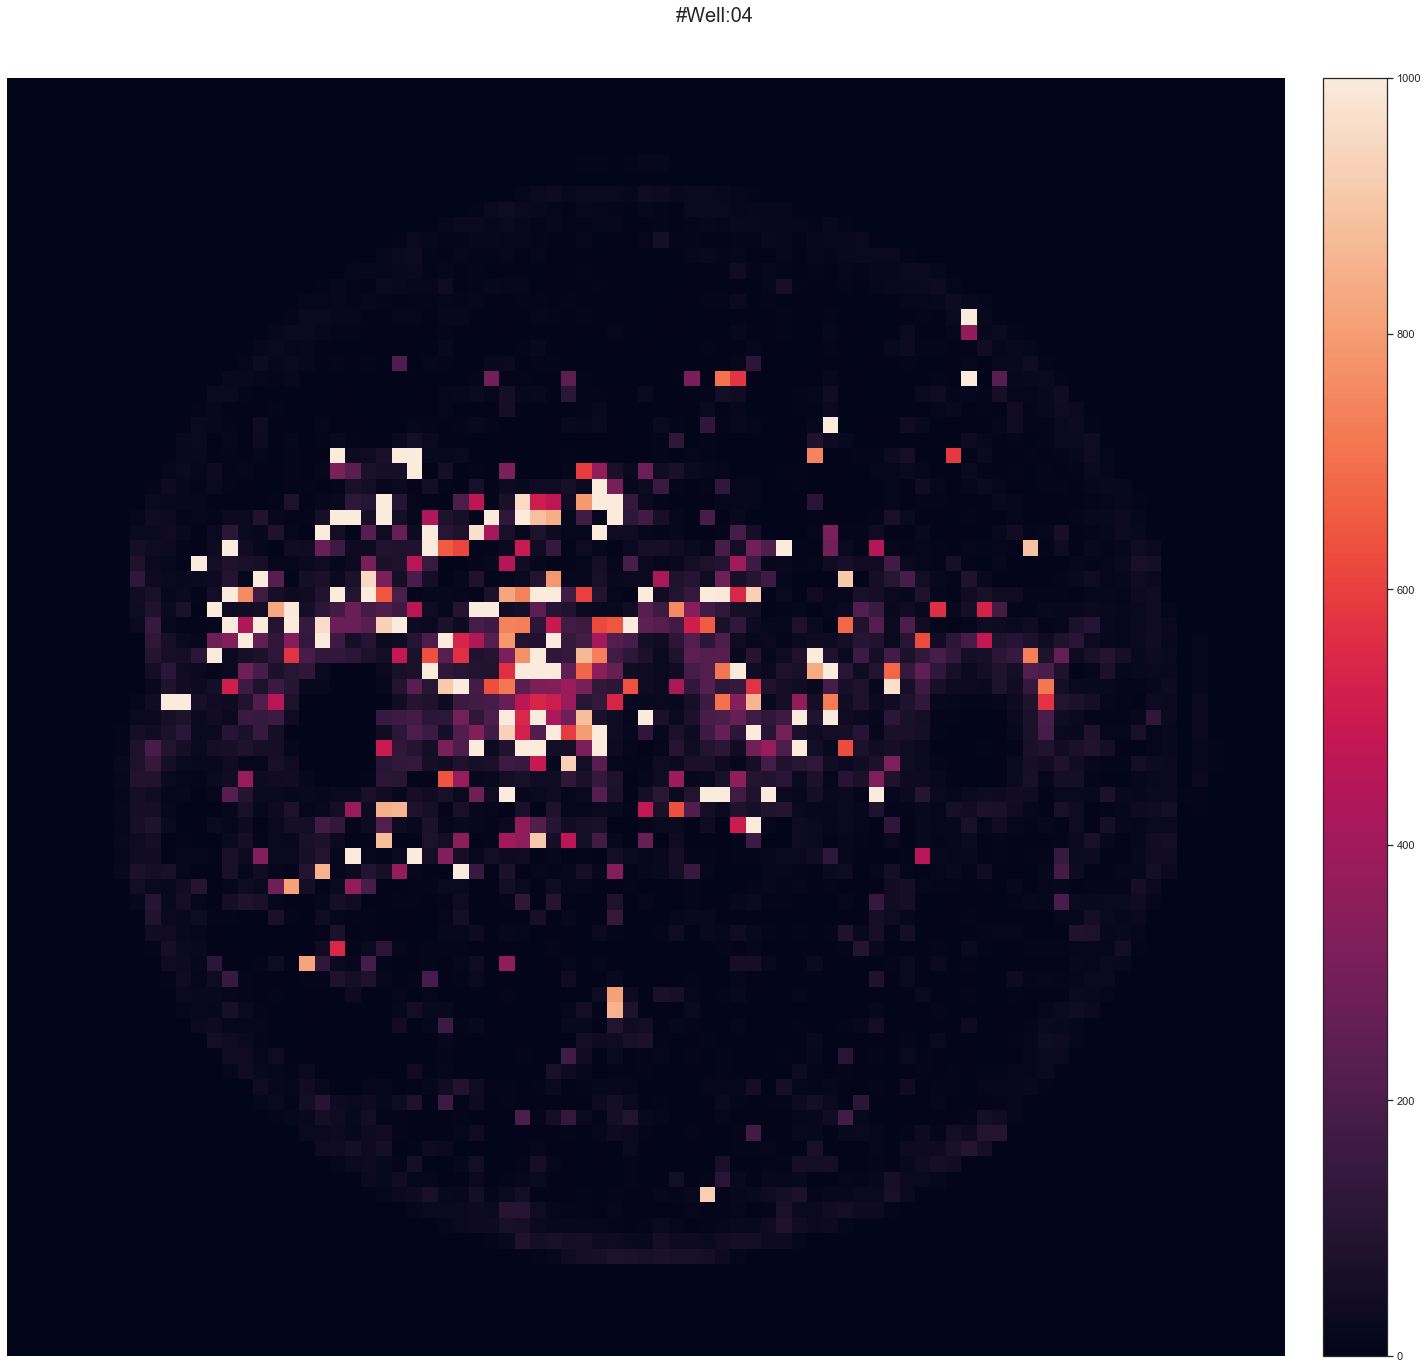

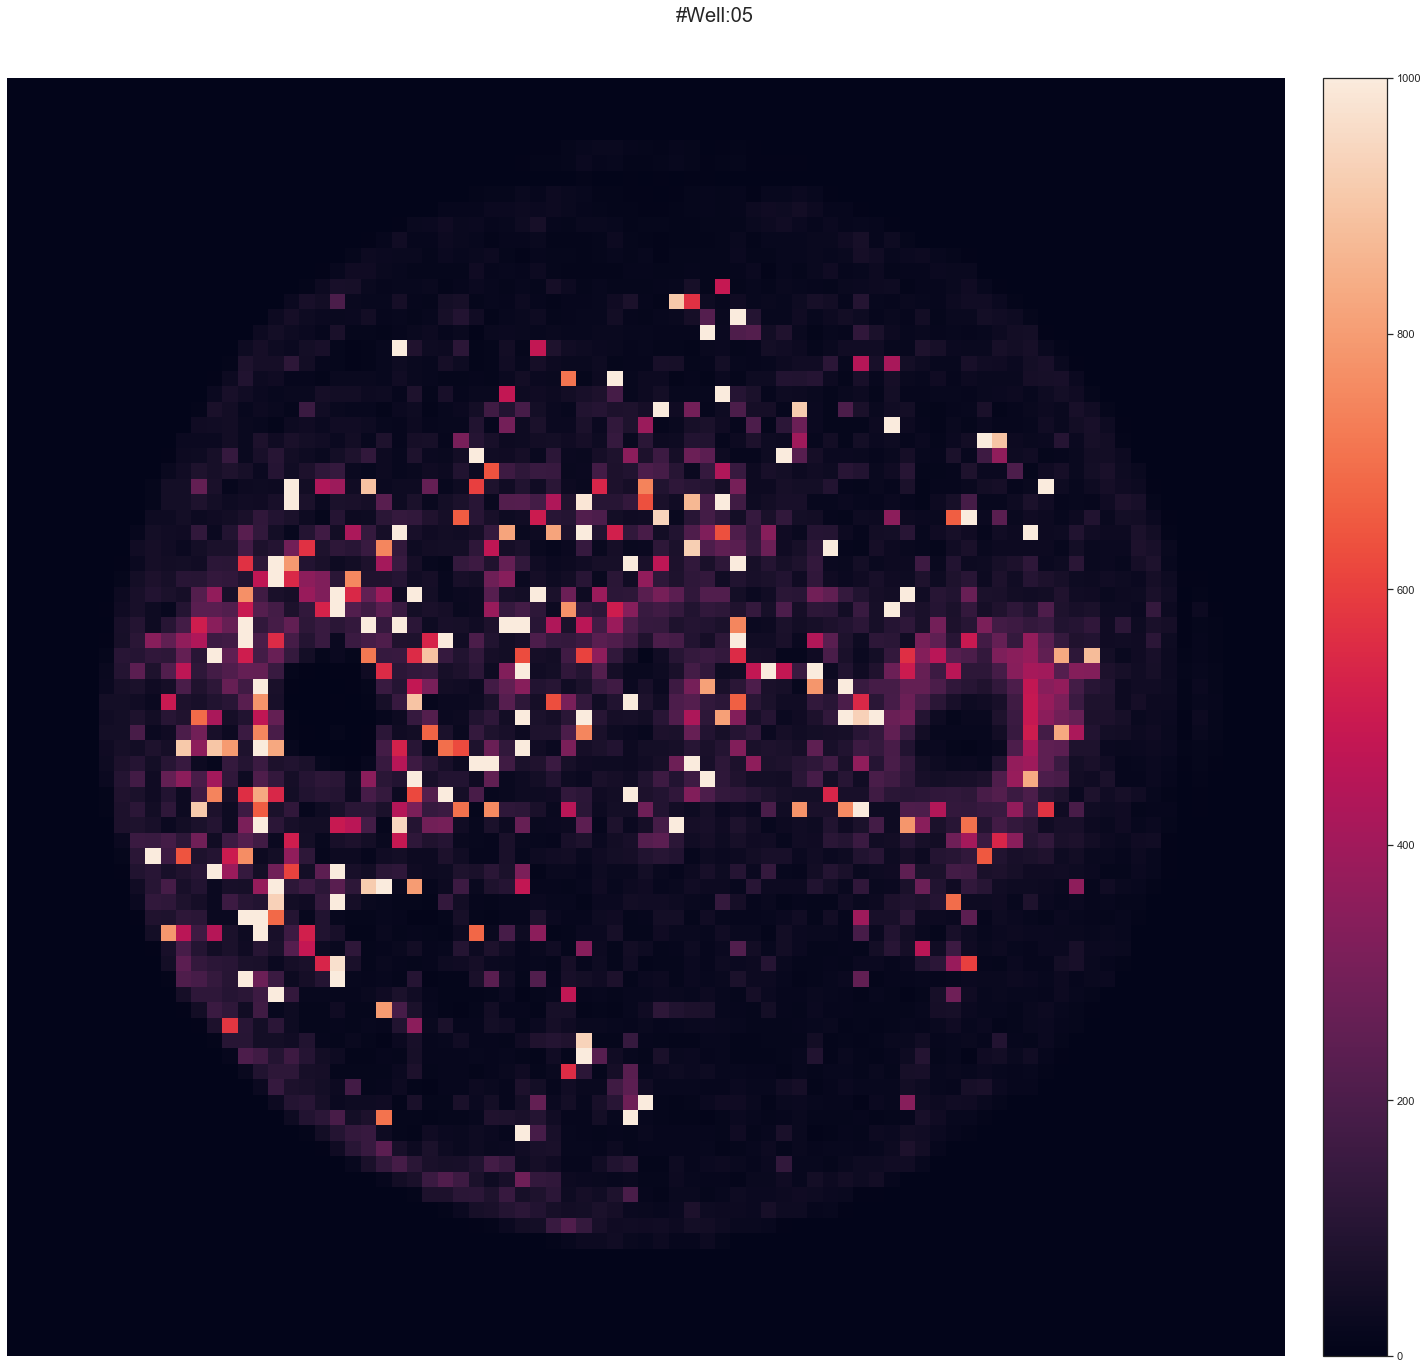

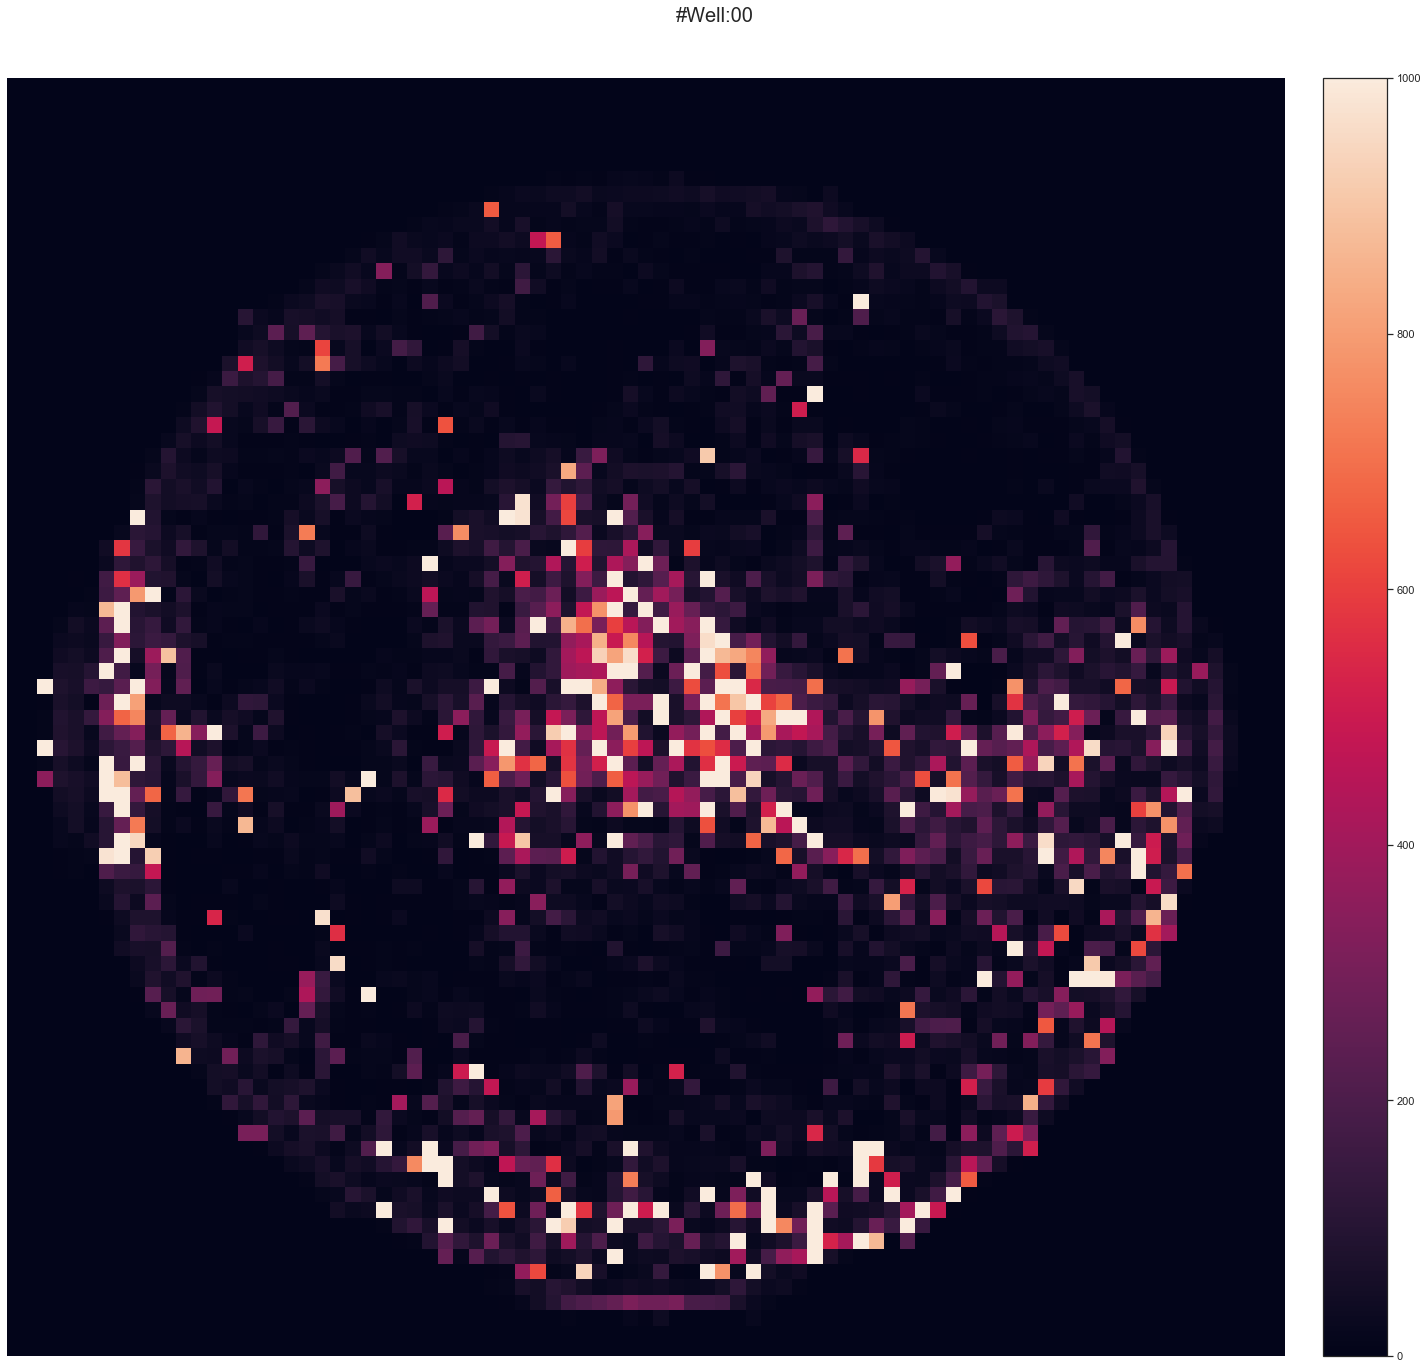

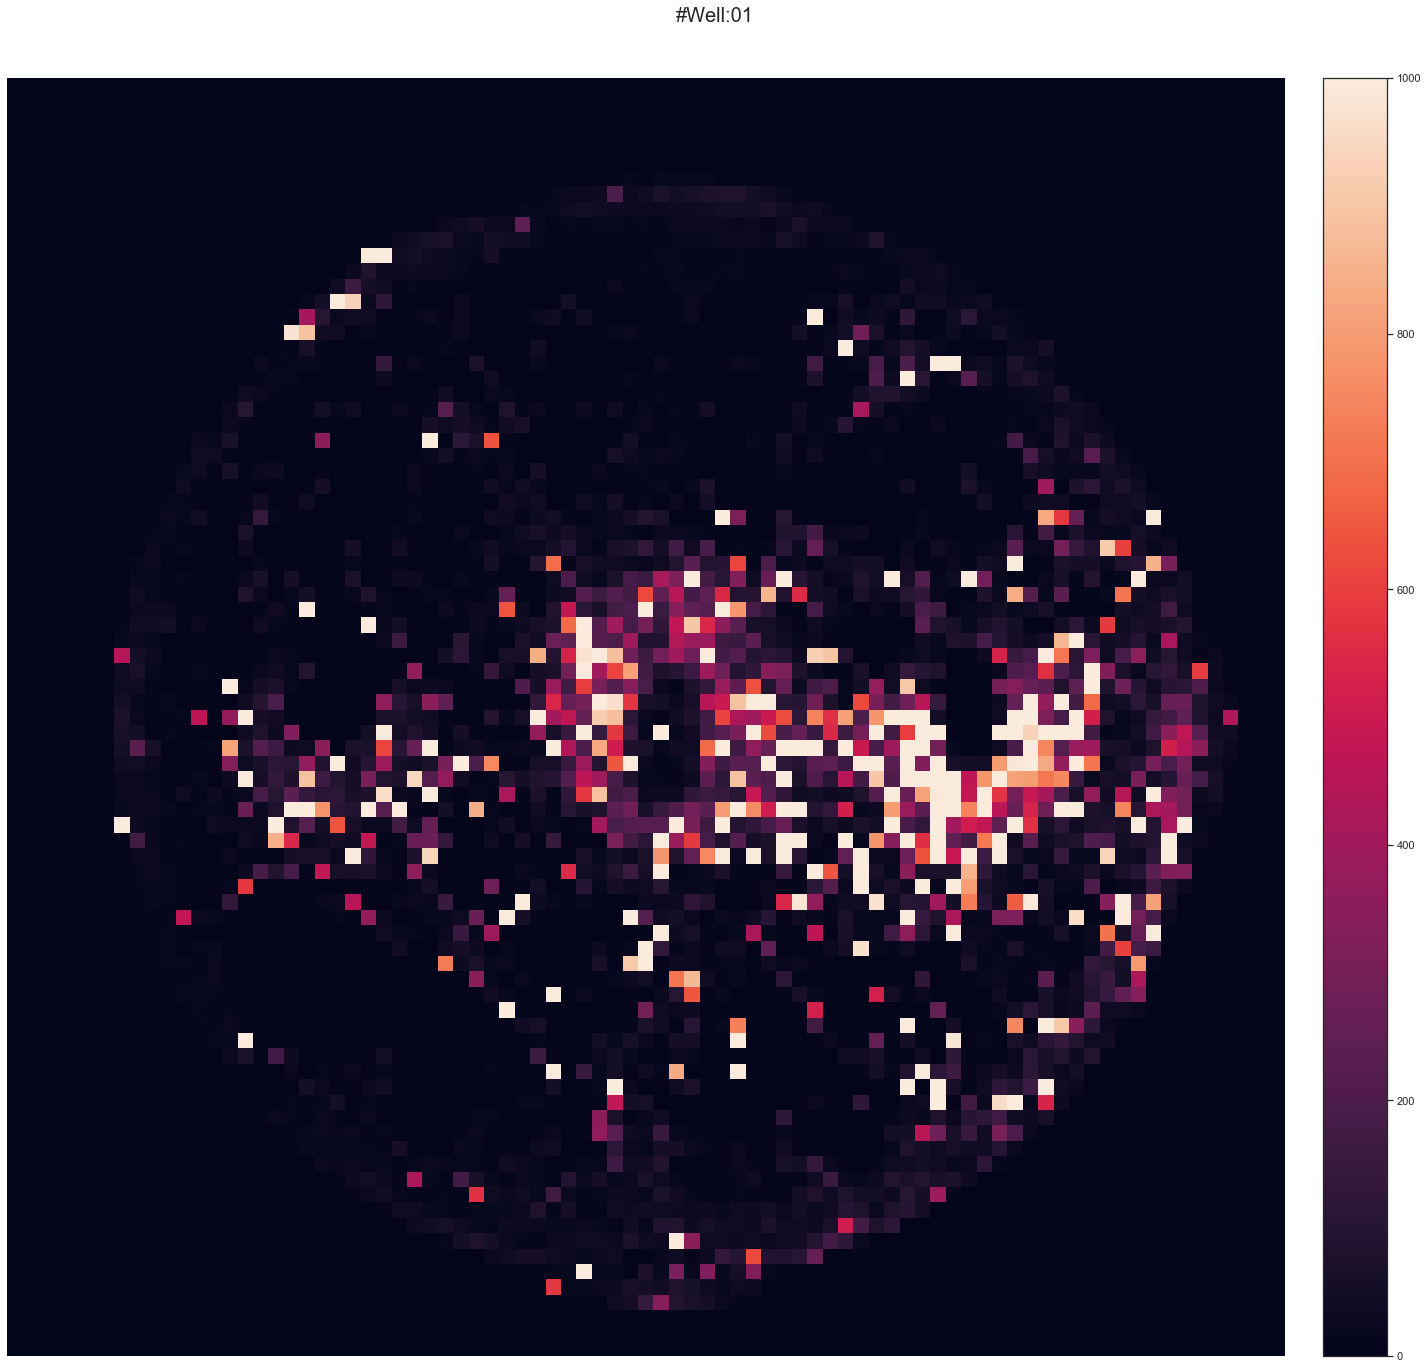

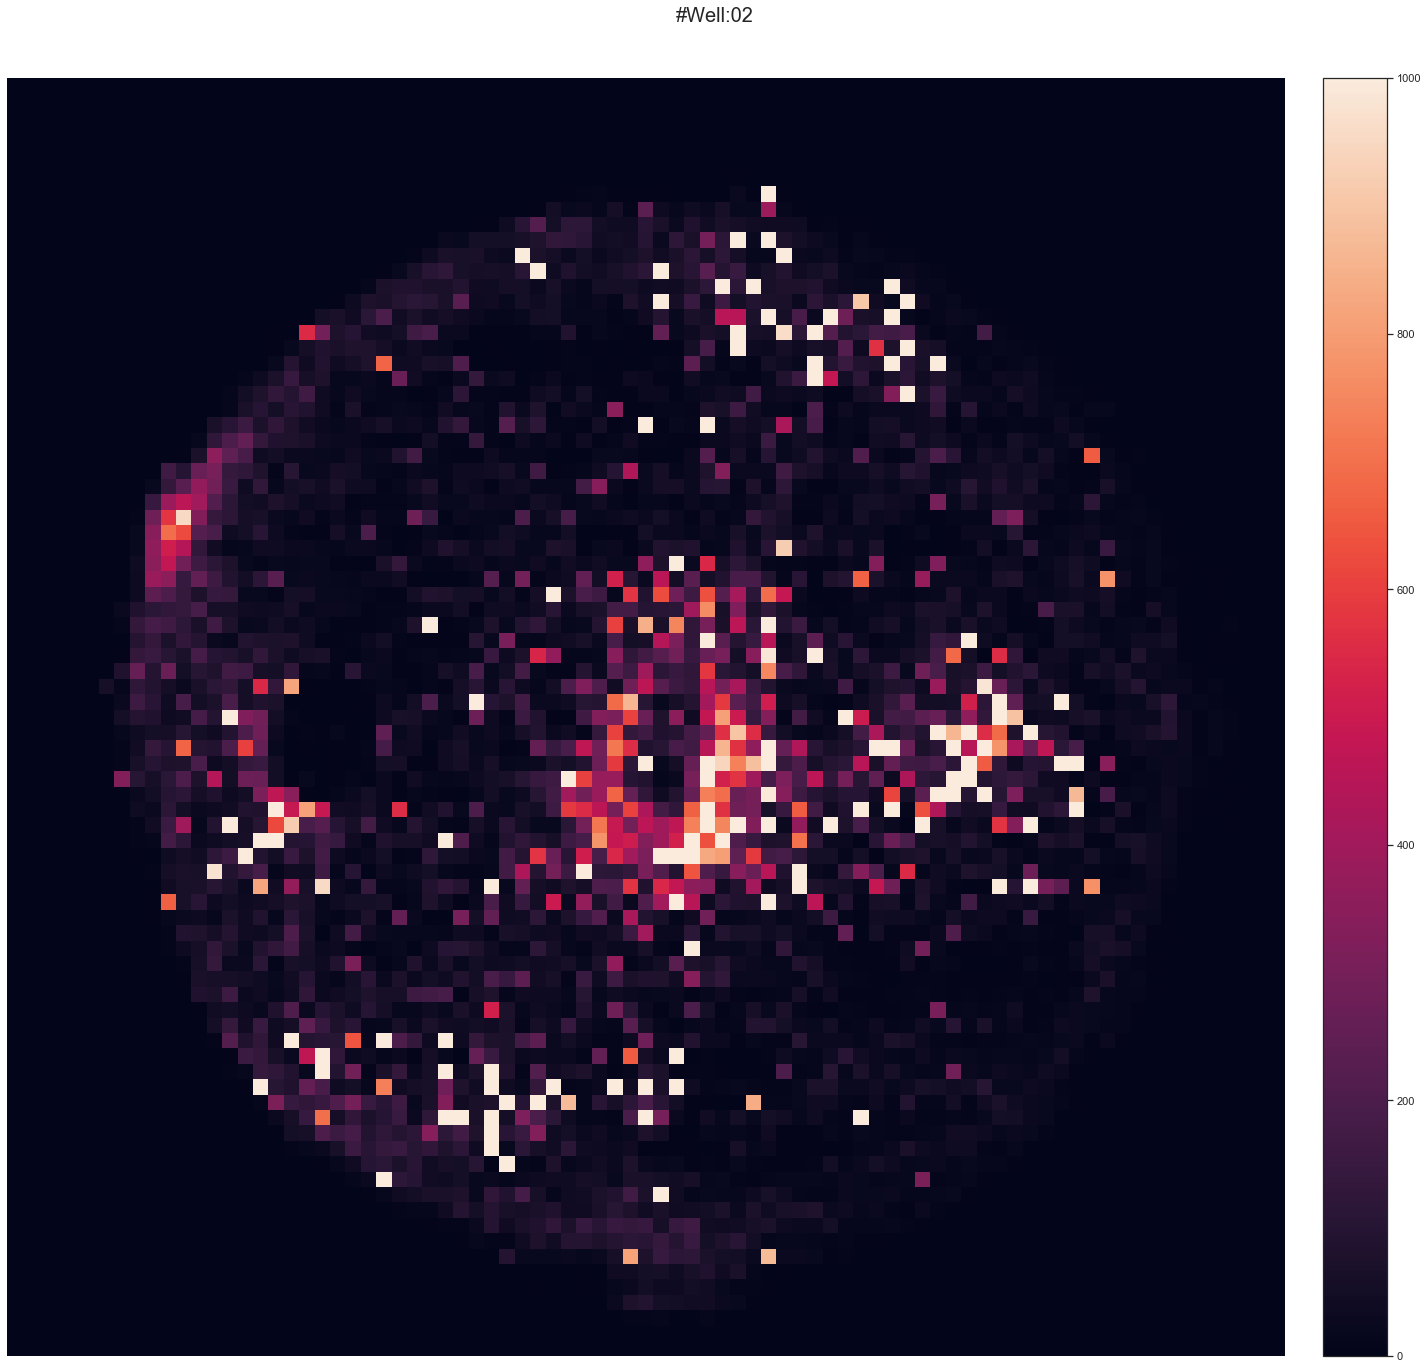

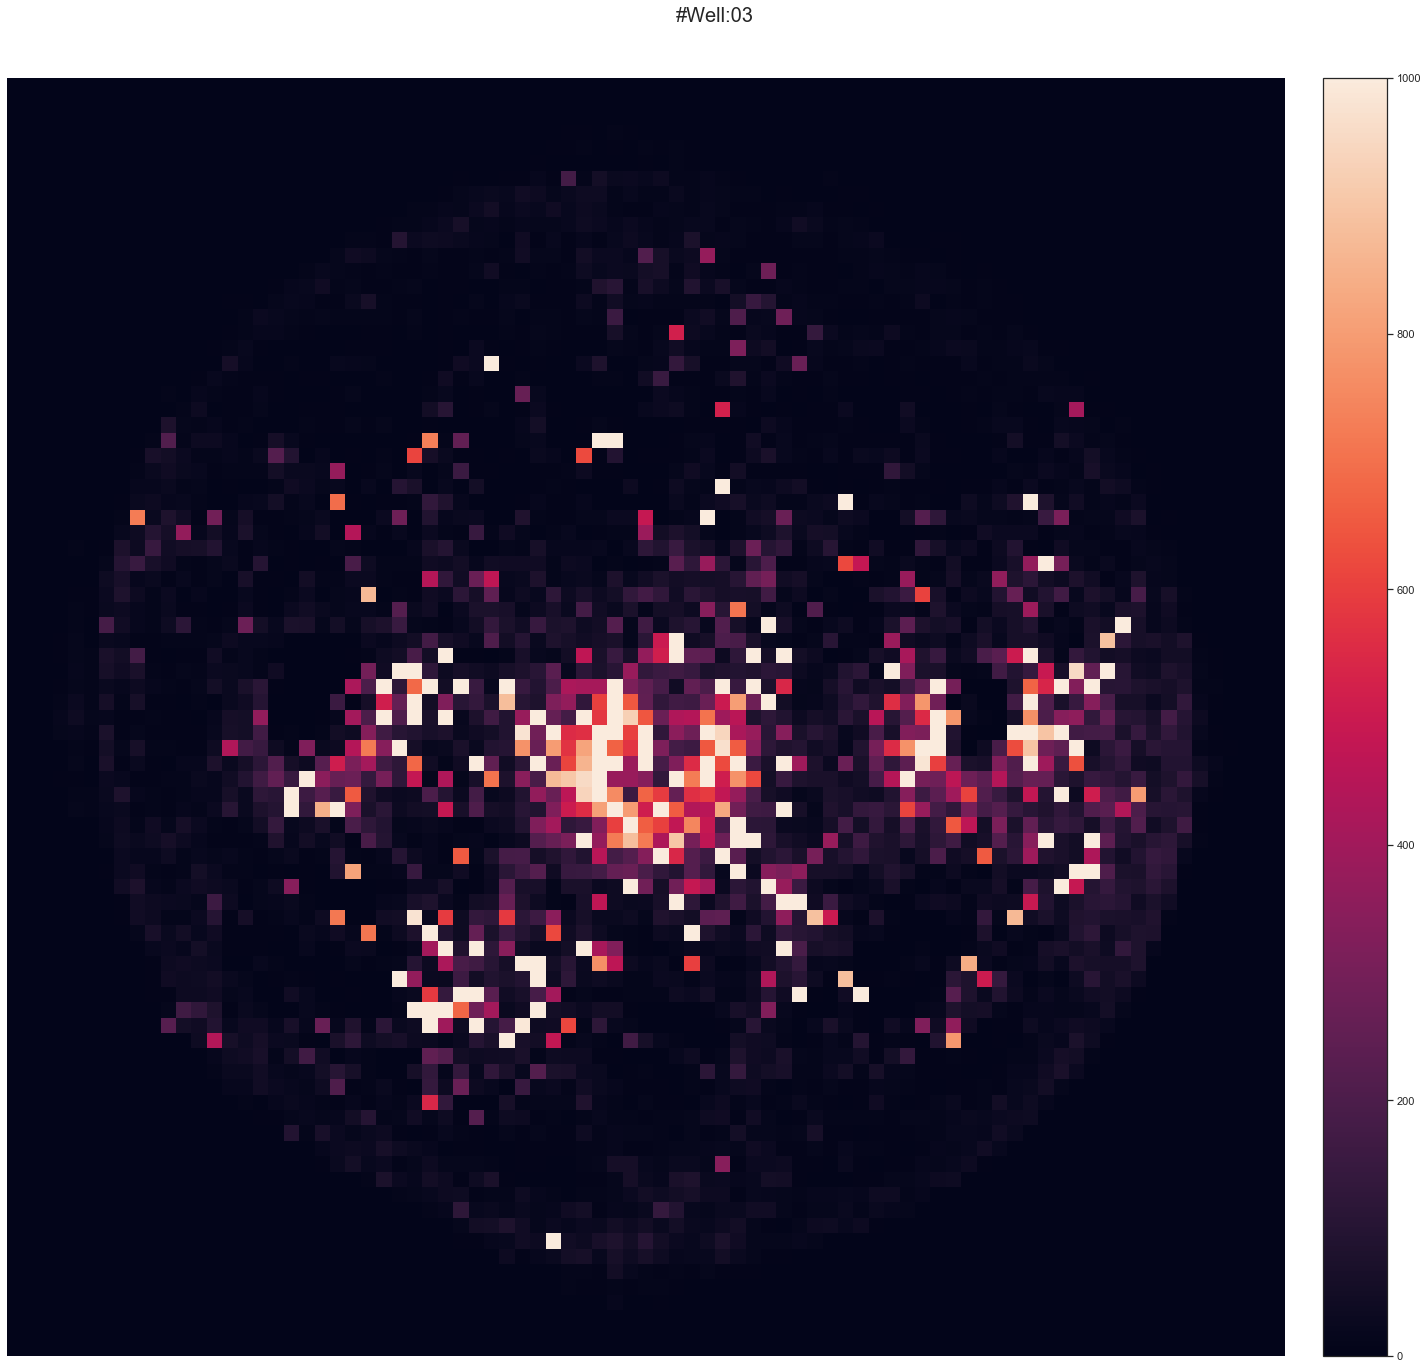

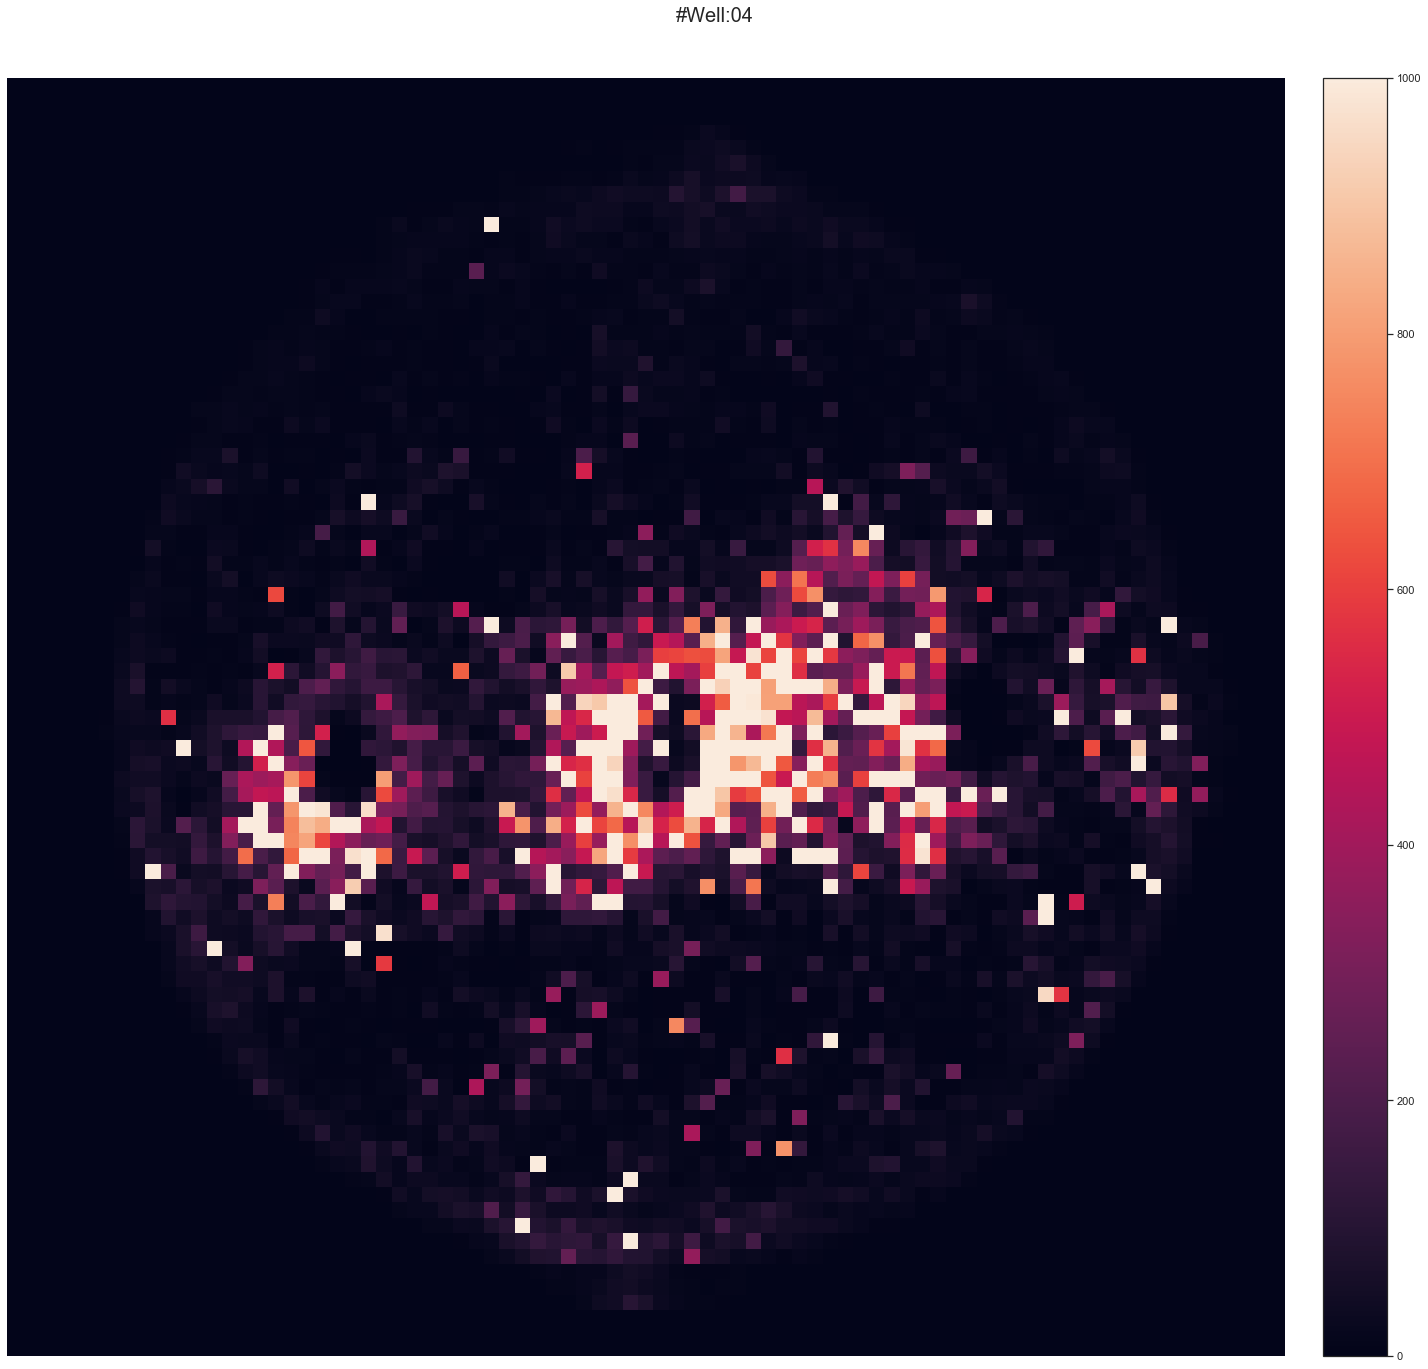

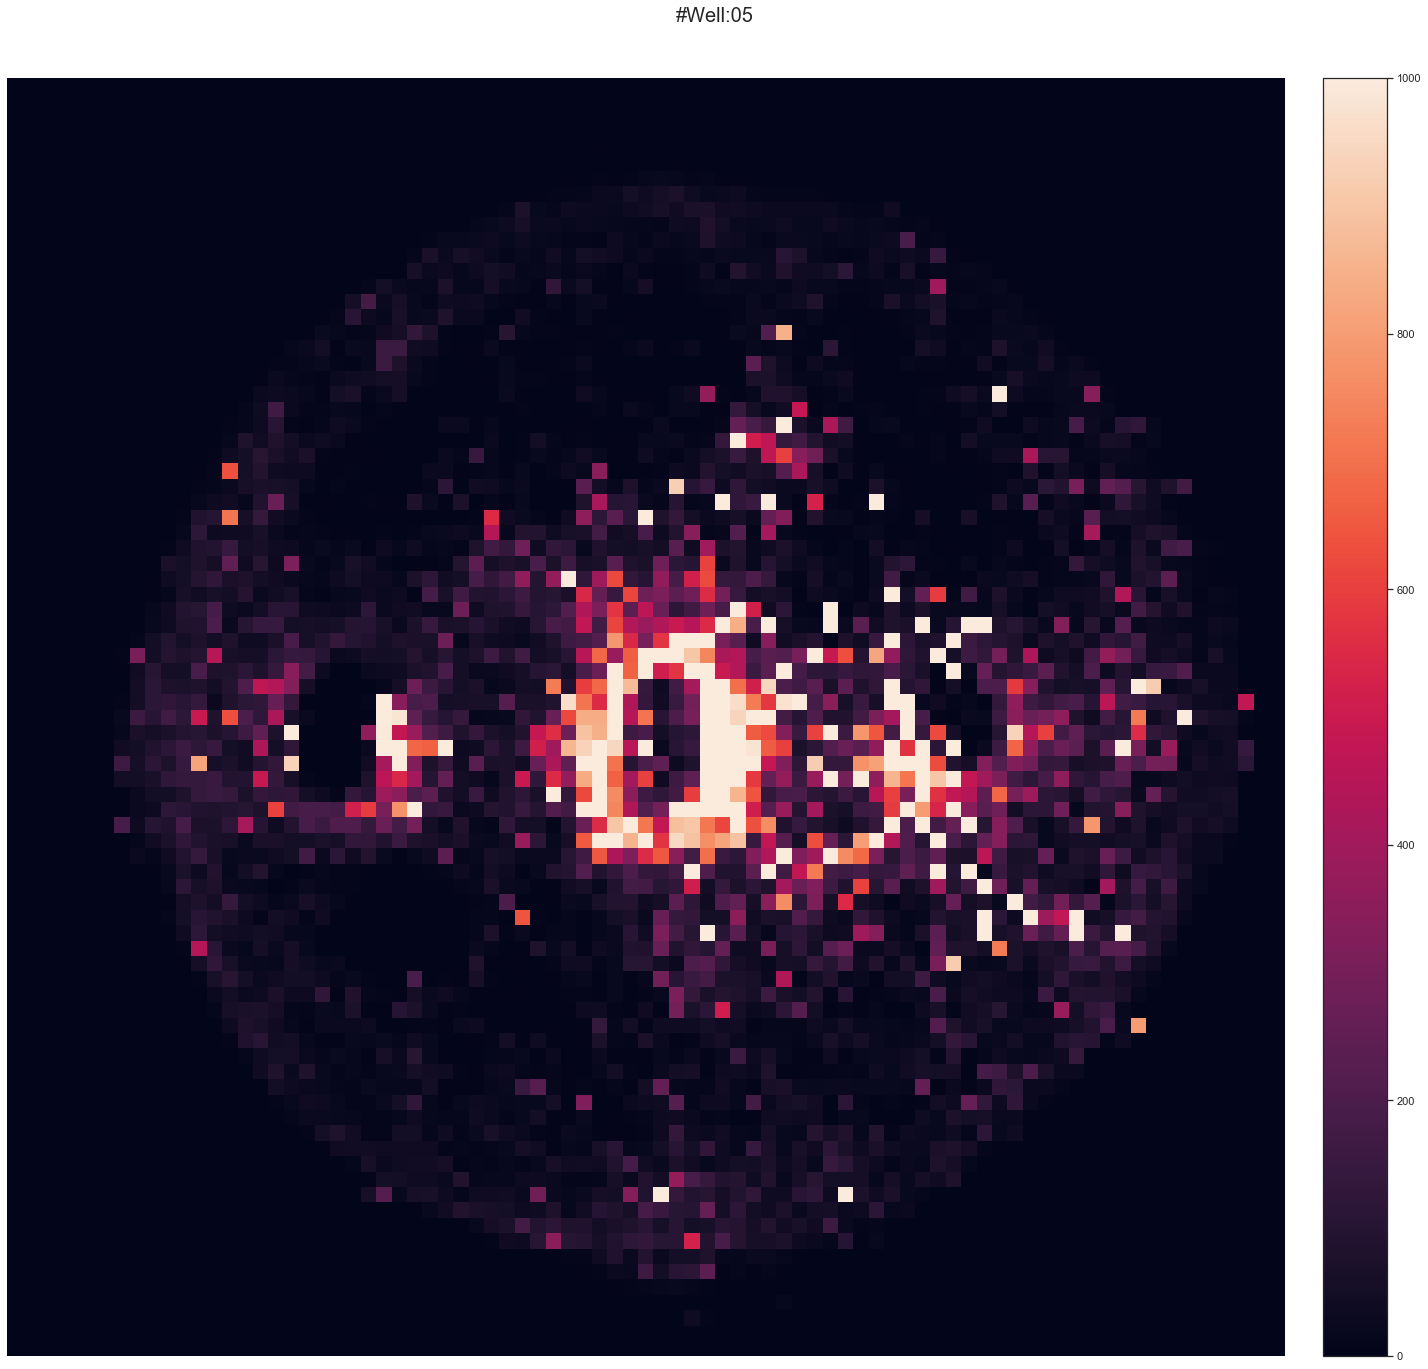

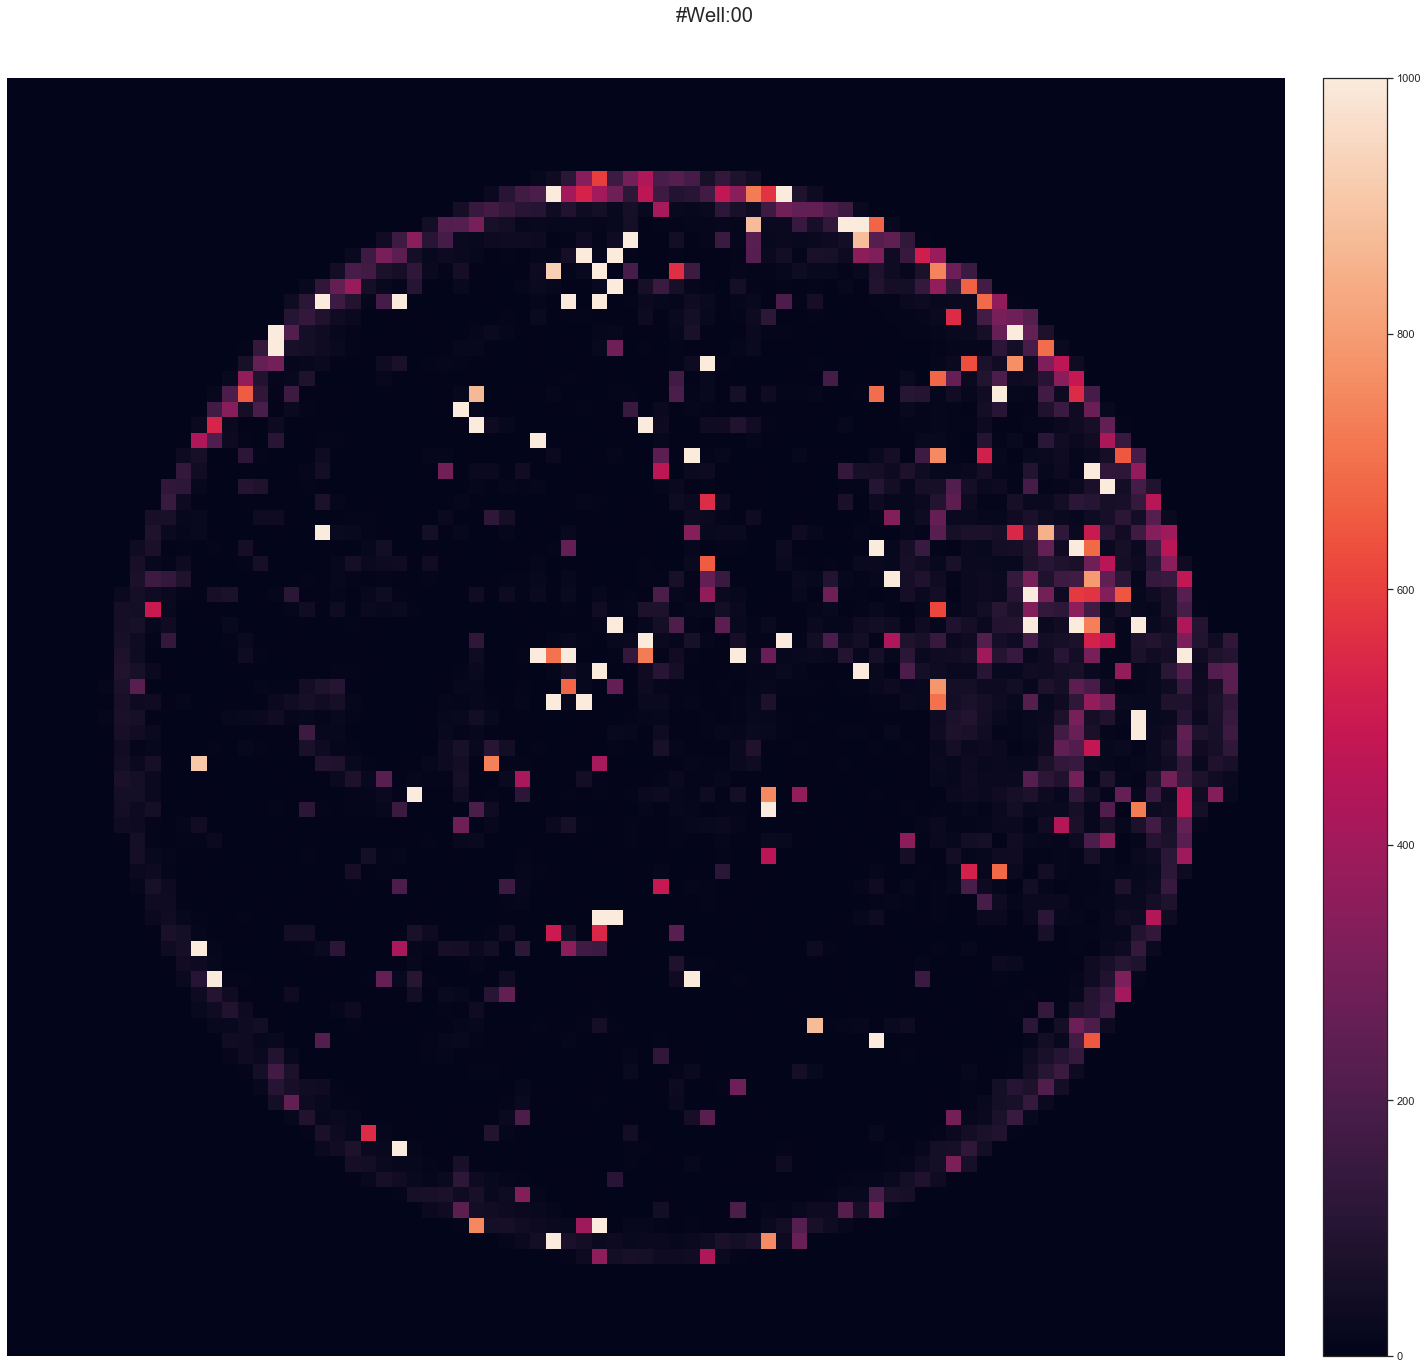

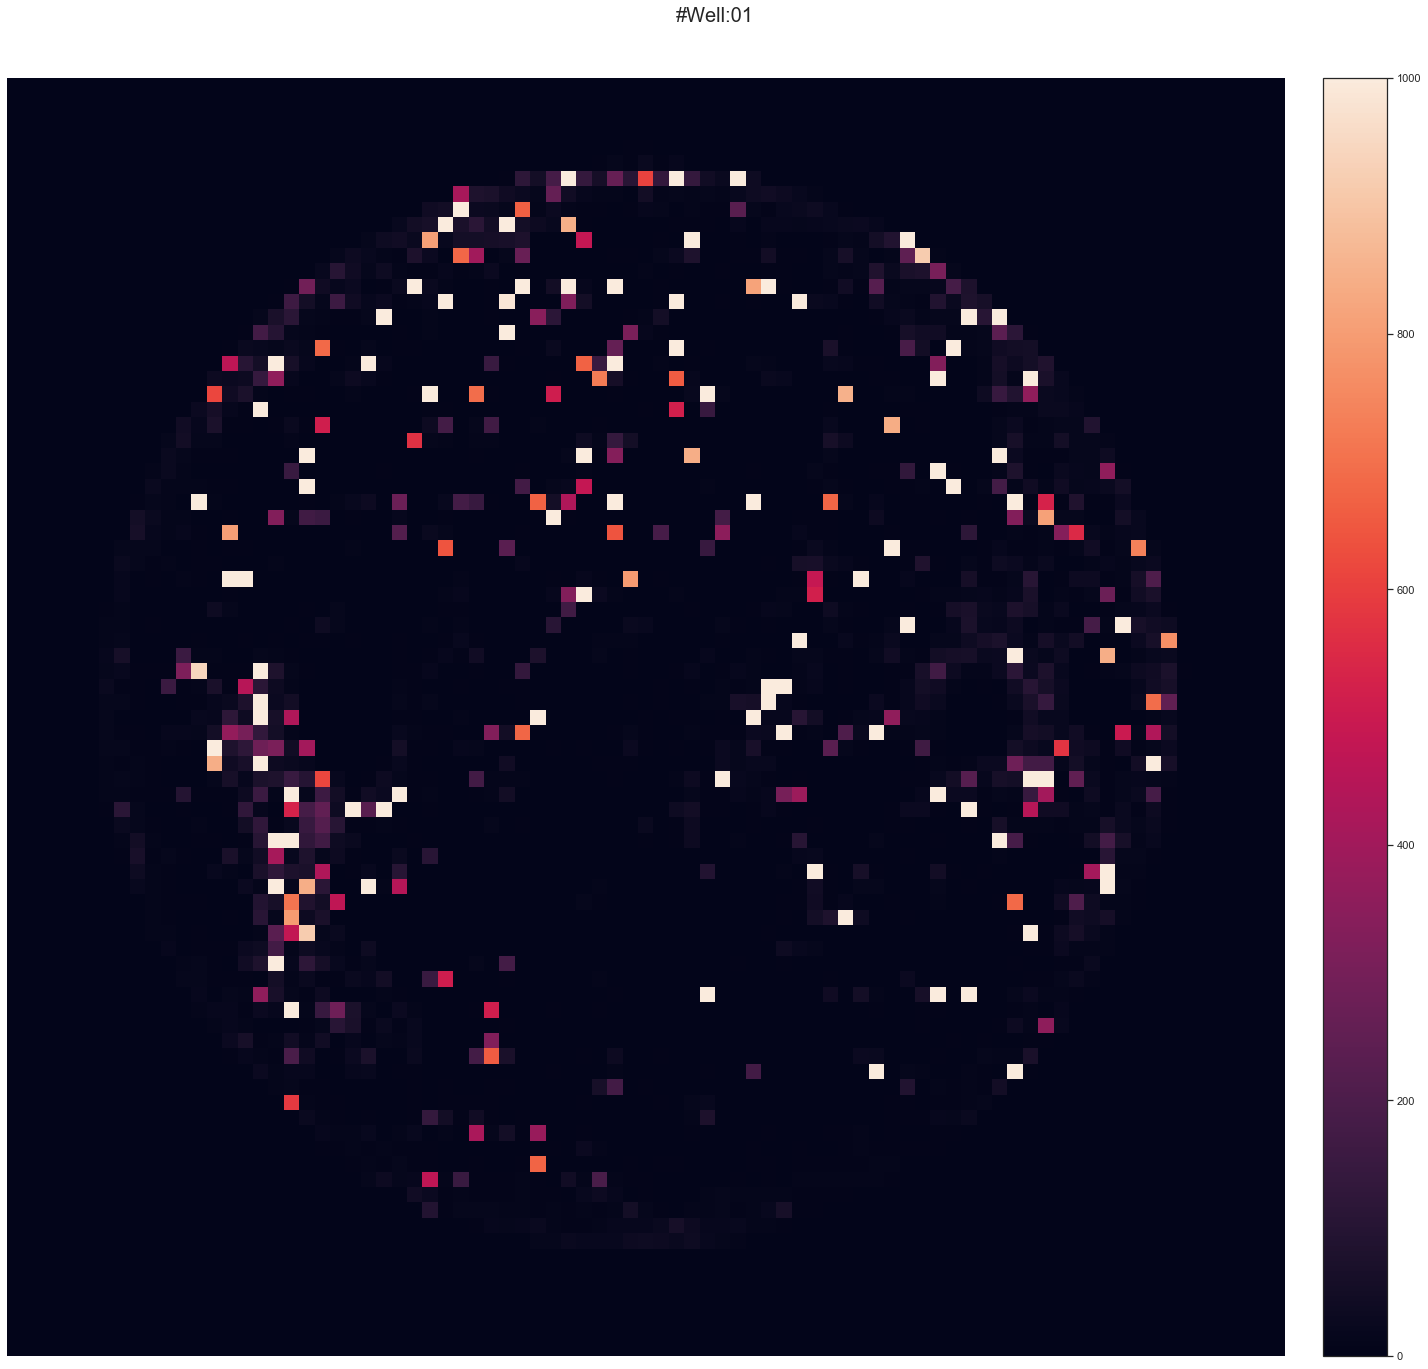

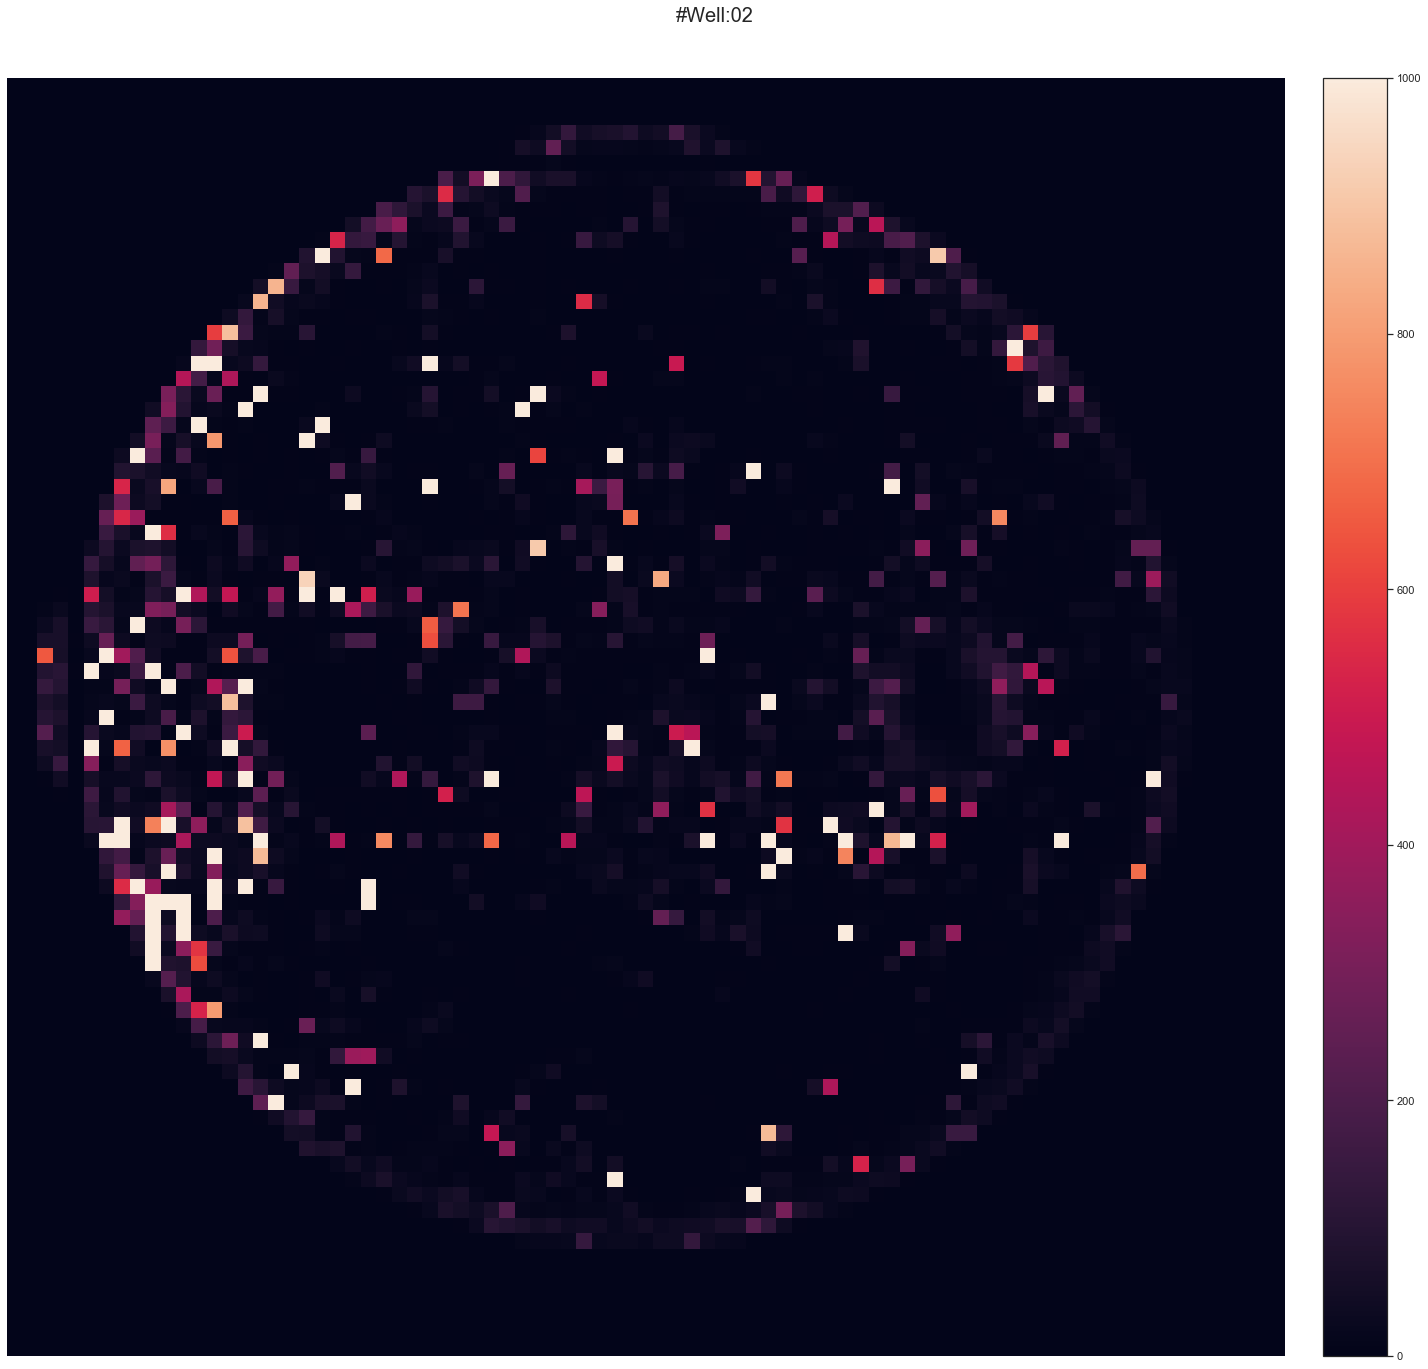

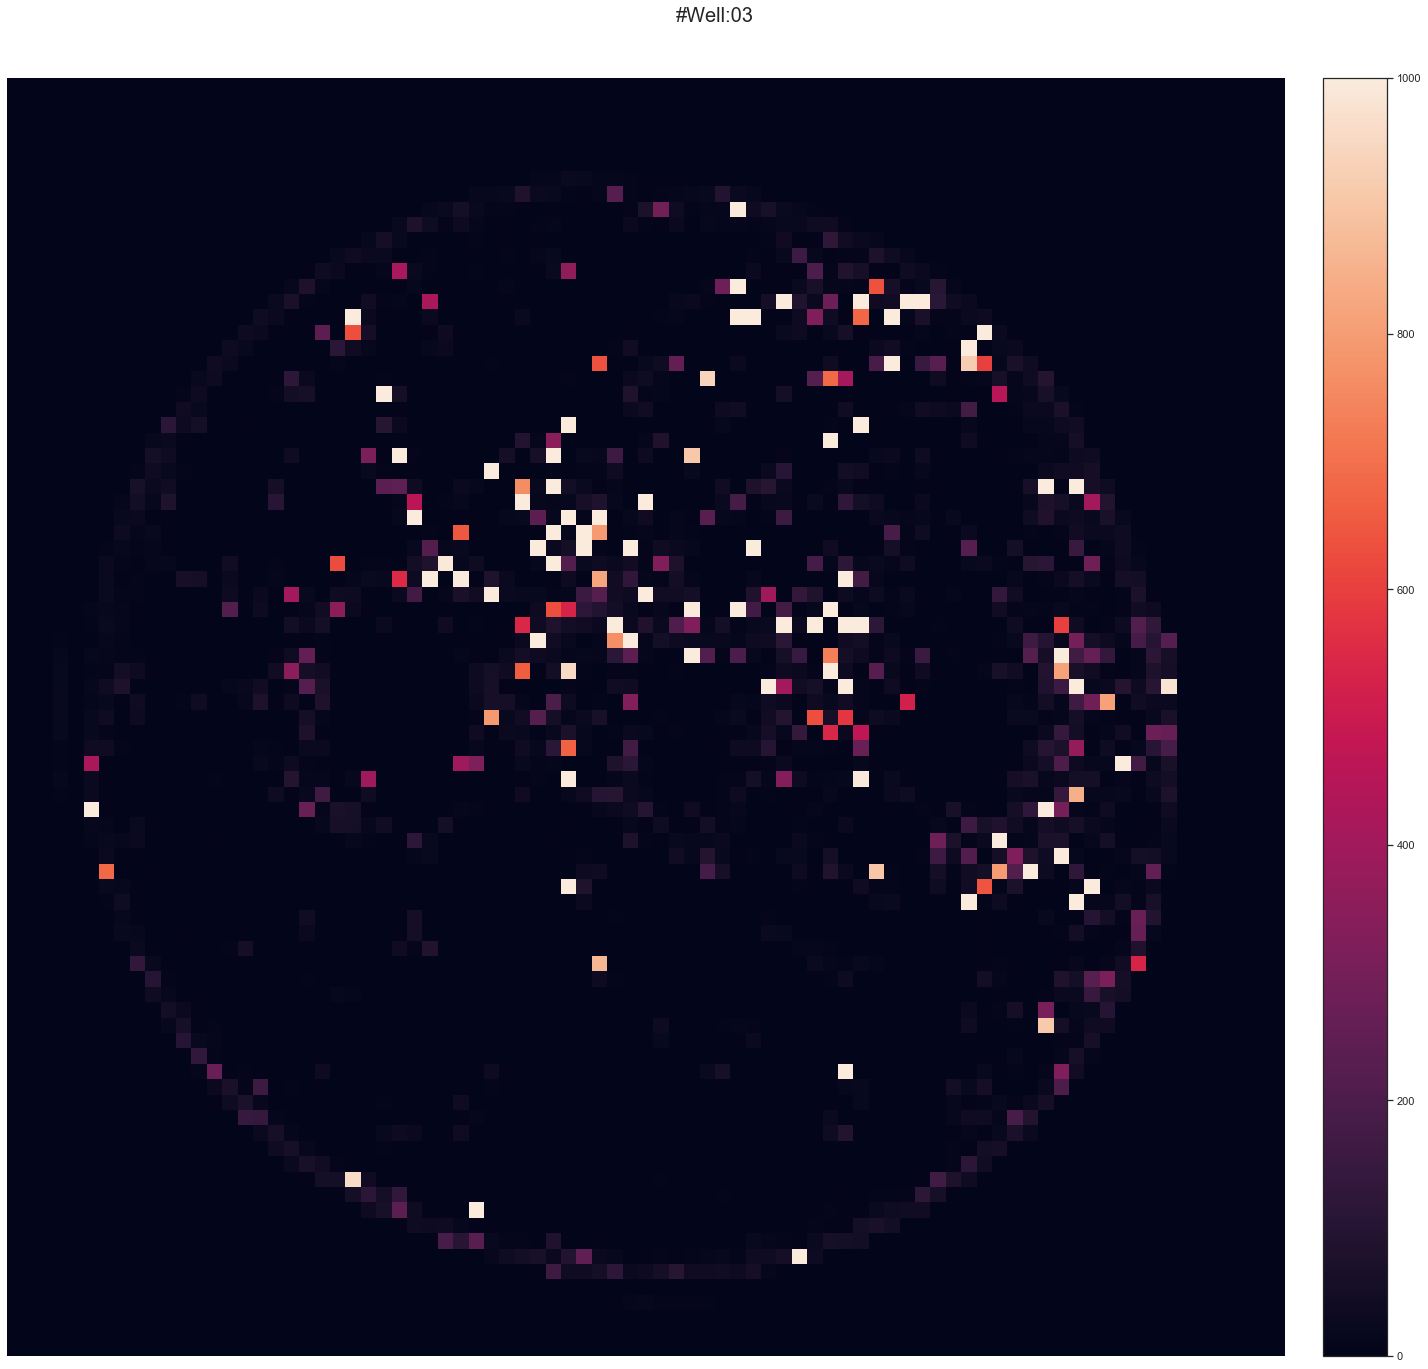

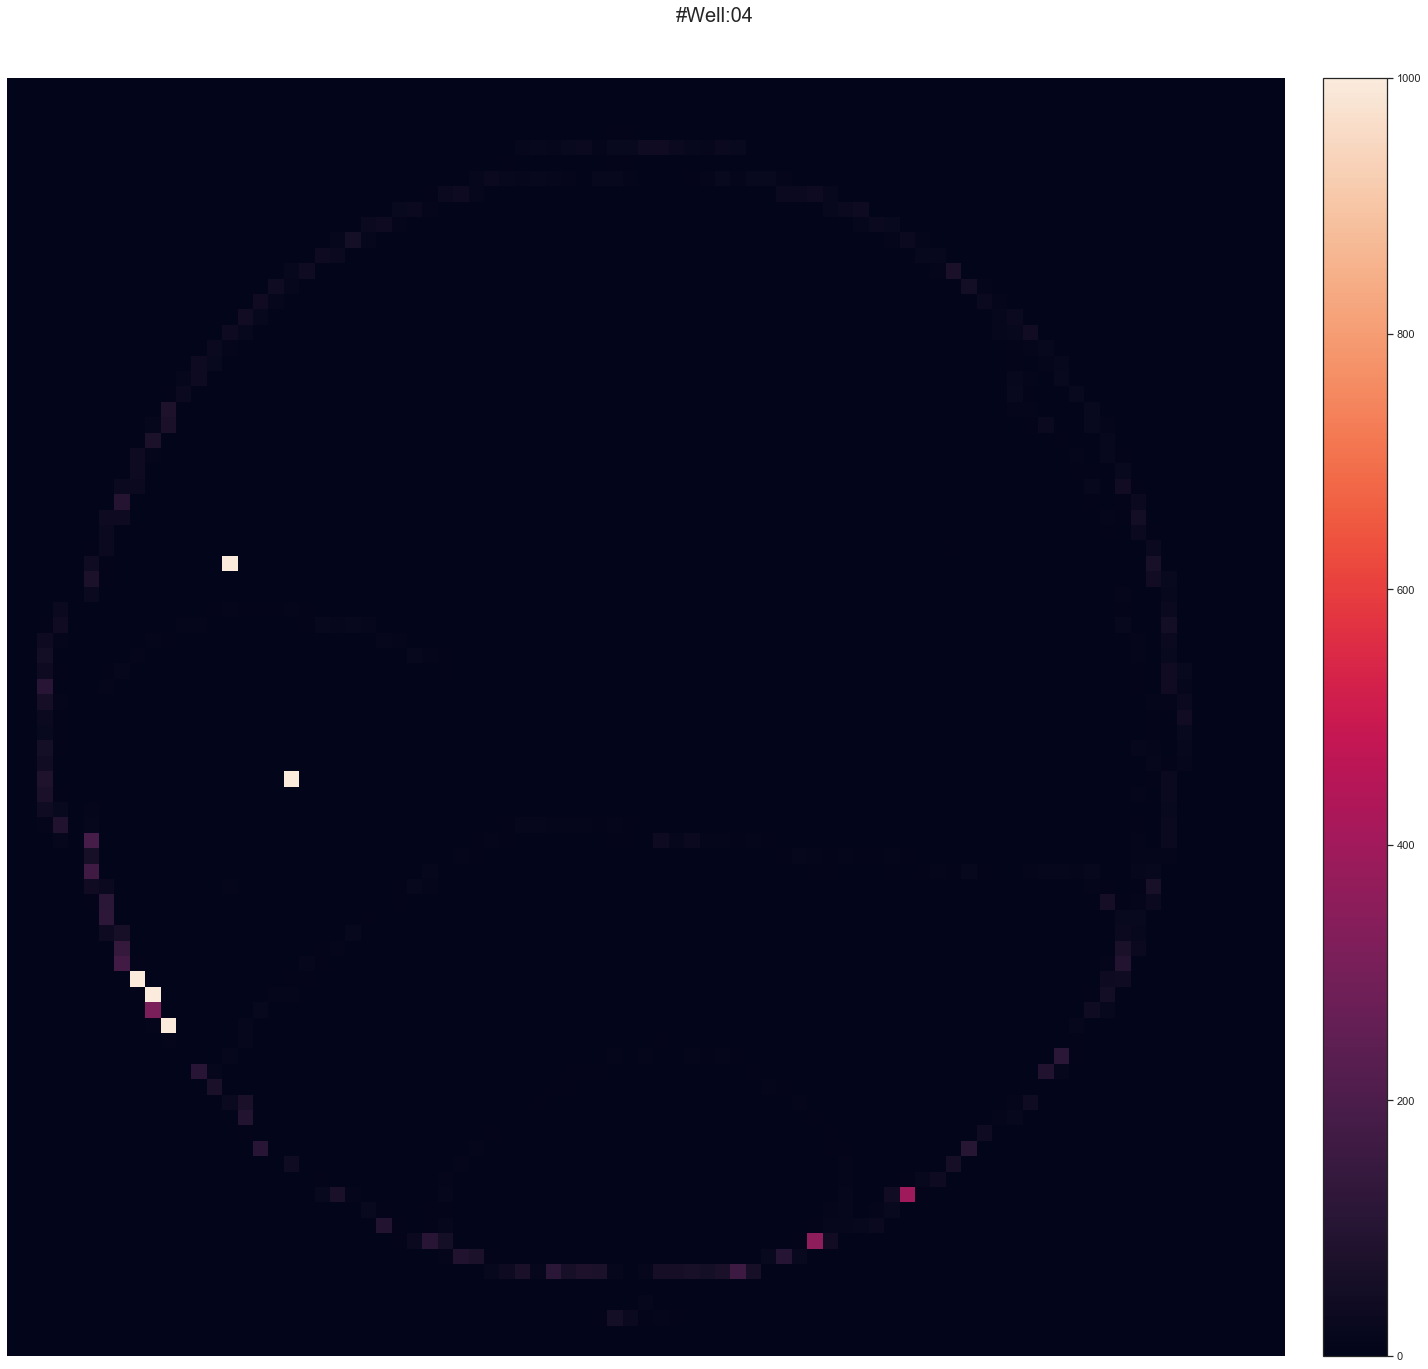

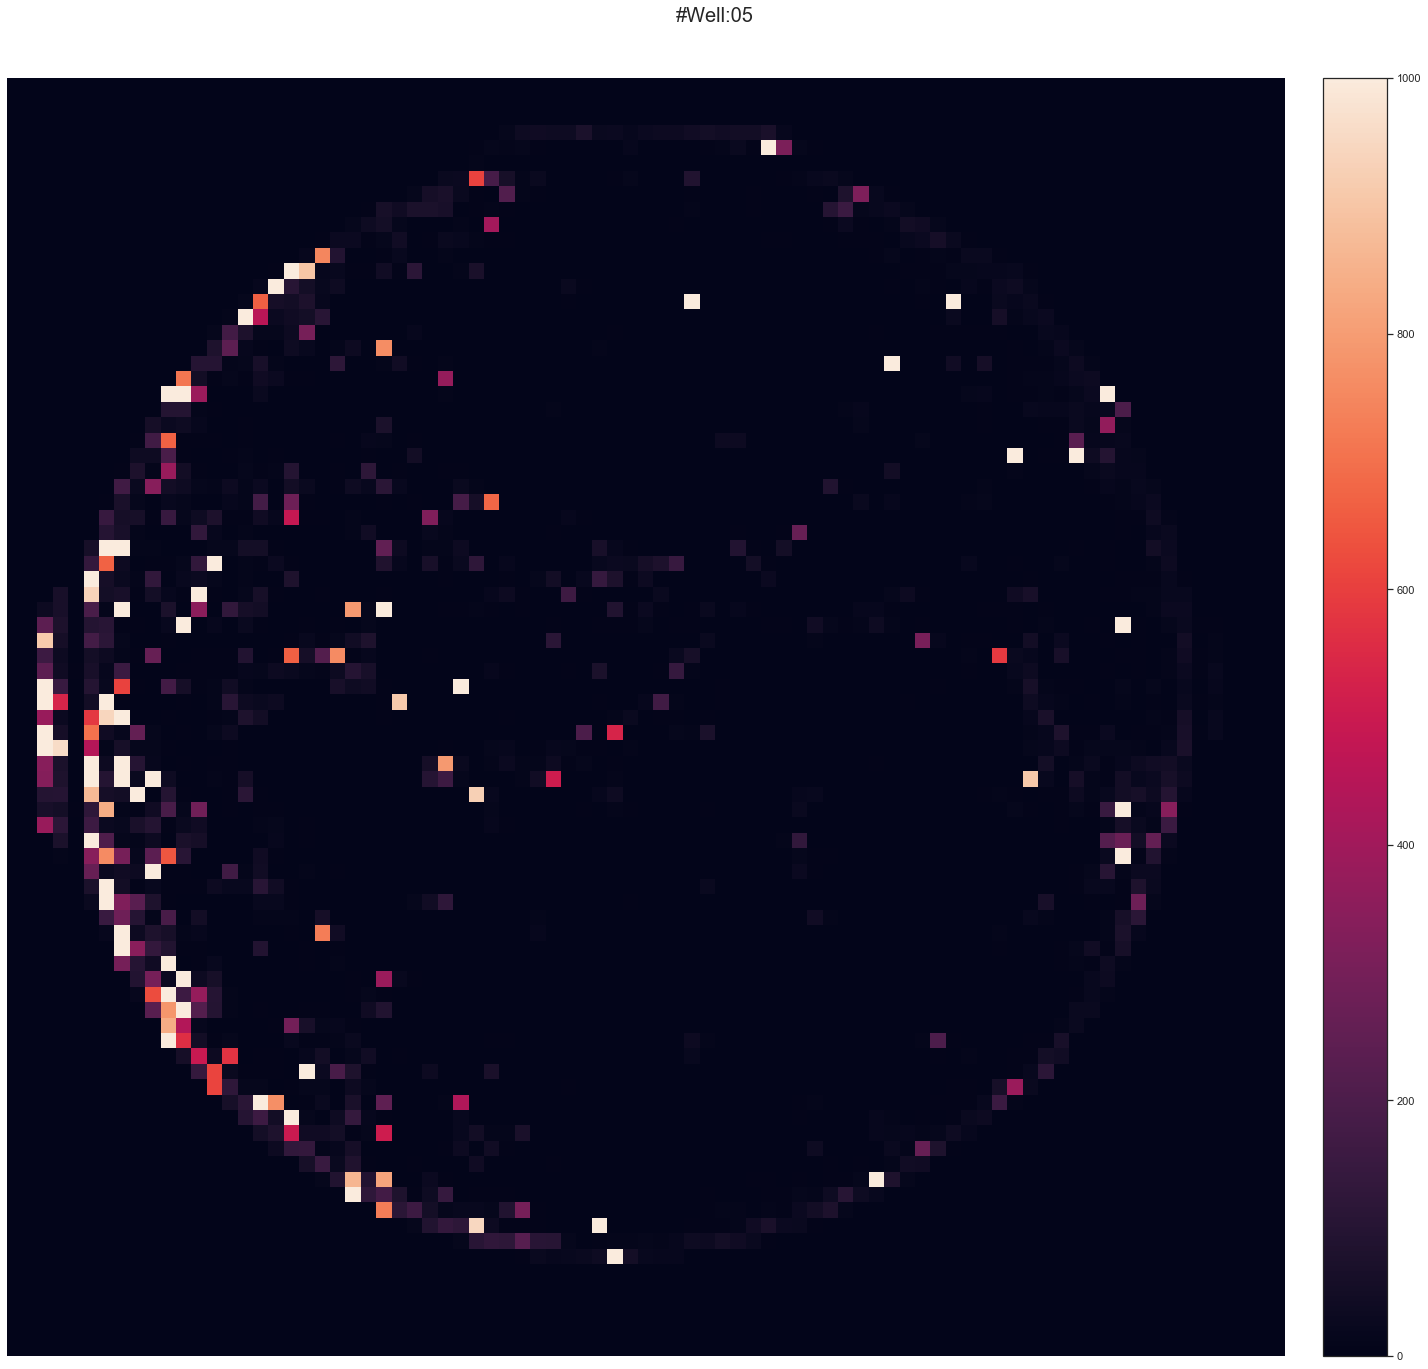

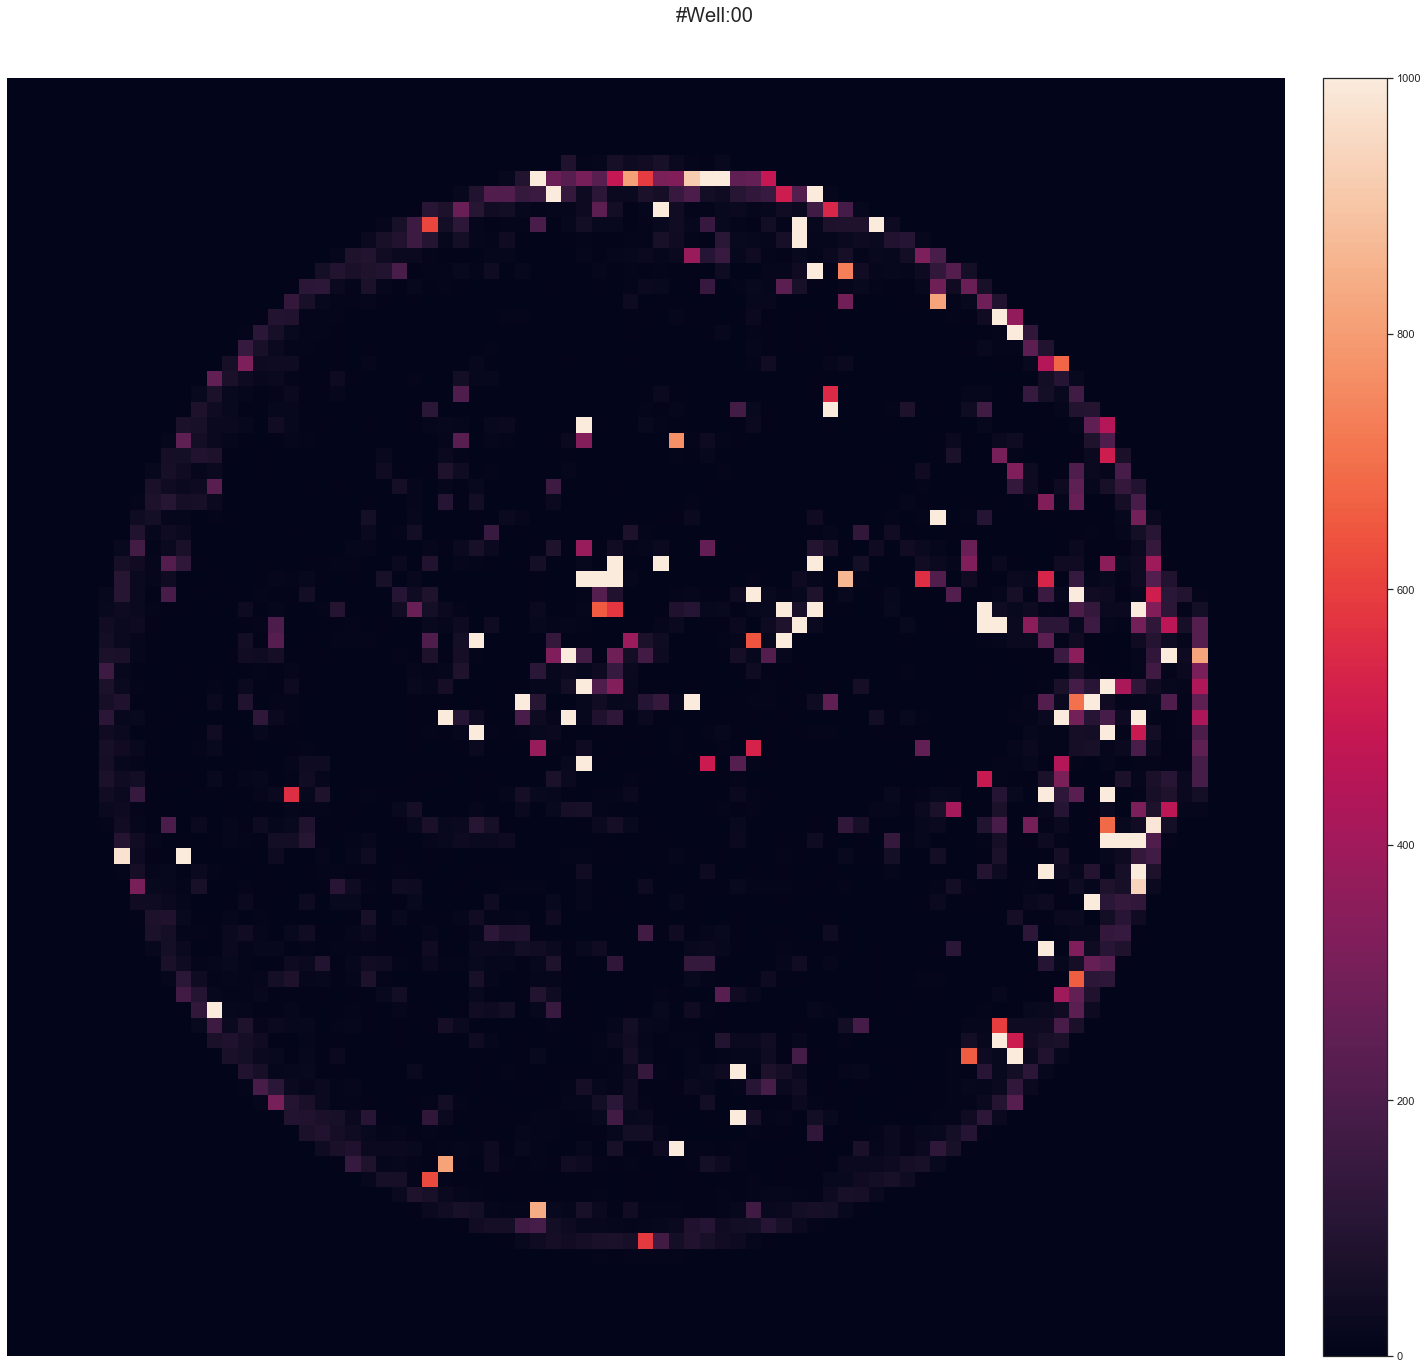

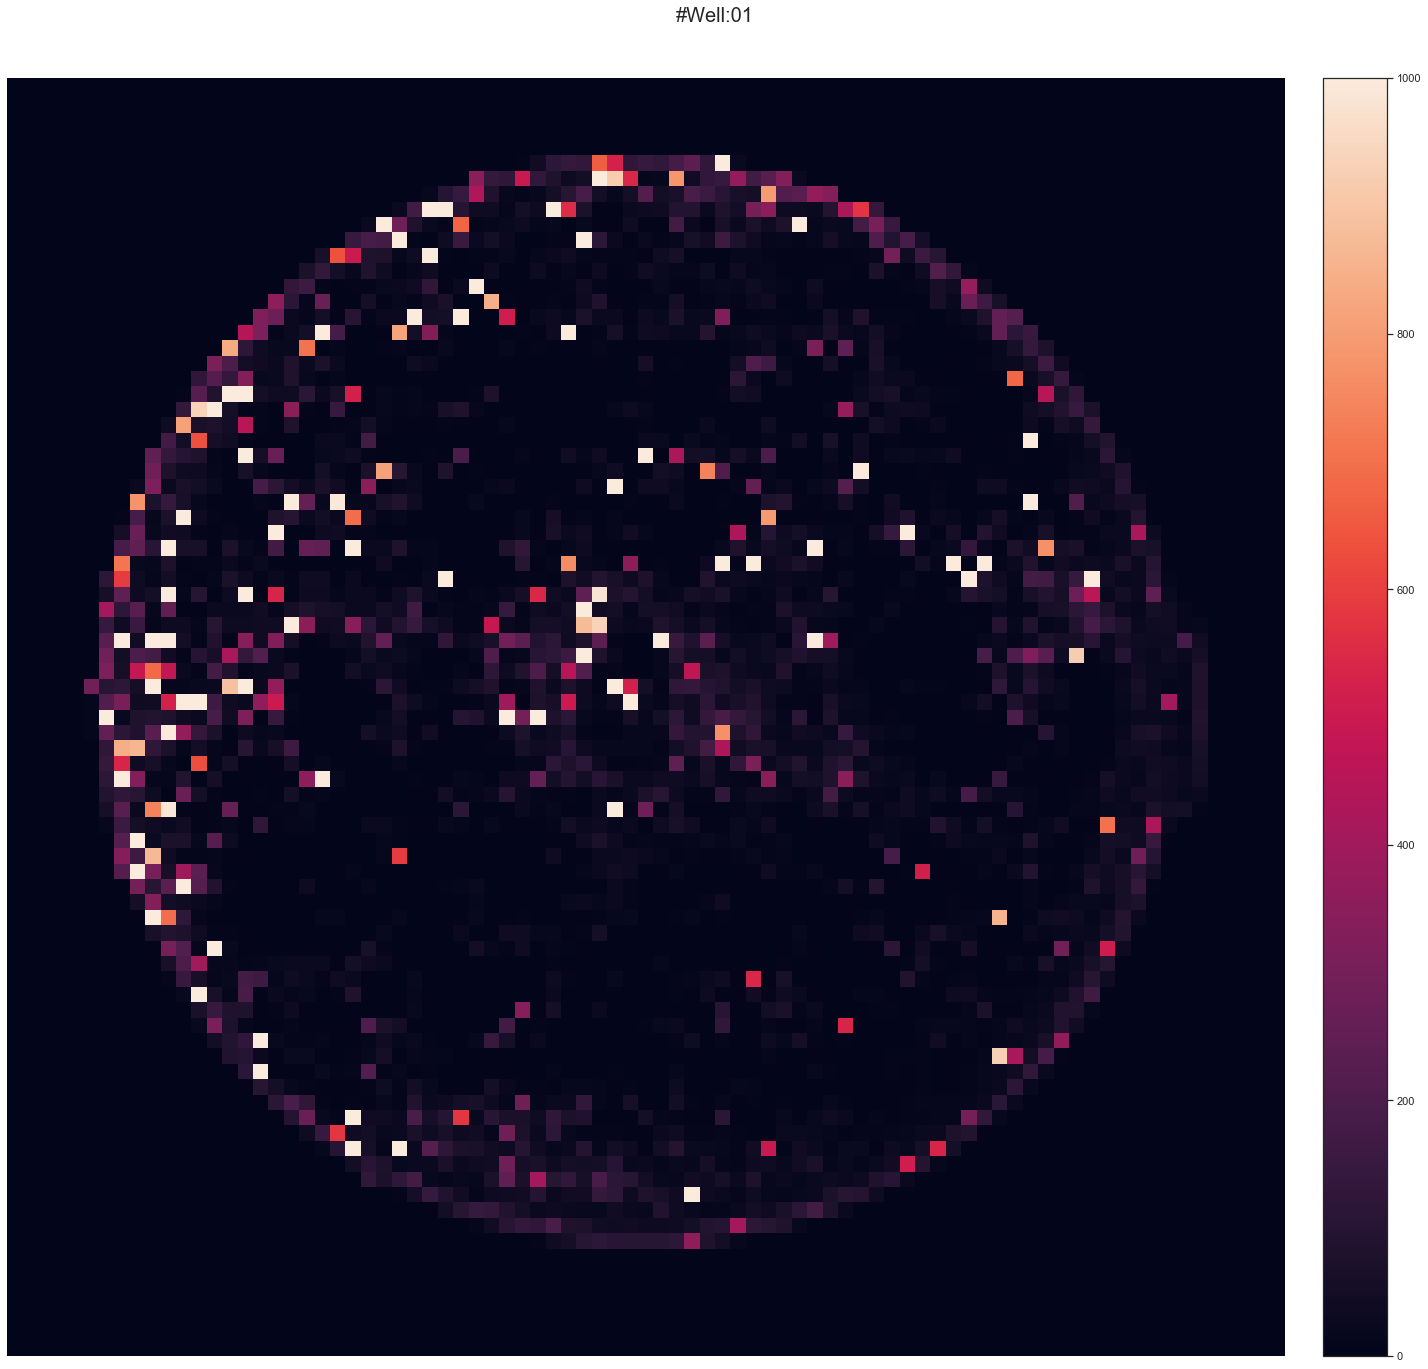

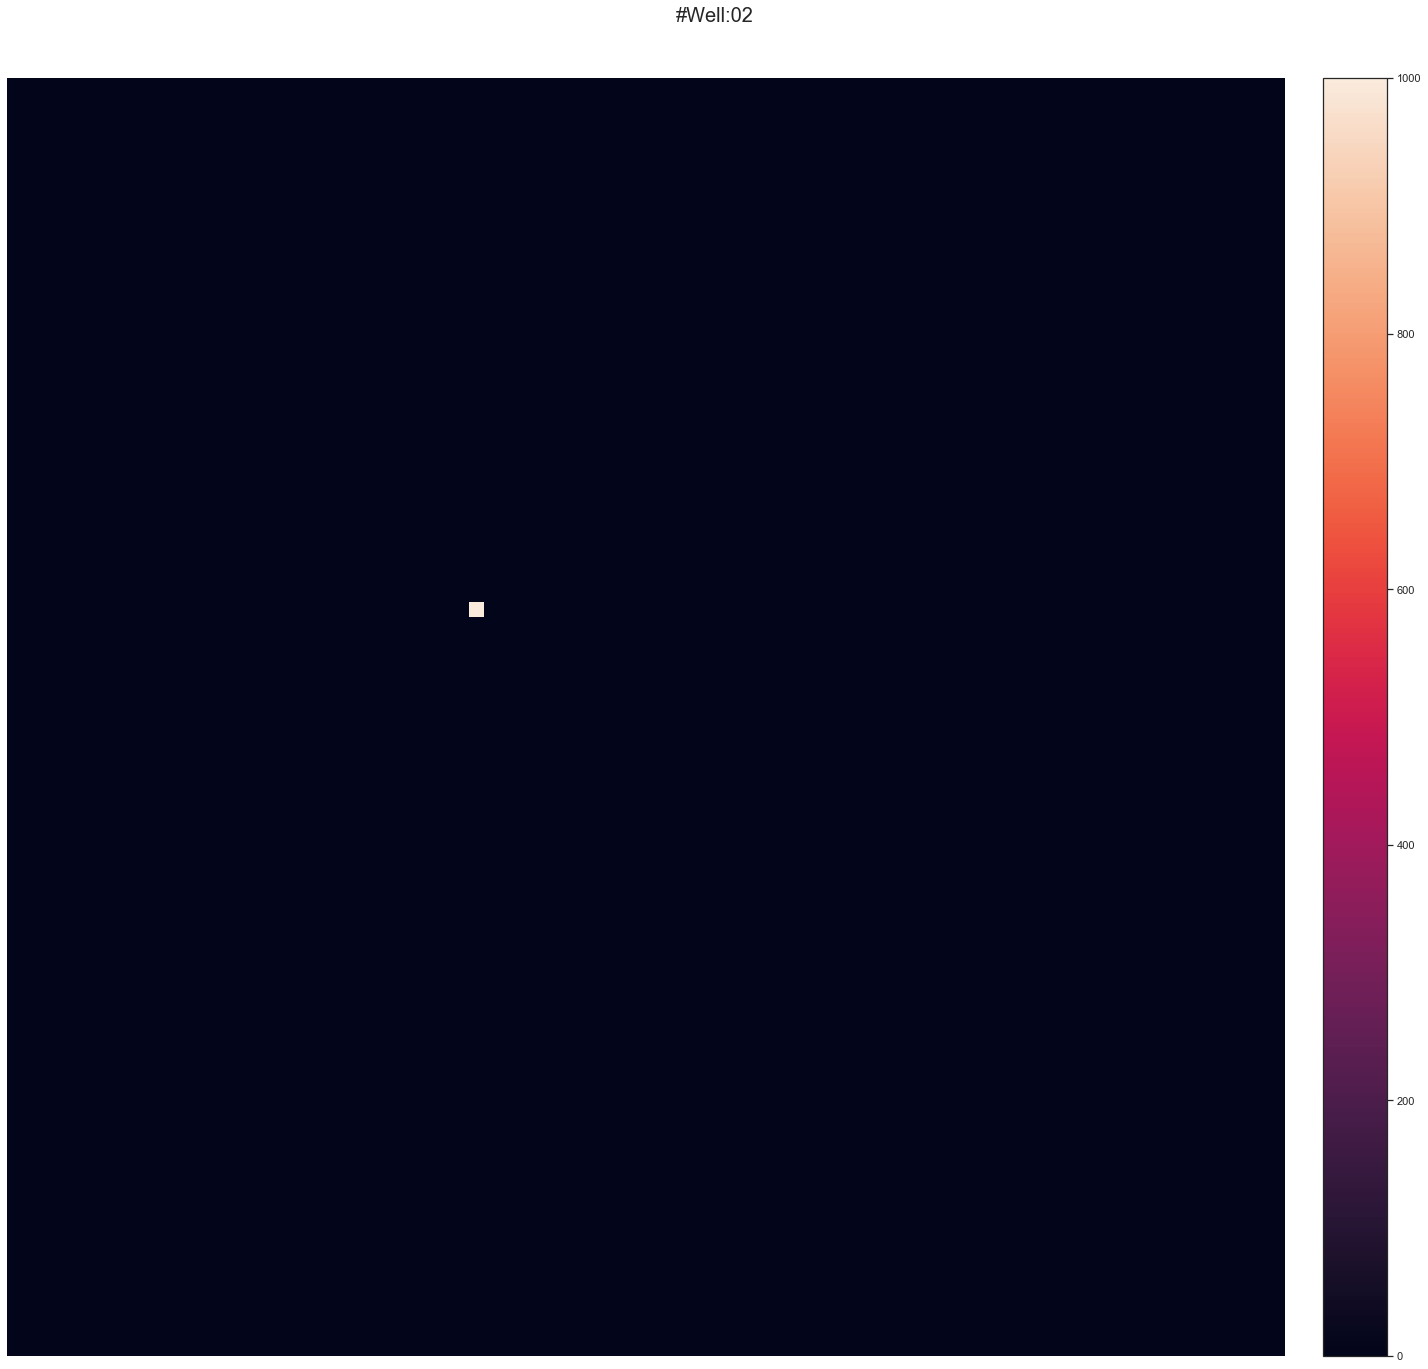

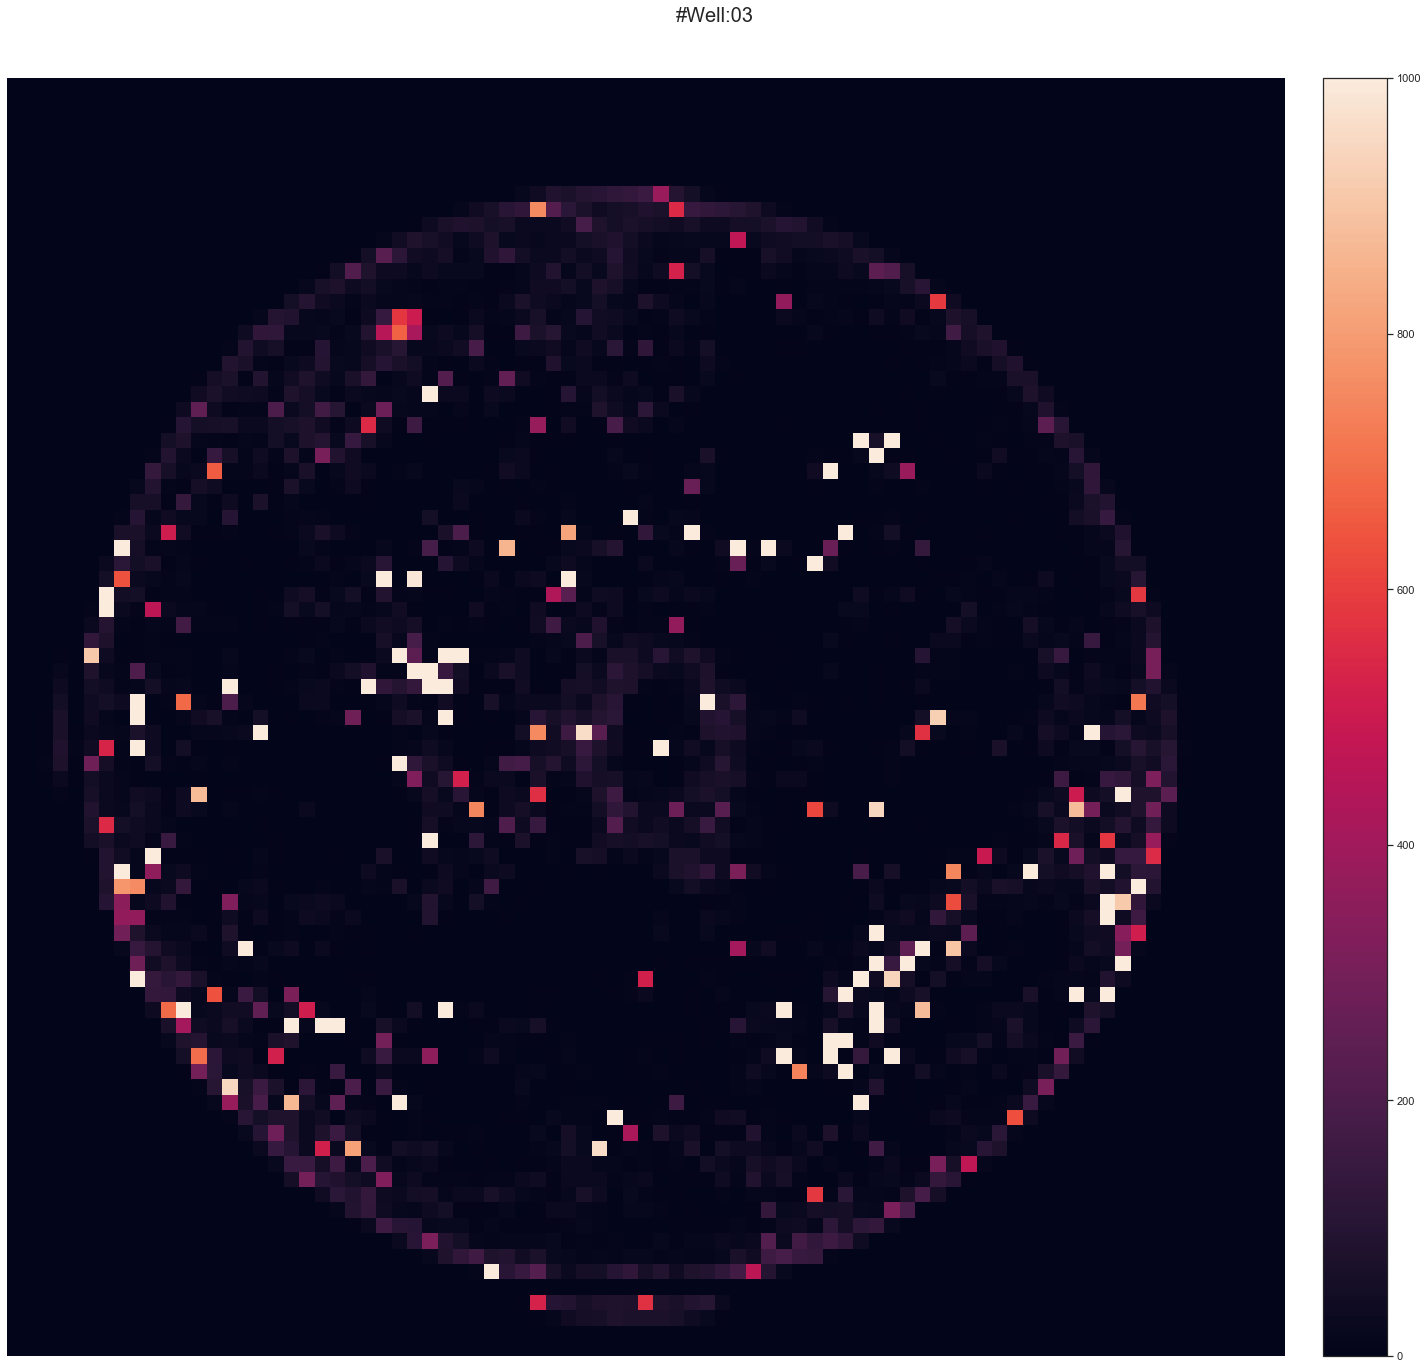

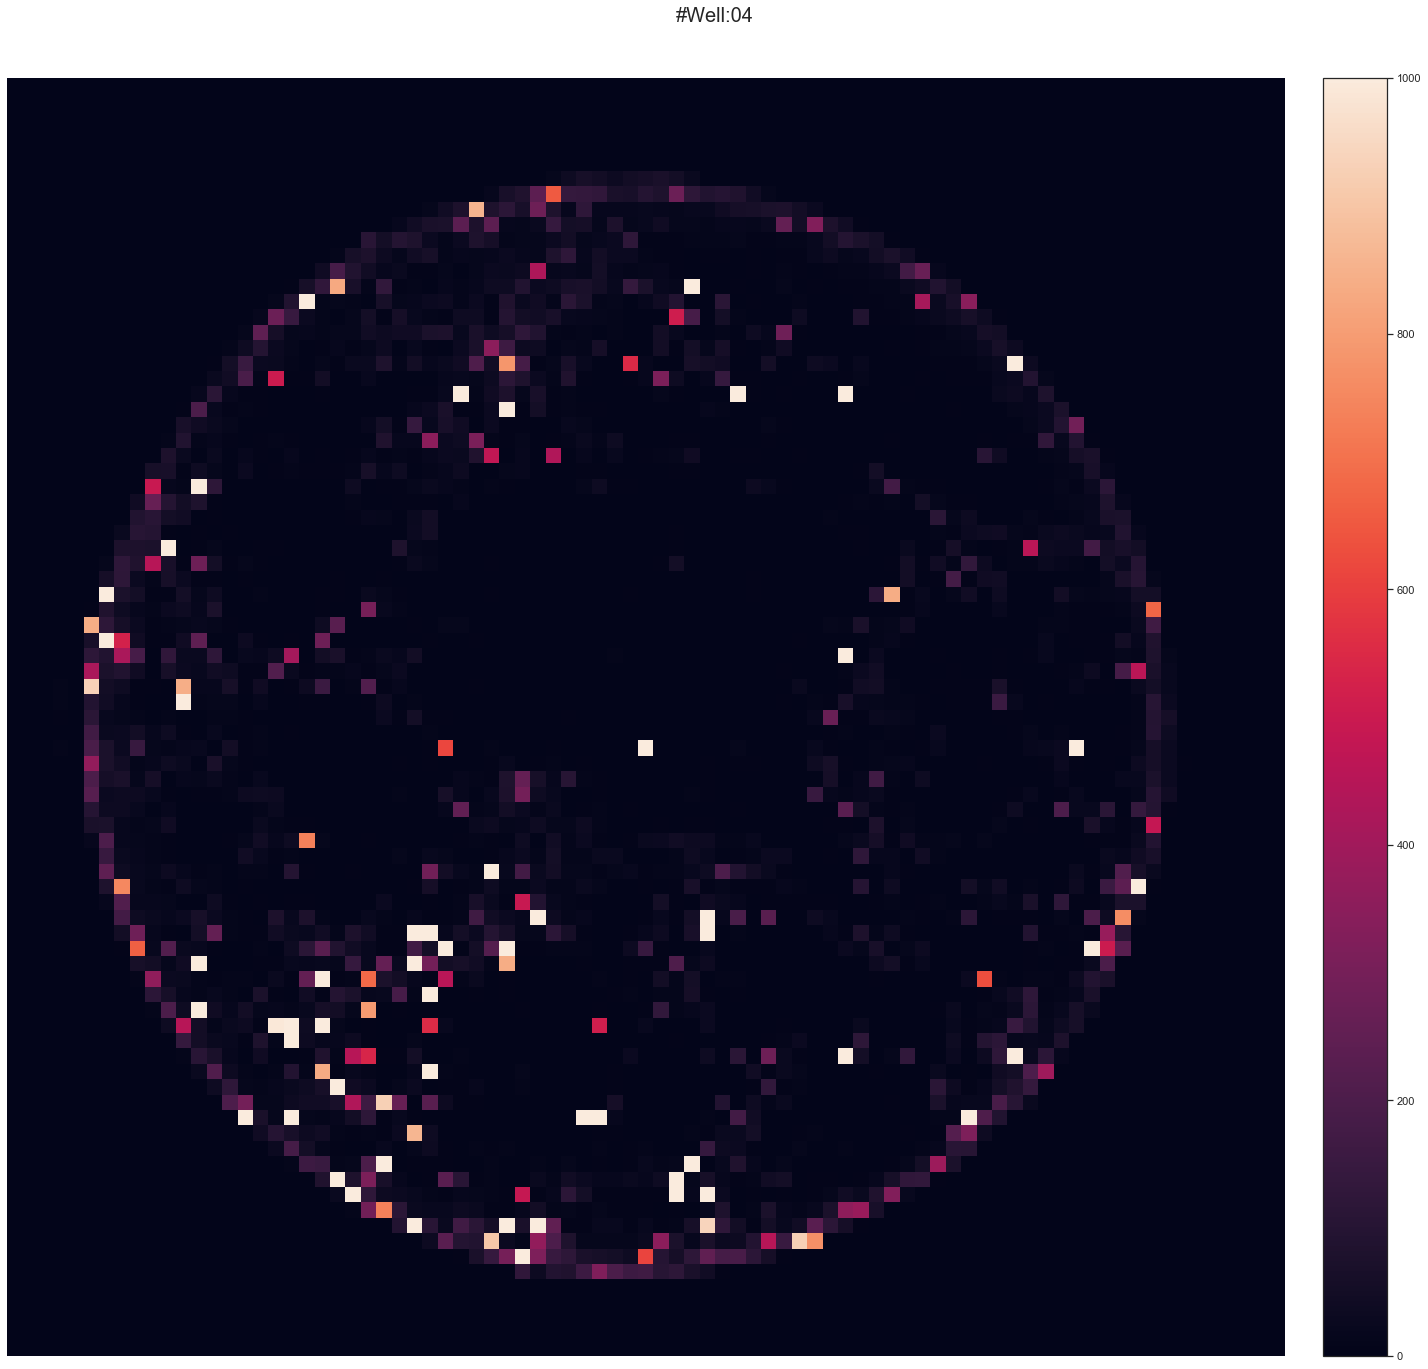

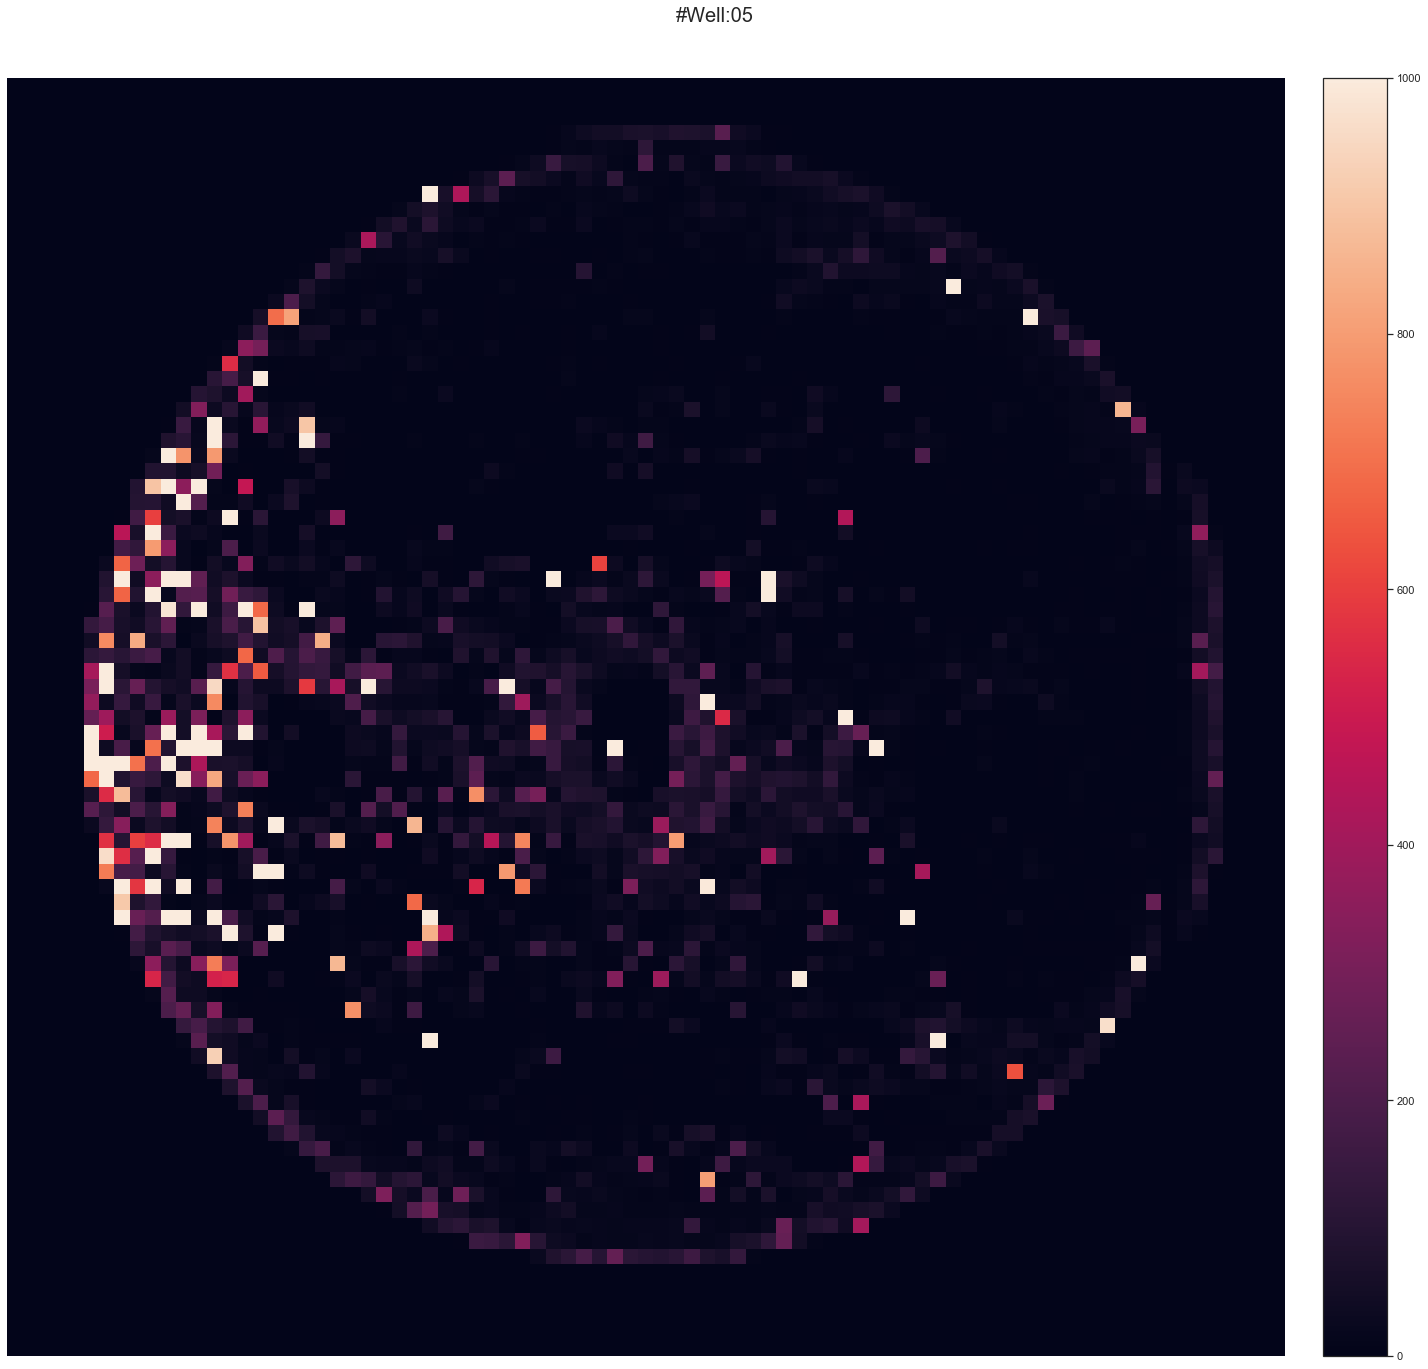

done.


In [47]:
tr_movies = [
            'MOG2',
            #'bg_MOG2',
            #'mdbg_MOG2',
            #'md_MOG2'
            ]

# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }


# 被接近対象の半径Xピクセル内に進入した回数をカウント
def count_entering(dl,dr,thre):
    ind1=np.where(dl<=thre)[0]
    ind2=np.where(dr<=thre)[0]
    x=np.zeros(len(dl))
    x[ind1]=1
    x[ind2]=-1
    n1=len(ind1)
    n2=len(ind2)
    return x,n1,n2

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path1 = os.path.join("{}/{}/csv".format(server_data, data_dir))
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    #mv_num = 2
    
    wnum = x*y
    
    data_dir = datasets[target]
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 3)

    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=2
    # ********************************************
    #x = 1
    #y = 1
    cntr=0
    arr_all=np.array([])
    icntr=0
    for i in tqdm(range(x)): # for image placement
        arrs=np.array([])
        jcntr=0    
        for j in tqdm(range(y)): # for image placement
            fig = plt.figure(figsize=(20,20))
            G = np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(cntr)), delimiter=",")
            disp_range=[eclo_frames[cntr],eclo_frames[cntr]+dframe_post]
            if disp_short==1:
                f1=np.int(disp_range[0])
                f2=np.int(disp_range[1])
            elif disp_short==2:
                f1=np.int(disp_range[0])
                f2=len(G)
            else:
                f1=0
                f2=len(G)

            wellnum=str(cntr).zfill(2)
            #fname=h+wellnum+'.csv'
            #dat=pd.read_csv(fname,header=None)
            #data=pd.DataFrame(dat.values,columns=['y-coord','x-coord'])

            oy,ox=G.T
            lx=fs_dis[cntr,1,0]
            ly=fs_dis[cntr,0,0]
            rx=fs_dis[cntr,1,2]
            ry=fs_dis[cntr,0,2]

            #ox=grav['center_x'].values
            #oy=grav['center_y'].values

            dl=((ox-lx)**2+(oy-ly)**2)**0.5
            dr=((ox-rx)**2+(oy-ry)**2)**0.5

            #dl=((dat.values[:,0]-target_loc[cntr,0])**2+(dat.values[:,1]-target_loc[cntr,1])**2)**0.5
            #dr=((dat.values[:,0]-target_loc[cntr,2])**2+(dat.values[:,1]-target_loc[cntr,3])**2)**0.5

            dl_mean[cntr]=np.mean(dl)
            dl_std[cntr]=np.std(dl)
            dr_mean[cntr]=np.mean(dr)
            dr_std[cntr]=np.std(dr)

            w=np.ones(dl.size)*cntr
            df=pd.DataFrame(np.c_[dl,dr,w],columns=['dl','dr','well'])
            distances=pd.concat([distances,df])

            bias=(dl-dr)/(dl+dr)
            bias=pd.Series(bias)
            #bias=bias.rolling(window=30).mean()

            maxt=len(ox)
            sns.set(style="white", color_codes=True)

            xs=range(len(ox))
            # ***** Visualization *****
            #sns.jointplot(x='x-coord', y='y-coord', data=data, kind='kde') #kind=kde,hex
            fontsize=18

            if 0: # 滞在の時間分布の図を描画したい場合ここを1に。
                #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                #                 xlim=(10,210),ylim=(10,210),kind='kde')
                #fig = plt.figure()
                ax = fig.add_subplot(111)

                H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                              bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                              normed=True)
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
                cax = divider.append_axes('right', '5%', pad='3%')             
                ax.axis("off")
                H[3].set_clim(0,1e-4)
                ax.set_aspect('equal')
                fig.colorbar(H[3],cax=cax)
                H[3].set_clim(0,1e-4)
                #cbar.set_label("color bar", fontname="Times New Roman", fontsize=10)

                #plt.title('#Well:'+wellnum,fontsize=fontsize)
                
                
            elif 1: # 滞在の時間分布の図を描画したい場合ここを1に。
                #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                #                 xlim=(10,210),ylim=(10,210),kind='kde')
                #fig = plt.figure()
                ax = fig.add_subplot(111)

                '''
                H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                              bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                              normed=False)
                '''
                H = np.histogram2d(ox[f1:f2],oy[f1:f2], bins=[np.linspace(0,210,84),np.linspace(0,210,84)])
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                
                c_thres=np.array([0,10,100,1000,10000])
                #H_ = H[0].copy()
                H = list(H)
                c_len = len(c_thres)
                for i in range(c_len):
                    if i != (c_len-1):
                        mask = np.where( (H[0]>c_thres[i]) & (H[0]<=c_thres[i+1]) )
                        H[0][mask] = 1+i
                    else:
                        mask=np.where( H[0]>c_thres[i] )
                        H[0][mask] = 1+i

                H[0] = H[0]*100
                
                im = ax.imshow(H[0].T, interpolation='nearest', origin='lower', extent=[0,210,0,210], cmap=cm.jet)
                divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
                plt.scatter(px, py, s=200, marker='x', c='black')
                cax = divider.append_axes('right', '5%', pad='3%')             
                ax.axis("off")
                #H[3].set_clim(0,1e-4)
                ax.set_aspect('equal')
                fig.colorbar(im, cax=cax)
                #H[3].set_clim(0,1000)
                #cbar.set_label("color bar", fontname="Times New Roman", fontsize=10)


            else: # 以下は様々な統計を描画               
                bias_thre=0.5 # Bias value

                # *** 1st row ***            
                c='blue'
                ax=plt.subplot2grid((3,6),(0,0),colspan=4)
                lp=plt.plot(xs[f1:f2], bias.values[f1:f2], color=c)
                plt.plot(xs[f1:f2], np.zeros(f2-f1), color='black')
                plt.plot(xs[f1:f2], np.ones(f2-f1)*bias_thre, color='black',alpha=0.5)
                plt.plot(xs[f1:f2], np.ones(f2-f1)*(-bias_thre), color='black',alpha=0.5)
                plt.xlim((-1,maxt+1))
                plt.ylim((-1.05,1.05))
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-1.05,1.05])
                plt.title('#Well:'+wellnum+'     Bias',fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)

                ax=plt.subplot2grid((3,6),(0,4))
                plt.hist(bias.values[f1:f2],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                plt.title('Hist dr',fontsize=fontsize)
                plt.ylim(-1.05,1.05)
                set_fontsize(ax,fontsize)
                ax.set_yticklabels([])
                xl=ax.get_xlim()


                ax=plt.subplot2grid((3,6),(0,5))
                plt.bar([0,1],[np.mean(dl[f1:f2]),np.mean(dr[f1:f2])],color=c)
                ax.set_xticks([0,1])
                ax.set_xticklabels(['dL','dR'],fontsize=fontsize)
                plt.title('Average',fontsize=fontsize)
                set_fontsize(ax,fontsize)



                # *** 2st row ***
                c='red'
                ind1=np.where(bias.values[f1:f2]>=bias_thre)[0]
                ind2=np.where(bias.values[f1:f2]<=-bias_thre)[0]
                n1=len(ind1)
                n2=len(ind2)

                biasmod=np.copy(bias.values[f1:f2])
                ind=np.where((biasmod<bias_thre)&(biasmod>(-bias_thre)))[0]
                biasmod[ind]=0.0

                plotdata=np.cumsum(biasmod)
                ymax=np.max(np.abs(plotdata))
                ax=plt.subplot2grid((3,6),(1,0),colspan=4)
                lp=plt.plot(xs[f1:f2], plotdata, color=c,linewidth=3)
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                         color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of Bias exceeding thre',fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)


                ax=plt.subplot2grid((3,6),(1,4))
                plt.hist(np.r_[biasmod[ind1],biasmod[ind2]],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                set_fontsize(ax,fontsize)
                ax.set_xlim(xl)

                ax=plt.subplot2grid((3,6),(1,5))
                plt.bar([0,1],[n1,n2],color=c)
                ax.set_xticks([0,1])
                ax.set_xticklabels(['High','Low'],fontsize=fontsize)
                plt.title('Count',fontsize=fontsize)
                set_fontsize(ax,fontsize)



                # *** 3rd row ***
                thres=[15,20,25]
                if cntr==0:
                    onset_frames=np.zeros((wnum,len(thres)))
                xx=np.zeros((len(thres),len(dl)))
                nn1=np.zeros(len(thres))
                nn2=np.zeros(len(thres))
                for ii in range(len(thres)):
                    xx[ii,:],nn1[ii],nn2[ii]=count_entering(dl[f1:f2],dr[f1:f2],thres[ii])
                if cntr==0:
                    n1s=nn1
                    n2s=nn2
                else:
                    n1s=np.c_[n1s,nn1]
                    n2s=np.c_[n2s,nn2]

                cs=['green','magenta','cyan']
                ax=plt.subplot2grid((3,6),(2,0),colspan=4)
                if 0:
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        lp=plt.plot(xs, d, color=cs[ii],linewidth=3)
                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]
                else:
                    tmpmax=np.zeros_like(thres)
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        ind_l=np.where(xx[ii]==+1)[0]
                        ind_r=np.where(xx[ii]==-1)[0]

                        lv,b=np.histogram(ind_l,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
                        rv,b=np.histogram(ind_r,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
                        #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max([np.max(np.abs(lv)),np.max(np.abs(rv))])

                        plotdata=np.cumsum(-rv+lv)
                        plt.plot(b[:-1],np.cumsum(-rv+lv),linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max(np.abs(plotdata))


                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]

                #ymax=np.max(np.abs(np.cumsum(xx[-1])))
                ymax=np.max(tmpmax)
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                for ii in range(len(thres)):        
                    plt.plot([onset_frames[cntr,ii],onset_frames[cntr,ii]],
                             [-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                        color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of count entering circle (G:15,M:20,C:25 pixel)',
                          fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)


                yl=np.max([np.max(nn1),np.max(nn2)])*1.1
                for ii in range(len(thres)):
                    ax=plt.subplot2grid((3,9),(2,6+ii))
                    plt.bar([0,1],[nn1[ii],nn2[ii]],color=cs[ii])
                    set_fontsize(ax,fontsize)
                    ax.set_xticks([0,1])
                    ax.set_xticklabels(['L','R'],fontsize=fontsize)
                    ax.set_ylim([0,yl])


            #sys.exit()
            # *************************
            
            if 0:
                fname = os.path.join(local_data,data_dir,'img3')
            else:
                fname = os.path.join(local_data,data_dir,'img3_not_normed')
            os.makedirs(fname, exist_ok=True)
            imfname = fname+'/well{}.png'.format(wellnum)
            plt.savefig(imfname)
            arr=np.array(Image.open(imfname))
            if jcntr==0: arrs=arr
            else: arrs=np.hstack((arrs,arr))
            jcntr+=1

            plt.suptitle('#Well:'+wellnum,verticalalignment='bottom',fontsize=20)        

            plt.tight_layout()
            plt.show()

            cntr+=1
        if icntr==0: arr_all=arrs
        else: arr_all=np.vstack((arr_all,arrs))
        icntr+=1

    pil_img = Image.fromarray(arr_all)
    pil_img.save(os.path.join(fname,'img-summary.png'))
    
#plt.figure(figsize=(15, 15))
#ax = sns.violinplot(x=distances['well'], y=pkmn["dr"], split=True) 

print('done.')

In [82]:
H = np.histogram2d(ox[f1:f2],oy[f1:f2], bins=[np.linspace(0,210,84),np.linspace(0,210,84)])

In [83]:
H

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.        ,   2.53012048,   5.06024096,   7.59036145,
         10.12048193,  12.65060241,  15.18072289,  17.71084337,
         20.24096386,  22.77108434,  25.30120482,  27.8313253 ,
         30.36144578,  32.89156627,  35.42168675,  37.95180723,
         40.48192771,  43.01204819,  45.54216867,  48.07228916,
         50.60240964,  53.13253012,  55.6626506 ,  58.19277108,
         60.72289157,  63.25301205,  65.78313253,  68.31325301,
         70.84337349,  73.37349398,  75.90361446,  78.43373494,
         80.96385542,  83.4939759 ,  86.02409639,  88.55421687,
         91.08433735,  93.61445783,  96.14457831,  98.6746988 ,
        101.20481928, 103.73493976, 106.26506024, 108.79518072,
        111.3253012 , 113.85542169, 116.3855421

In [55]:
data_dir = datasets['w1118_3']
tar_mv = movies['w1118_3'][1]

tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

# 前景用動画読み込みの設定
movie = cv2.VideoCapture(tar_path)

# 動画ファイル保存用の設定
fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
print(fps)

3


In [78]:
c_thres=np.array([0,10,100,1000,10000])
#H_ = H[0].copy()
H = list(H)
for i in range(len(c_thres)):
    if i != 4:
        mask = np.where( (H[0]>c_thres[i]) & (H[0]<=c_thres[i+1]) )
        H[0][mask] = 1+i
    else:
        mask=np.where( H[0]>c_thres[i] )
        H[0][mask] = 1+i
        
H[0] = H[0]*100
print( mask )

(array([], dtype=int64), array([], dtype=int64))


被接近対象なし

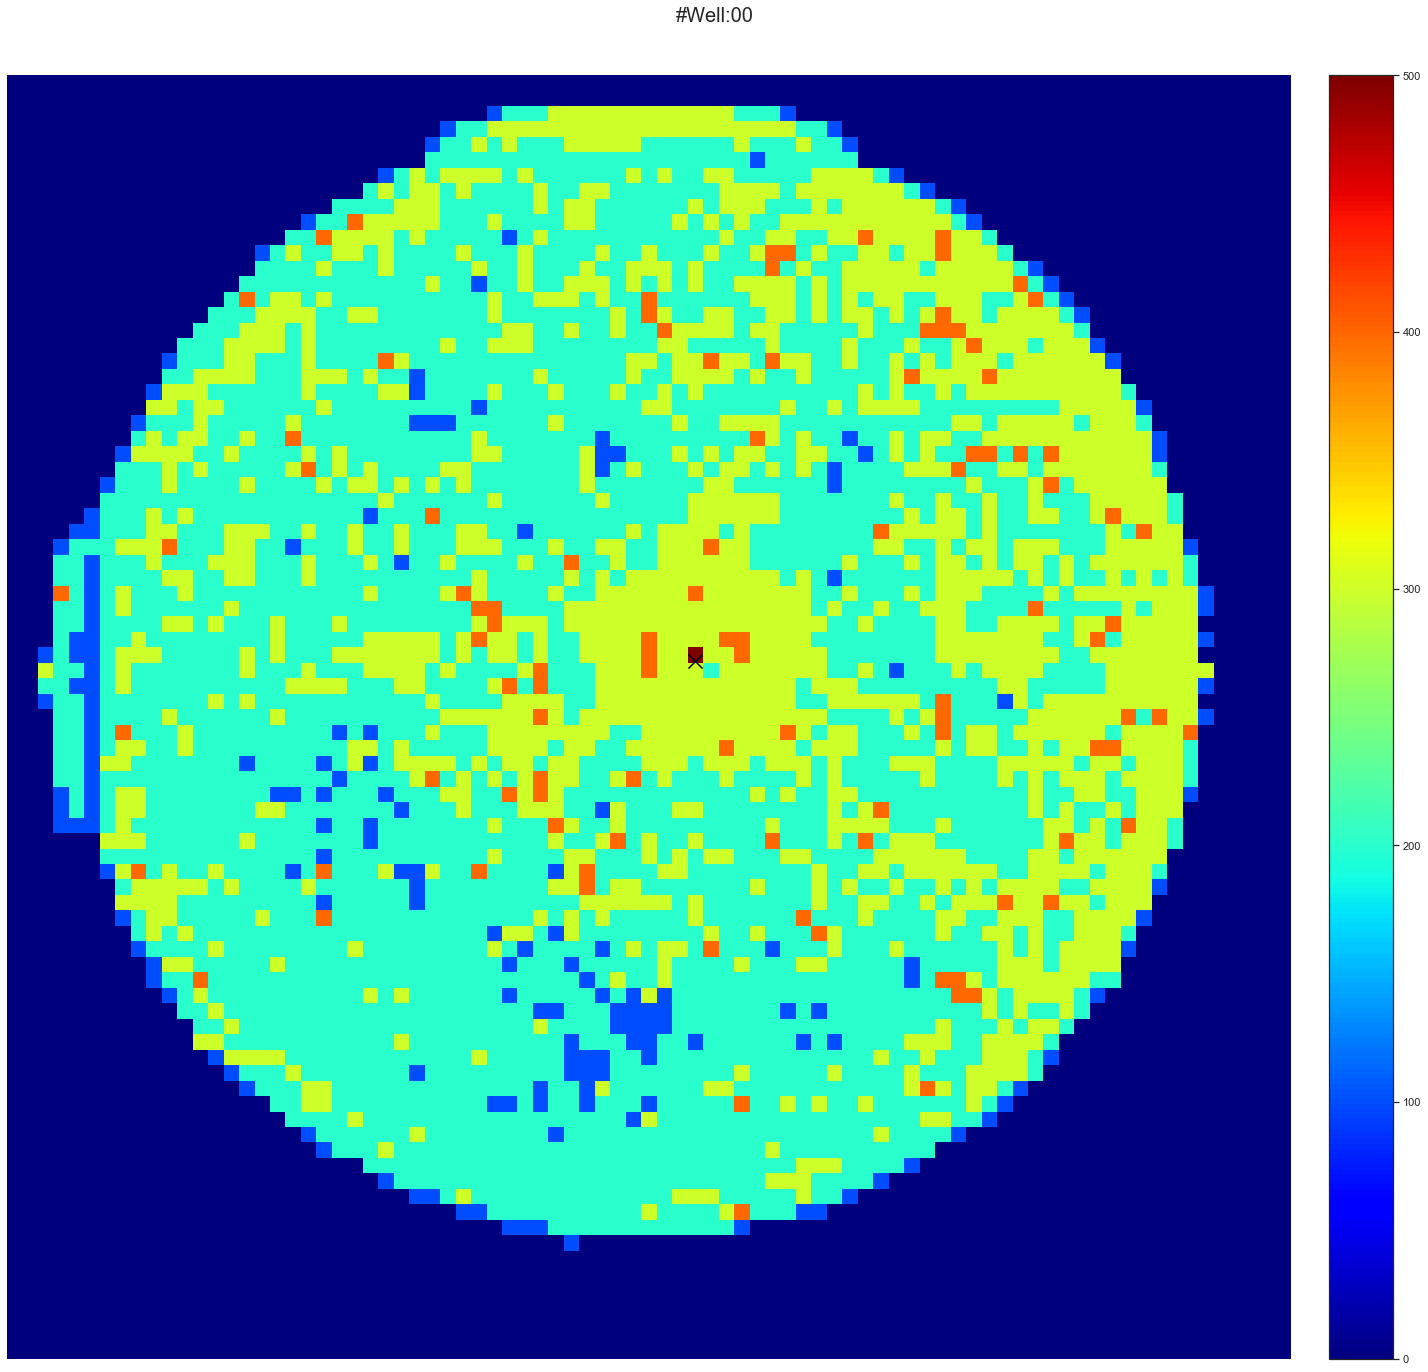

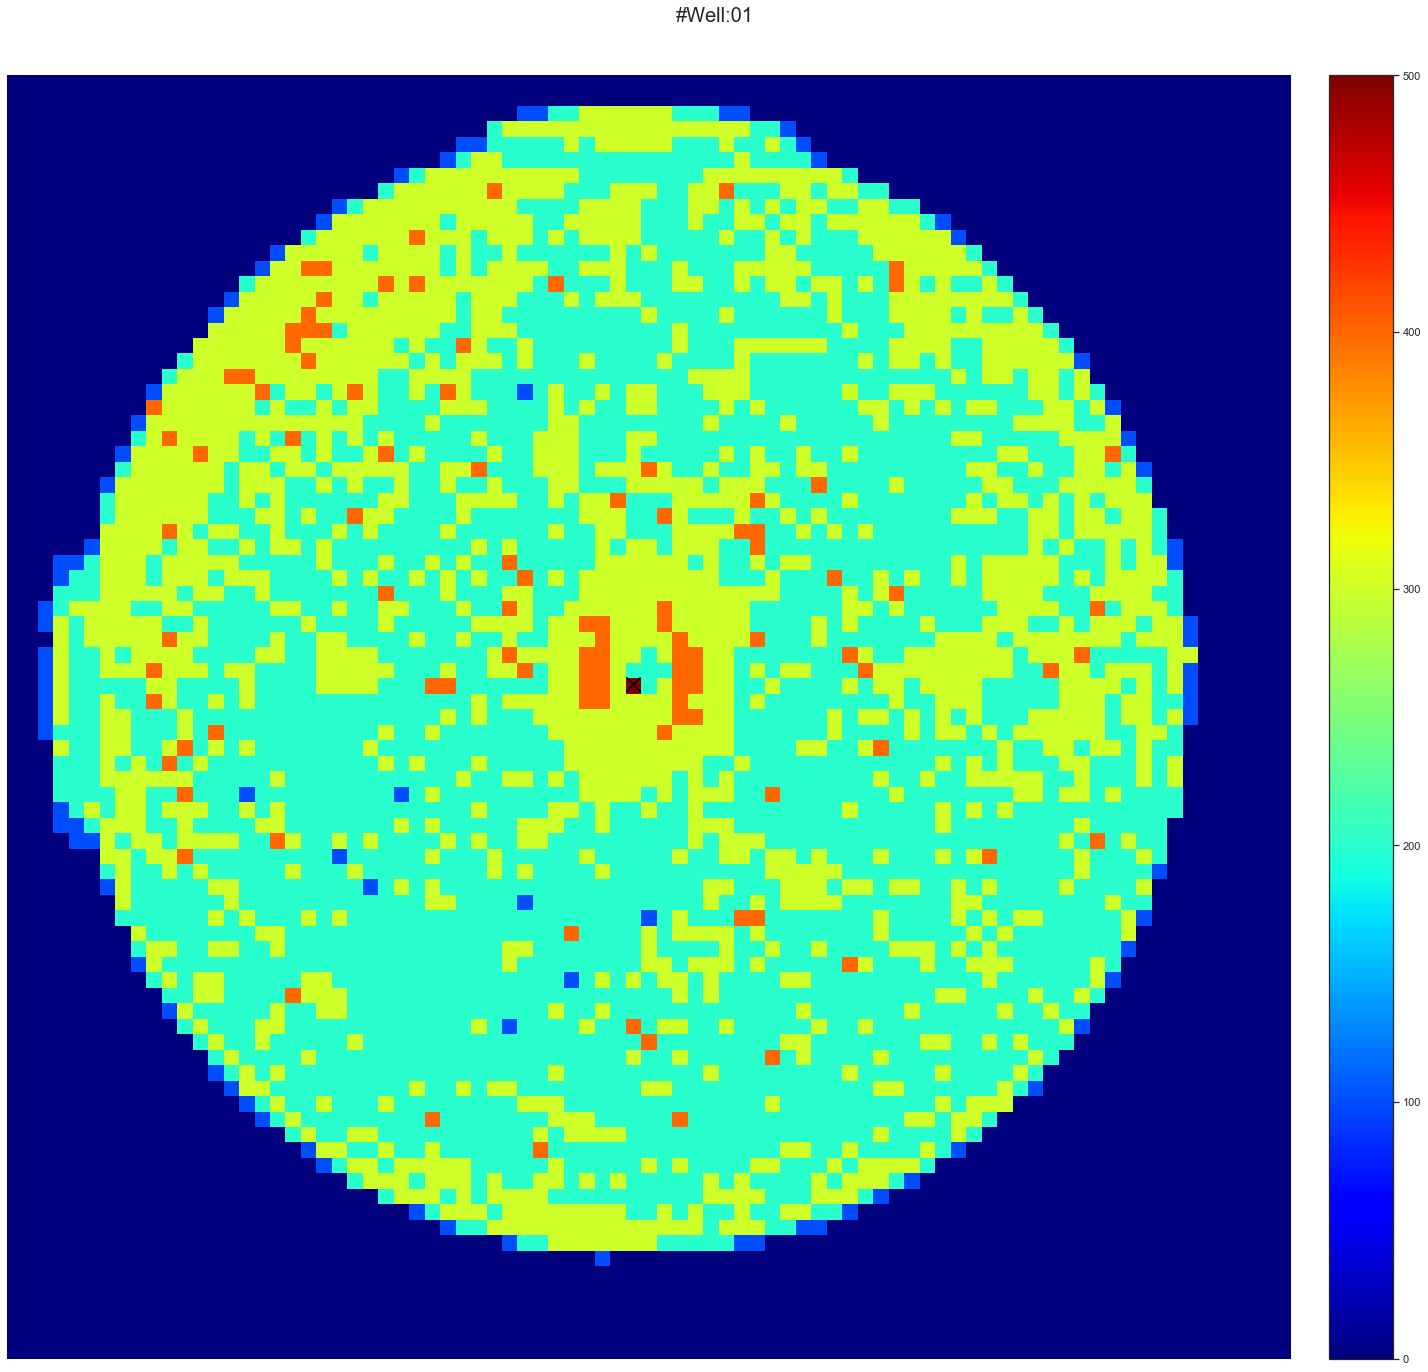

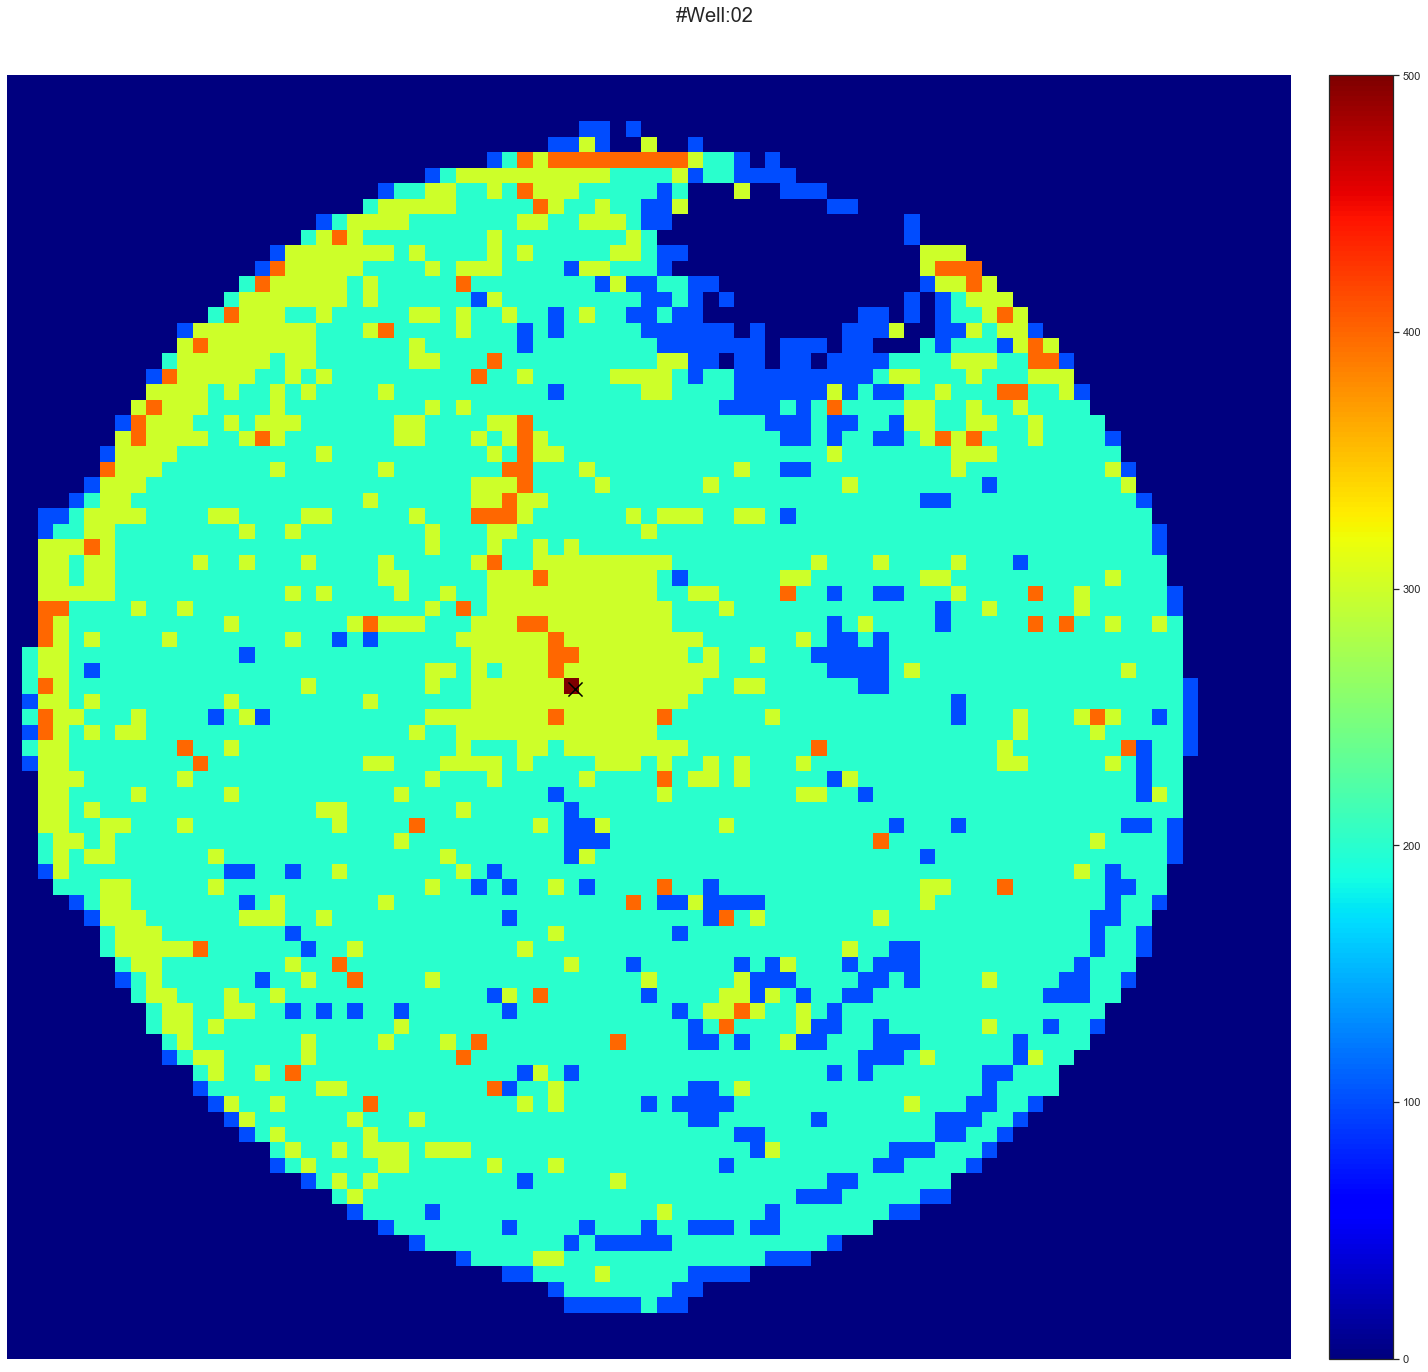

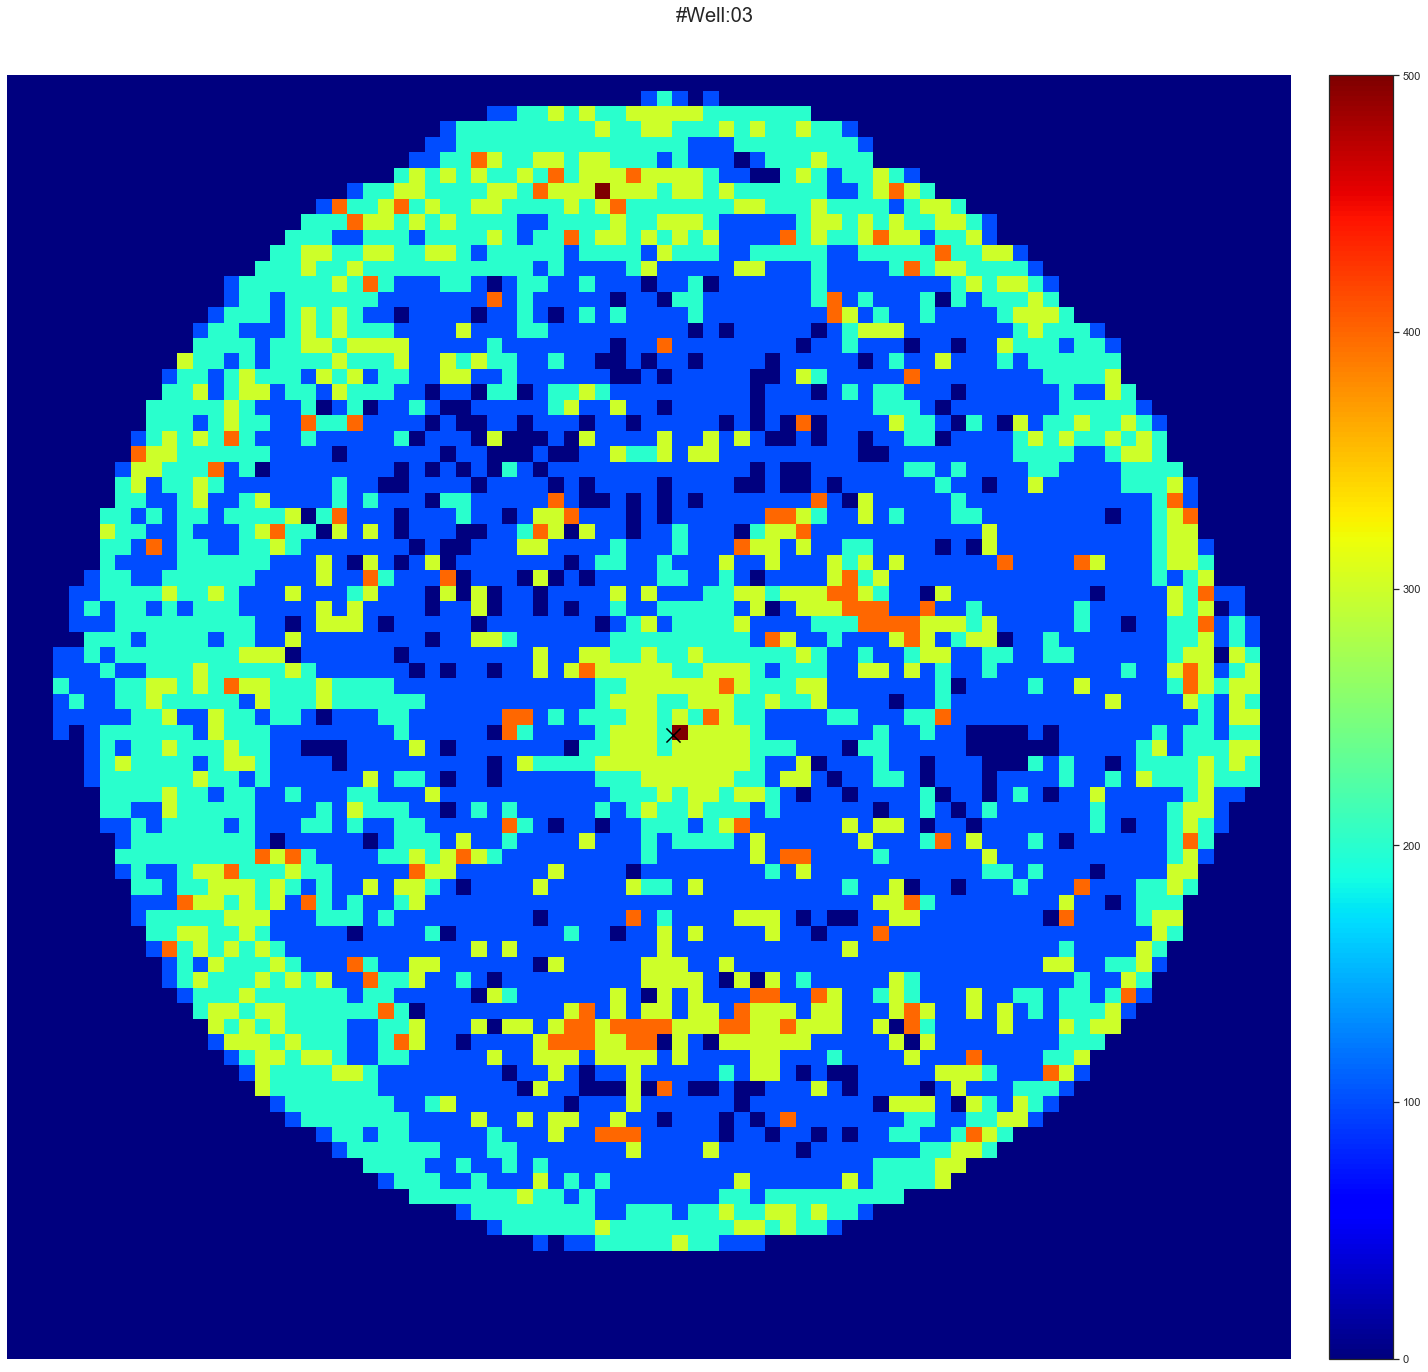

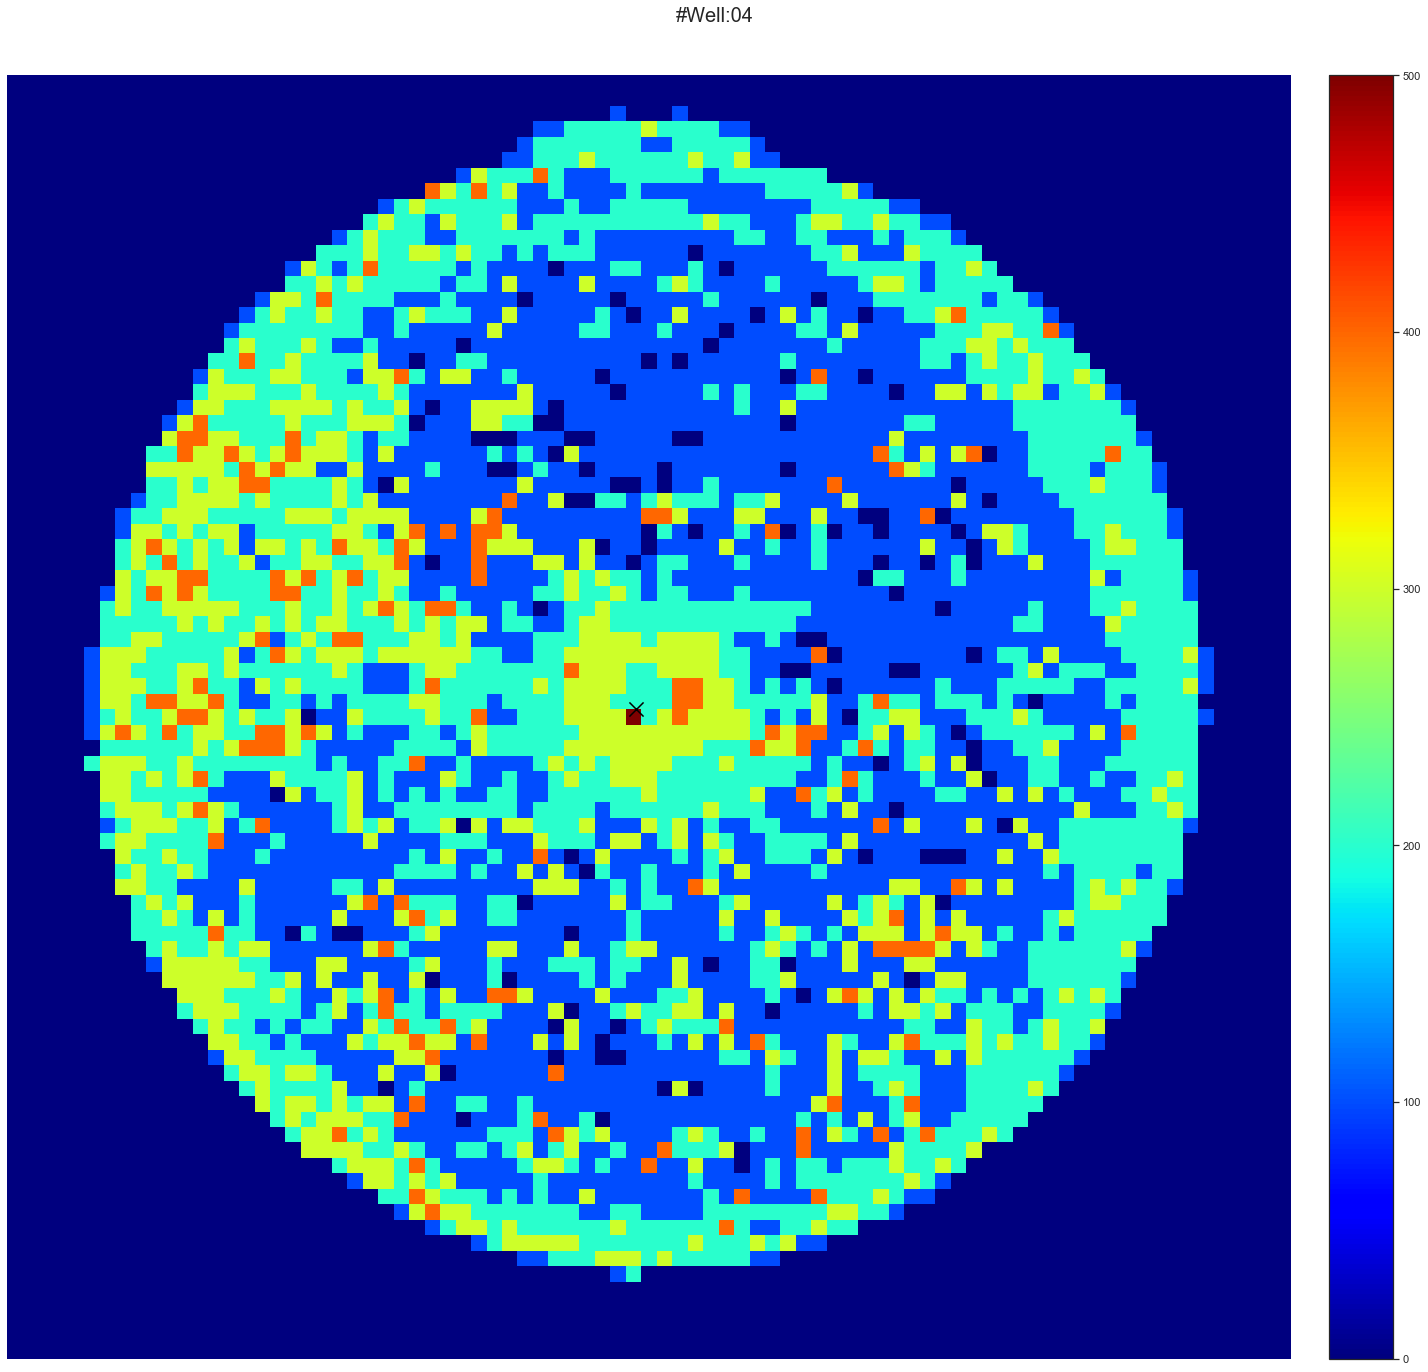

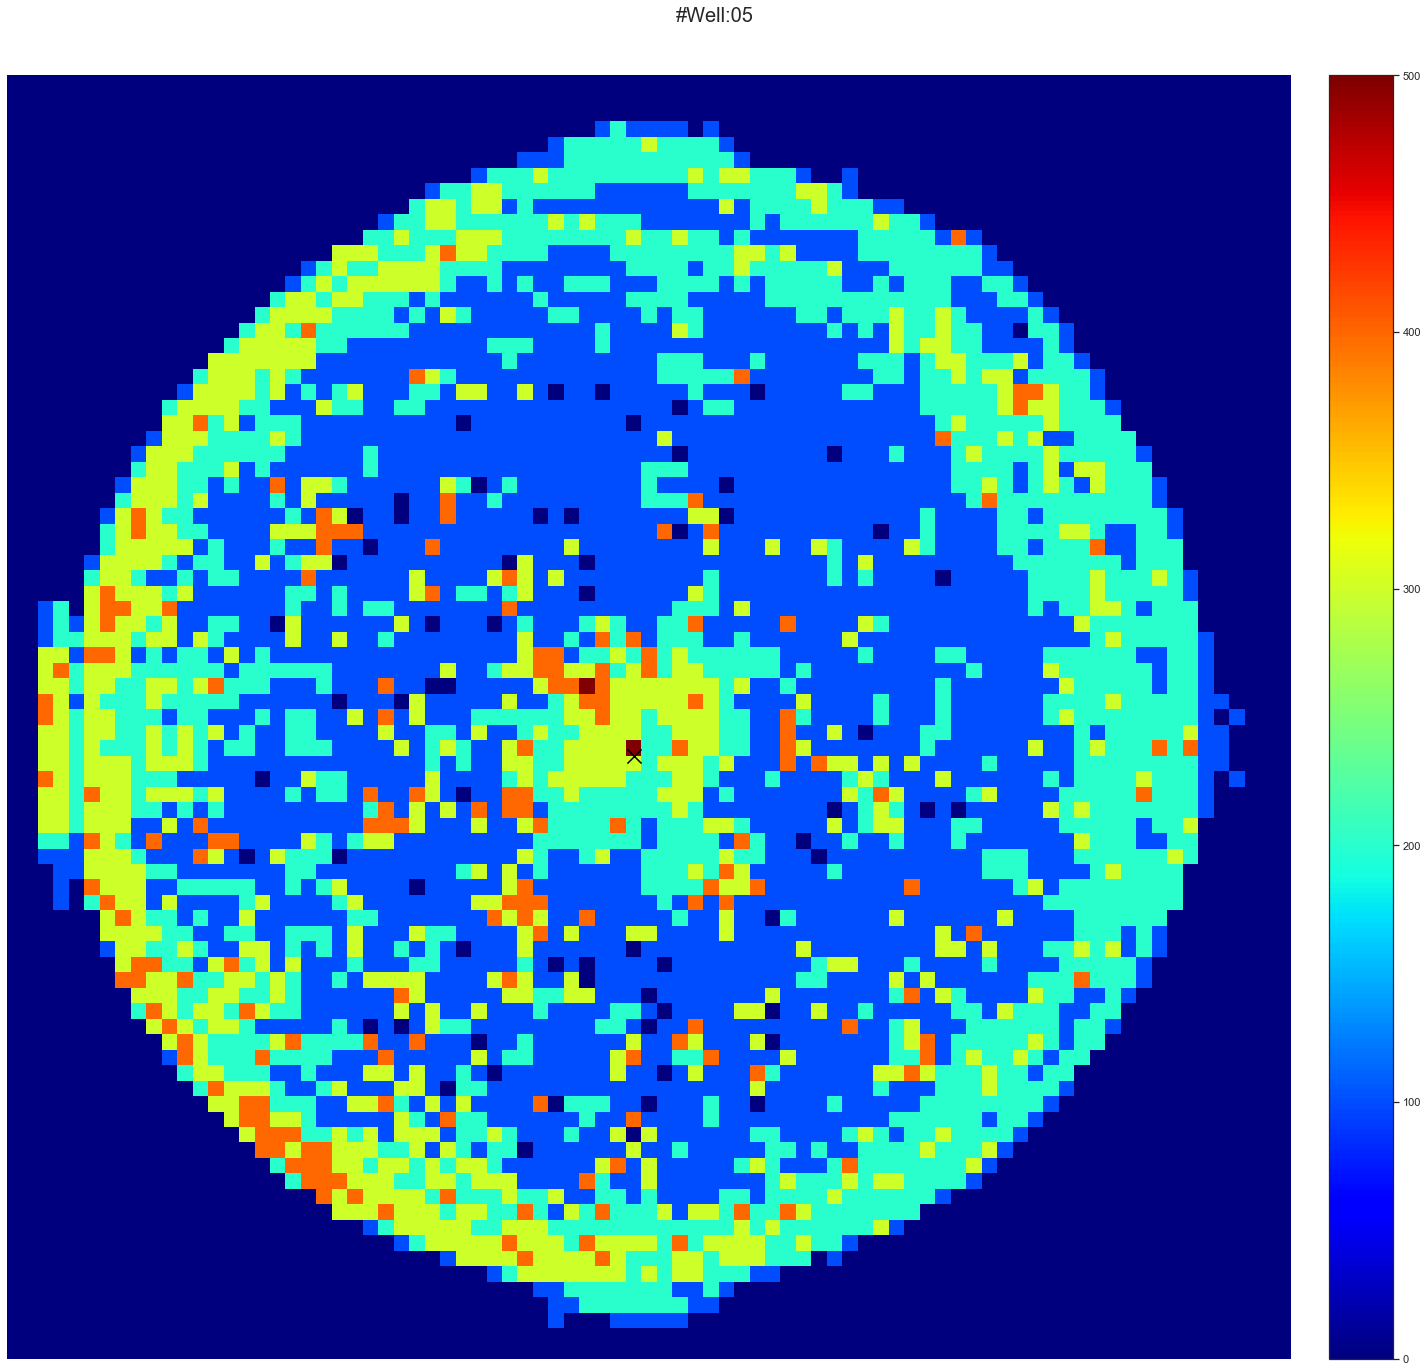


done.


In [3]:
tr_movies = [
            'MOG2',
            #'bg_MOG2',
            #'mdbg_MOG2',
            #'md_MOG2'
            ]

# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }


# 被接近対象の半径Xピクセル内に進入した回数をカウント
def count_entering(dl,dr,thre):
    ind1=np.where(dl<=thre)[0]
    ind2=np.where(dr<=thre)[0]
    x=np.zeros(len(dl))
    x[ind1]=1
    x[ind2]=-1
    n1=len(ind1)
    n2=len(ind2)
    return x,n1,n2

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path1 = os.path.join("{}/{}/csv".format(server_data, data_dir))
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    #mv_num = 2
    
    wnum = x*y
    
    data_dir = datasets[target]
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 1)

    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=2
    # ********************************************
    #x = 1
    #y = 1
    cntr=0
    arr_all=np.array([])
    icntr=0
    for i in tqdm(range(x)): # for image placement
        arrs=np.array([])
        jcntr=0    
        for j in tqdm(range(y)): # for image placement
            fig = plt.figure(figsize=(20,20))
            G = np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(cntr)), delimiter=",")
            disp_range=[eclo_frames[cntr],eclo_frames[cntr]+dframe_post]
            if disp_short==1:
                f1=np.int(disp_range[0])
                f2=np.int(disp_range[1])
            elif disp_short==2:
                f1=np.int(disp_range[0])
                f2=len(G)
            else:
                f1=0
                f2=len(G)

            wellnum=str(cntr).zfill(2)
            #fname=h+wellnum+'.csv'
            #dat=pd.read_csv(fname,header=None)
            #data=pd.DataFrame(dat.values,columns=['y-coord','x-coord'])

            oy,ox=G.T
            px=fs_dis[cntr,1,0]
            py=fs_dis[cntr,0,0]

            #ox=grav['center_x'].values
            #oy=grav['center_y'].values

            #dl=((dat.values[:,0]-target_loc[cntr,0])**2+(dat.values[:,1]-target_loc[cntr,1])**2)**0.5
            #dr=((dat.values[:,0]-target_loc[cntr,2])**2+(dat.values[:,1]-target_loc[cntr,3])**2)**0.5


            maxt=len(ox)
            sns.set(style="white", color_codes=True)

            xs=range(len(ox))
            # ***** Visualization *****
            #sns.jointplot(x='x-coord', y='y-coord', data=data, kind='kde') #kind=kde,hex
            fontsize=18

            if 0: # 滞在の時間分布の図を描画したい場合ここを1に。
                #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                #                 xlim=(10,210),ylim=(10,210),kind='kde')
                #fig = plt.figure()
                ax = fig.add_subplot(111)

                H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                              bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                              normed=True)
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
                cax = divider.append_axes('right', '5%', pad='3%')             
                ax.axis("off")
                H[3].set_clim(0,1e-4)
                ax.set_aspect('equal')
                fig.colorbar(H[3],cax=cax)
                H[3].set_clim(0,1e-4)
                #cbar.set_label("color bar", fontname="Times New Roman", fontsize=10)

                #plt.title('#Well:'+wellnum,fontsize=fontsize)
                
            if 1: # 滞在の時間分布の図を描画したい場合ここを1に。
                #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                #                 xlim=(10,210),ylim=(10,210),kind='kde')
                #fig = plt.figure()
                ax = fig.add_subplot(111)

                '''
                H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                              bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                              normed=False)
                '''
                H = np.histogram2d(ox[f1:f2],oy[f1:f2], bins=[np.linspace(0,210,84),np.linspace(0,210,84)])
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                
                c_thres=np.array([0,10,100,1000,10000])
                #H_ = H[0].copy()
                H = list(H)
                c_len = len(c_thres)
                for i in range(c_len):
                    if i != (c_len-1):
                        mask = np.where( (H[0]>c_thres[i]) & (H[0]<=c_thres[i+1]) )
                        H[0][mask] = 1+i
                    else:
                        mask=np.where( H[0]>c_thres[i] )
                        H[0][mask] = 1+i

                H[0] = H[0]*100
                
                im = ax.imshow(H[0].T, interpolation='nearest', origin='lower', extent=[0,210,0,210], cmap=cm.jet)
                divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
                plt.scatter(px, py, s=200, marker='x', c='black')
                cax = divider.append_axes('right', '5%', pad='3%')             
                ax.axis("off")
                #H[3].set_clim(0,1e-4)
                ax.set_aspect('equal')
                fig.colorbar(im, cax=cax)
                #H[3].set_clim(0,1000)
                #cbar.set_label("color bar", fontname="Times New Roman", fontsize=10)


            else: # 以下は様々な統計を描画               
                bias_thre=0.5 # Bias value

                # *** 1st row ***            
                c='blue'
                ax=plt.subplot2grid((3,6),(0,0),colspan=4)
                lp=plt.plot(xs[f1:f2], bias.values[f1:f2], color=c)
                plt.plot(xs[f1:f2], np.zeros(f2-f1), color='black')
                plt.plot(xs[f1:f2], np.ones(f2-f1)*bias_thre, color='black',alpha=0.5)
                plt.plot(xs[f1:f2], np.ones(f2-f1)*(-bias_thre), color='black',alpha=0.5)
                plt.xlim((-1,maxt+1))
                plt.ylim((-1.05,1.05))
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-1.05,1.05])
                plt.title('#Well:'+wellnum+'     Bias',fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)

                ax=plt.subplot2grid((3,6),(0,4))
                plt.hist(bias.values[f1:f2],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                plt.title('Hist dr',fontsize=fontsize)
                plt.ylim(-1.05,1.05)
                set_fontsize(ax,fontsize)
                ax.set_yticklabels([])
                xl=ax.get_xlim()


                ax=plt.subplot2grid((3,6),(0,5))
                plt.bar([0,1],[np.mean(dl[f1:f2]),np.mean(dr[f1:f2])],color=c)
                ax.set_xticks([0,1])
                ax.set_xticklabels(['dL','dR'],fontsize=fontsize)
                plt.title('Average',fontsize=fontsize)
                set_fontsize(ax,fontsize)



                # *** 2st row ***
                c='red'
                ind1=np.where(bias.values[f1:f2]>=bias_thre)[0]
                ind2=np.where(bias.values[f1:f2]<=-bias_thre)[0]
                n1=len(ind1)
                n2=len(ind2)

                biasmod=np.copy(bias.values[f1:f2])
                ind=np.where((biasmod<bias_thre)&(biasmod>(-bias_thre)))[0]
                biasmod[ind]=0.0

                plotdata=np.cumsum(biasmod)
                ymax=np.max(np.abs(plotdata))
                ax=plt.subplot2grid((3,6),(1,0),colspan=4)
                lp=plt.plot(xs[f1:f2], plotdata, color=c,linewidth=3)
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                         color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of Bias exceeding thre',fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)


                ax=plt.subplot2grid((3,6),(1,4))
                plt.hist(np.r_[biasmod[ind1],biasmod[ind2]],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                set_fontsize(ax,fontsize)
                ax.set_xlim(xl)

                ax=plt.subplot2grid((3,6),(1,5))
                plt.bar([0,1],[n1,n2],color=c)
                ax.set_xticks([0,1])
                ax.set_xticklabels(['High','Low'],fontsize=fontsize)
                plt.title('Count',fontsize=fontsize)
                set_fontsize(ax,fontsize)



                # *** 3rd row ***
                thres=[15,20,25]
                if cntr==0:
                    onset_frames=np.zeros((wnum,len(thres)))
                xx=np.zeros((len(thres),len(dl)))
                nn1=np.zeros(len(thres))
                nn2=np.zeros(len(thres))
                for ii in range(len(thres)):
                    xx[ii,:],nn1[ii],nn2[ii]=count_entering(dl[f1:f2],dr[f1:f2],thres[ii])
                if cntr==0:
                    n1s=nn1
                    n2s=nn2
                else:
                    n1s=np.c_[n1s,nn1]
                    n2s=np.c_[n2s,nn2]

                cs=['green','magenta','cyan']
                ax=plt.subplot2grid((3,6),(2,0),colspan=4)
                if 0:
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        lp=plt.plot(xs, d, color=cs[ii],linewidth=3)
                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]
                else:
                    tmpmax=np.zeros_like(thres)
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        ind_l=np.where(xx[ii]==+1)[0]
                        ind_r=np.where(xx[ii]==-1)[0]

                        lv,b=np.histogram(ind_l,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
                        rv,b=np.histogram(ind_r,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
                        #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max([np.max(np.abs(lv)),np.max(np.abs(rv))])

                        plotdata=np.cumsum(-rv+lv)
                        plt.plot(b[:-1],np.cumsum(-rv+lv),linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max(np.abs(plotdata))


                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]

                #ymax=np.max(np.abs(np.cumsum(xx[-1])))
                ymax=np.max(tmpmax)
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                for ii in range(len(thres)):        
                    plt.plot([onset_frames[cntr,ii],onset_frames[cntr,ii]],
                             [-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                        color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of count entering circle (G:15,M:20,C:25 pixel)',
                          fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)


                yl=np.max([np.max(nn1),np.max(nn2)])*1.1
                for ii in range(len(thres)):
                    ax=plt.subplot2grid((3,9),(2,6+ii))
                    plt.bar([0,1],[nn1[ii],nn2[ii]],color=cs[ii])
                    set_fontsize(ax,fontsize)
                    ax.set_xticks([0,1])
                    ax.set_xticklabels(['L','R'],fontsize=fontsize)
                    ax.set_ylim([0,yl])


            #sys.exit()
            # *************************
            
            if 0:
                fname = os.path.join(local_data,data_dir,'img3')
            else:
                fname = os.path.join(local_data,data_dir,'img3_not_normed_cthre')
            
            os.makedirs(fname, exist_ok=True)
            imfname = fname+'/well{}.png'.format(wellnum)
            plt.savefig(imfname)
            arr=np.array(Image.open(imfname))
            if jcntr==0: arrs=arr
            else: arrs=np.hstack((arrs,arr))
            jcntr+=1

            plt.suptitle('#Well:'+wellnum,verticalalignment='bottom',fontsize=20)        

            plt.tight_layout()
            plt.show()

            cntr+=1
        if icntr==0: arr_all=arrs
        else: arr_all=np.vstack((arr_all,arrs))
        icntr+=1

    pil_img = Image.fromarray(arr_all)
    pil_img.save(os.path.join(fname,'img-summary.png'))
    
#plt.figure(figsize=(15, 15))
#ax = sns.violinplot(x=distances['well'], y=pkmn["dr"], split=True) 

print('done.')

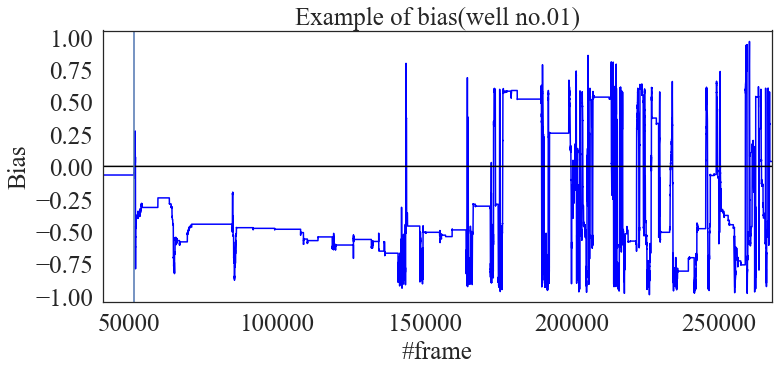

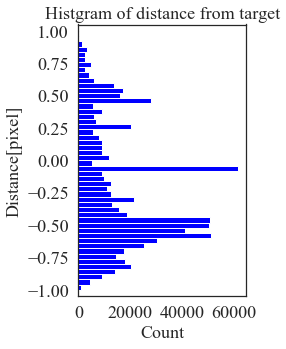

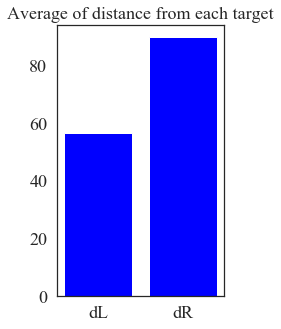

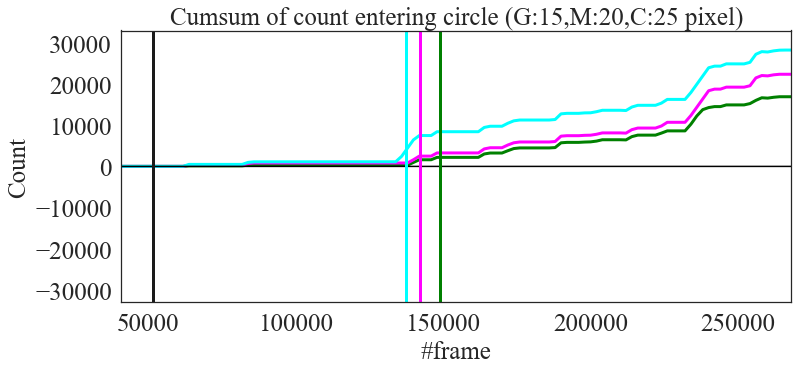

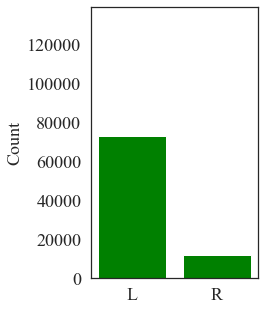

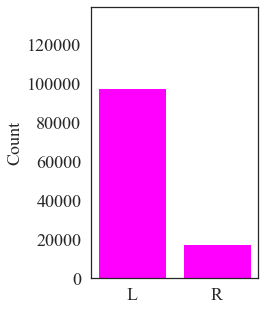

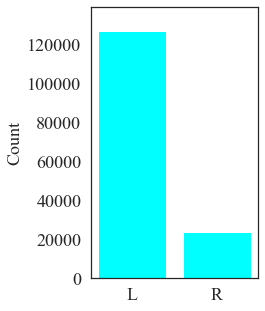

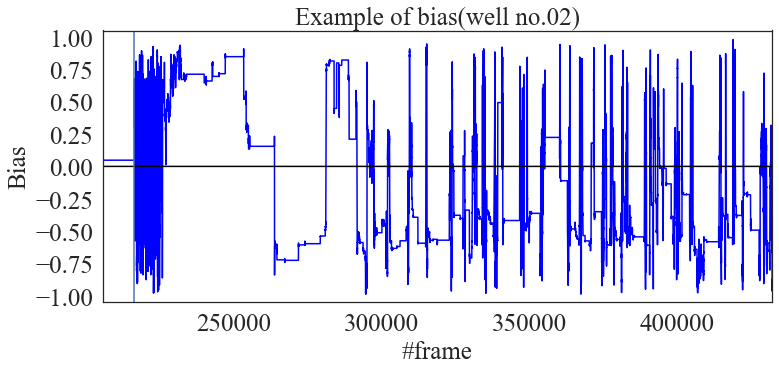

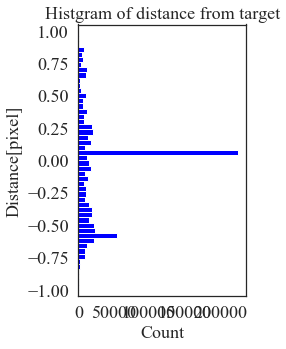

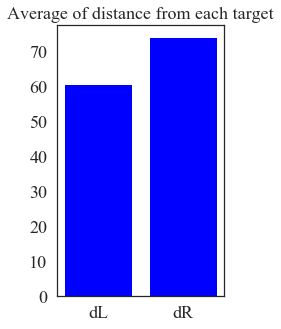

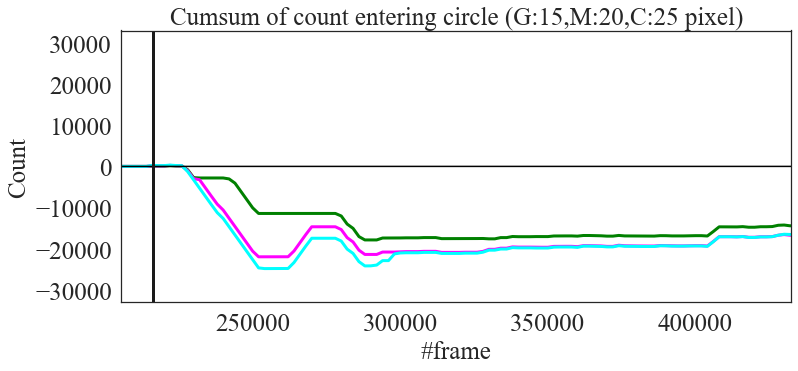

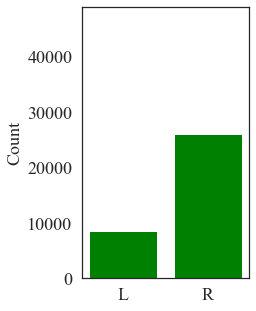

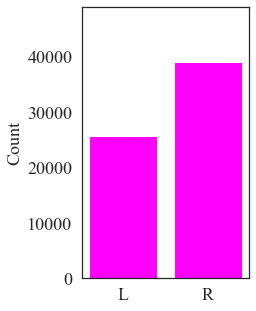

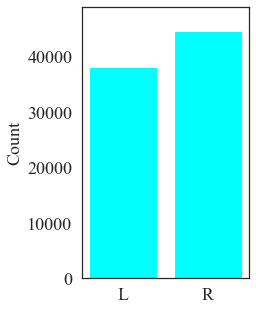

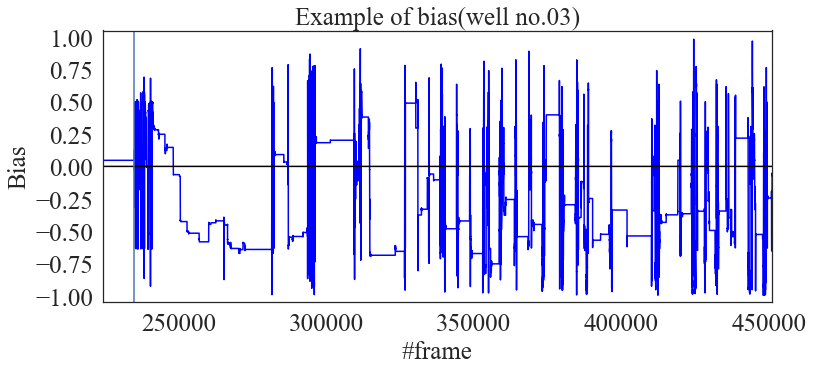

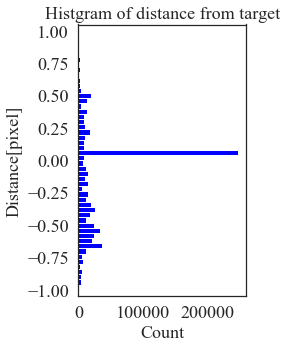

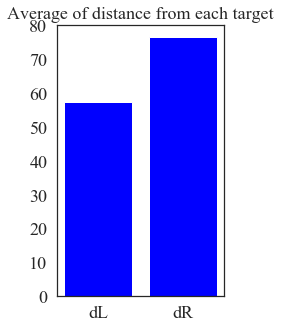

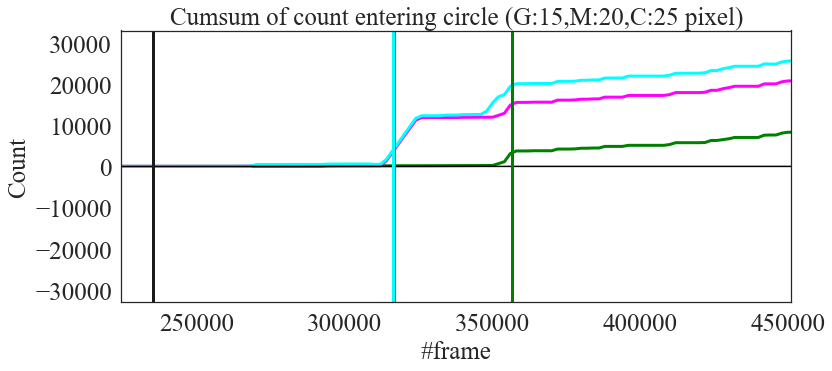

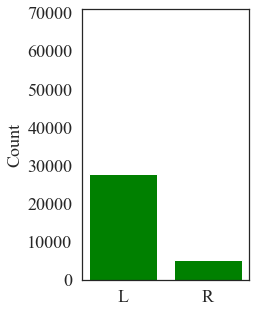

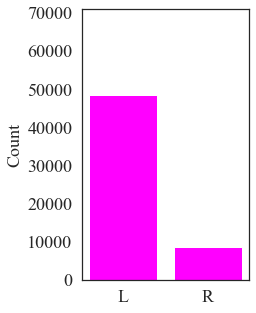

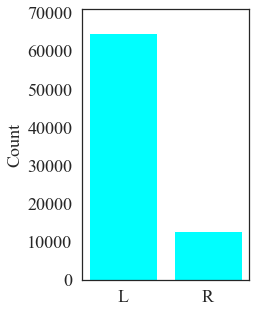

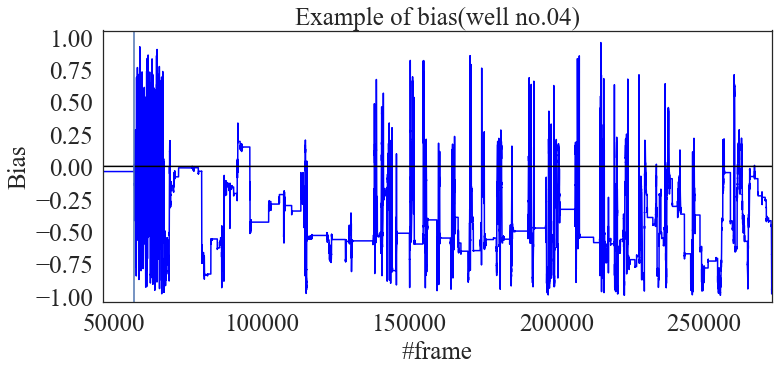

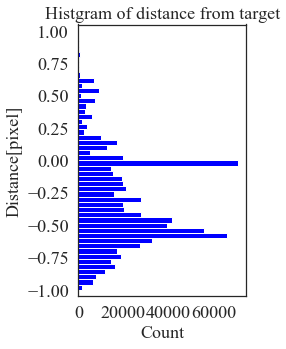

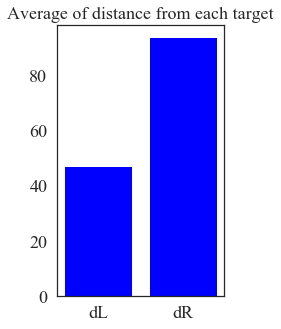

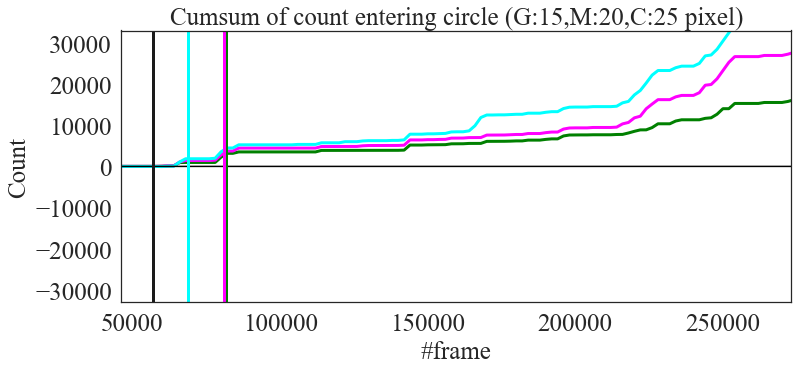

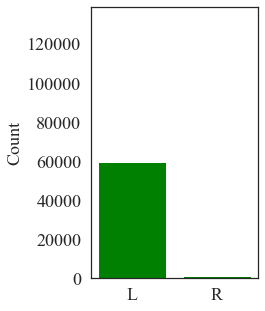

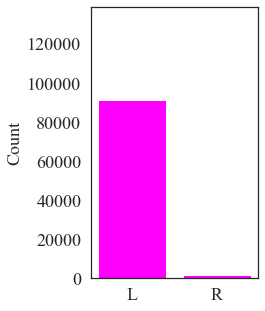

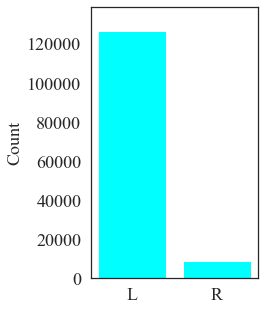

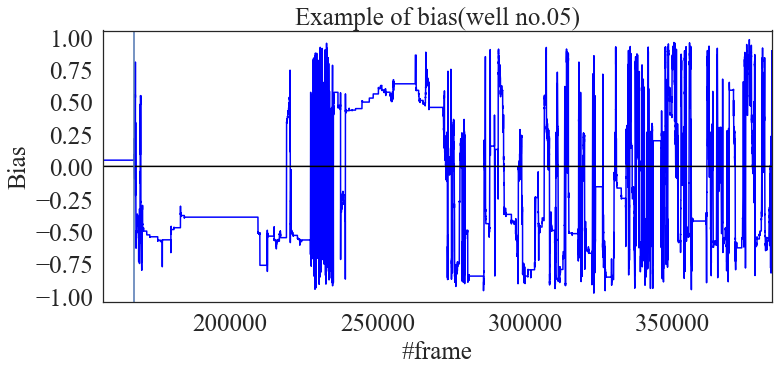

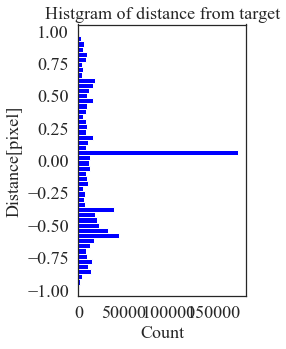

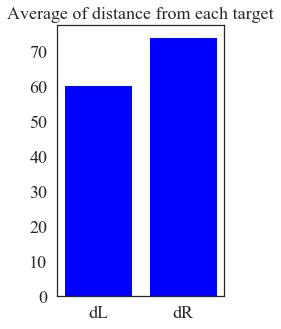

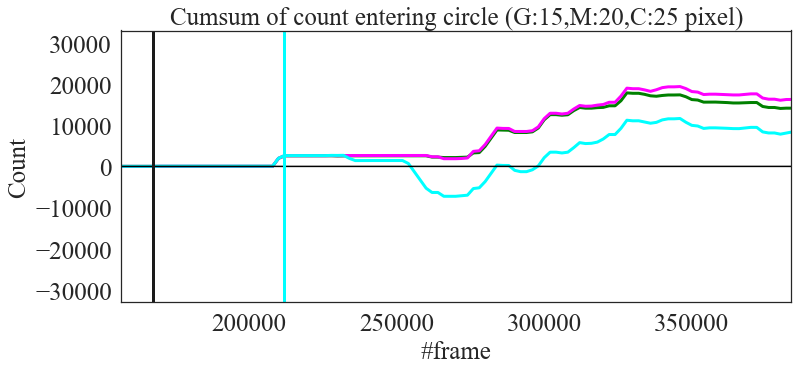

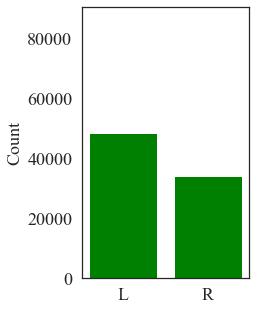

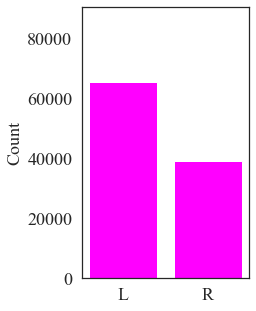

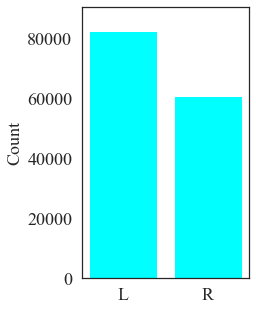

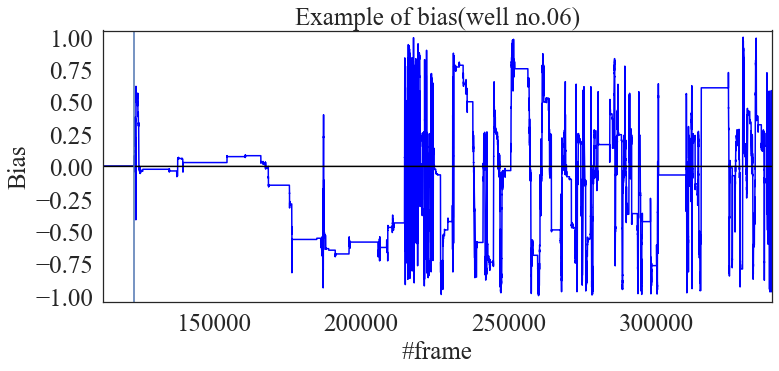

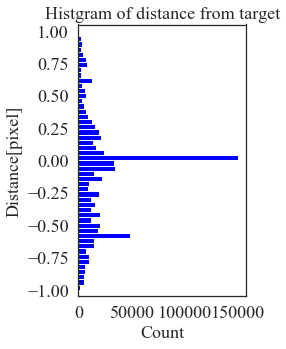

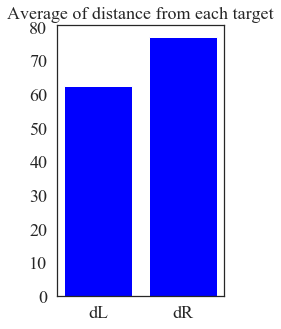

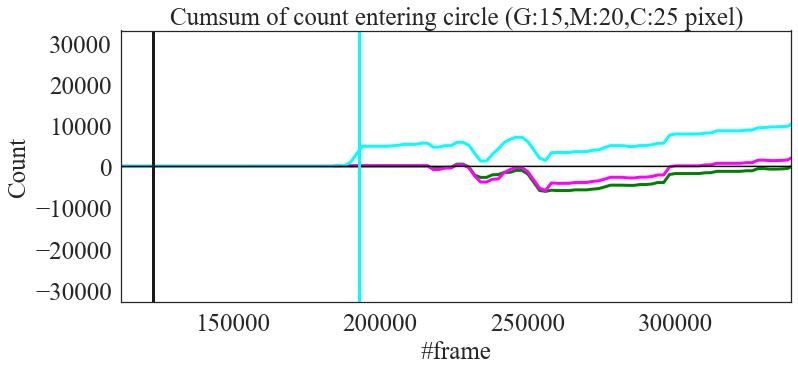

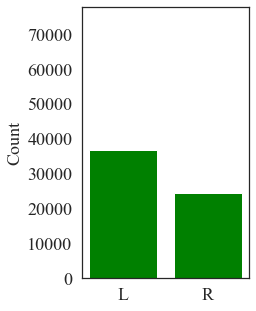

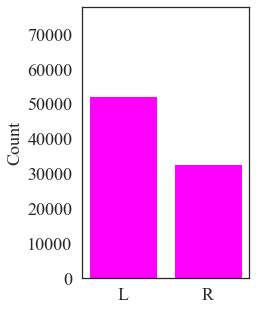

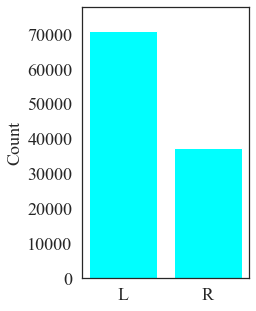

done.


In [5]:
tr_movies = [
            'MOG2',
            #'bg_MOG2',
            #'mdbg_MOG2',
            #'md_MOG2'
            ]

# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }


# 被接近対象の半径Xピクセル内に進入した回数をカウント
def count_entering(dl,dr,thre):
    ind1=np.where(dl<=thre)[0]
    ind2=np.where(dr<=thre)[0]
    x=np.zeros(len(dl))
    x[ind1]=1
    x[ind2]=-1
    n1=len(ind1)
    n2=len(ind2)
    return x,n1,n2

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path = os.path.join("{}/{}/csv".format(server_data, data_dir))
    fs_dis = np.loadtxt("{}/disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    #mv_num = 2
    
    wnum = x*y
    
    fps=3
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 3)

    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=1
    # ********************************************
    #x = 1
    #y = 1
    cntr=0
    arr_all=np.array([])
    icntr=0
    for i in tqdm(range(y)): # for image placement
        arrs=np.array([])
        jcntr=0    
        for j in tqdm(range(x)): # for image placement
            #fig = plt.figure(figsize=(20,20))
            G = np.loadtxt(os.path.join(file_path, 'dispersion3/well{:03}.csv'.format(cntr)), delimiter=",")
            disp_range=[eclo_frames[cntr]-dframe_pre,eclo_frames[cntr]+dframe_post]
            if disp_range==1:
                f1=np.int(disp_range[0])
                f2=np.int(disp_range[1])
            else:
                f1=0
                f2=len(G)

            wellnum=str(cntr).zfill(2)
            fname = os.path.join('./data',data_dir,'img3/well{}'.format(wellnum))
            os.makedirs(fname, exist_ok=True)
            #fname=h+wellnum+'.csv'
            #dat=pd.read_csv(fname,header=None)
            #data=pd.DataFrame(dat.values,columns=['y-coord','x-coord'])

            oy,ox=G.T
            lx=fs_dis[cntr,1,0]
            ly=fs_dis[cntr,0,0]
            rx=fs_dis[cntr,1,2]
            ry=fs_dis[cntr,0,2]

            #ox=grav['center_x'].values
            #oy=grav['center_y'].values

            dl=((ox-lx)**2+(oy-ly)**2)**0.5
            dr=((ox-rx)**2+(oy-ry)**2)**0.5

            #dl=((dat.values[:,0]-target_loc[cntr,0])**2+(dat.values[:,1]-target_loc[cntr,1])**2)**0.5
            #dr=((dat.values[:,0]-target_loc[cntr,2])**2+(dat.values[:,1]-target_loc[cntr,3])**2)**0.5

            dl_mean[cntr]=np.mean(dl)
            dl_std[cntr]=np.std(dl)
            dr_mean[cntr]=np.mean(dr)
            dr_std[cntr]=np.std(dr)

            w=np.ones(dl.size)*cntr
            df=pd.DataFrame(np.c_[dl,dr,w],columns=['dl','dr','well'])
            distances=pd.concat([distances,df])

            bias=(dl-dr)/(dl+dr)
            bias=pd.Series(bias)
            #bias=bias.rolling(window=30).mean()

            maxt=len(ox)
            sns.set(style="white", color_codes=True)

            xs=range(len(ox))
            # ***** Visualization *****
            #sns.jointplot(x='x-coord', y='y-coord', data=data, kind='kde') #kind=kde,hex
            fontsize=18
            fontsize1=25

            if 0: # 滞在の時間分布の図を描画したい場合ここを1に。
                #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                #                 xlim=(10,210),ylim=(10,210),kind='kde')
                #fig = plt.figure()
                ax = fig.add_subplot(111)

                H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                              bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                              normed=True)
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                #ax.axis("off")
                H[3].set_clim(0,1e-4)
                ax.set_aspect('equal')
                fig.colorbar(H[3],ax=ax)
                
                imfname = fname+'/heatmap.png'
                plt.savefig(imfname)
                
                plt.show()

                #plt.title('#Well:'+wellnum,fontsize=fontsize)


            else: # 以下は様々な統計を描画               
                bias_thre=0.5 # Bias value

                # *** 1st row ***            
                c='blue'
                fig = plt.figure(figsize=(12,5))
                lp=plt.plot(xs[f1:f2], bias.values[f1:f2], color=c)
                plt.plot(xs[f1:f2], np.zeros(f2-f1), color='black')
                #plt.plot(xs[f1:f2], np.ones(f2-f1)*bias_thre, color='black',alpha=0.5)
                #plt.plot(xs[f1:f2], np.ones(f2-f1)*(-bias_thre), color='black',alpha=0.5)
                plt.xlabel('#frame',fontsize=fontsize1,fontname='Times New Roman')
                plt.ylabel('Bias',fontsize=fontsize1,fontname='Times New Roman')
                plt.xlim((-1,maxt+1))
                plt.ylim((-1.05,1.05))
                plt.xticks(fontsize=fontsize1,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize1,fontname='Times New Roman')
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-1.05,1.05])
                #plt.title('#Well:'+wellnum+'     Bias',fontsize=fontsize, fontname='Times New Roman')
                plt.title('Example of bias(well no.{:02})'.format(cntr+1),fontsize=fontsize1, fontname='Times New Roman')
                #set_fontsize(fig,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)
                imfname = fname+'/bias.png'
                plt.savefig(imfname)
                plt.show()

                fig = plt.figure(figsize=(3,5))
                plt.hist(bias.values[f1:f2],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                plt.title('Histgram of distance from target',fontsize=fontsize,fontname='Times New Roman')
                plt.ylim(-1.05,1.05)
                #set_fontsize(ax,fontsize)
                #ax.set_yticklabels([])
                #plt.yticks()
                plt.xlabel('Count',fontsize=fontsize,fontname='Times New Roman')
                plt.ylabel('Distance[pixel]',fontsize=fontsize,fontname='Times New Roman')
                plt.xticks(fontsize=fontsize,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize,fontname='Times New Roman')
                #xl=ax.get_xlim()
                imfname = fname+'/bias_hist.png'
                plt.savefig(imfname)
                plt.show()


                fig = plt.figure(figsize=(3,5))
                plt.bar([0,1],[np.mean(dl[f1:f2]),np.mean(dr[f1:f2])],color=c)
                #ax.set_xticks([0,1])
                #ax.set_xticklabels(['dL','dR'],fontsize=fontsize)
                plt.xticks([0,1],['dL','dR'],fontsize=fontsize,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize,fontname='Times New Roman')
                plt.title('Average of distance from each target',fontsize=fontsize,fontname='Times New Roman')
                #set_fontsize(ax,fontsize)
                imfname = fname+'/bias_ave.png'
                plt.savefig(imfname)
                plt.show()
                '''
                # *** 2st row ***
                c='red'
                ind1=np.where(bias.values[f1:f2]>=bias_thre)[0]
                ind2=np.where(bias.values[f1:f2]<=-bias_thre)[0]
                n1=len(ind1)
                n2=len(ind2)

                biasmod=np.copy(bias.values[f1:f2])
                ind=np.where((biasmod<bias_thre)&(biasmod>(-bias_thre)))[0]
                biasmod[ind]=0.0

                plotdata=np.cumsum(biasmod)
                ymax=np.max(np.abs(plotdata))
                fig = plt.figure(figsize=(12,5))
                lp=plt.plot(xs[f1:f2], plotdata, color=c,linewidth=3)
                plt.xlabel('#frame',fontsize=fontsize1,fontname='Times New Roman')
                plt.ylabel('#frame',fontsize=fontsize1,fontname='Times New Roman')
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                         color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of Bias exceeding thre',fontsize=fontsize1,fontname='Times New Roman')
                plt.xticks(fontsize=fontsize1,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize1,fontname='Times New Roman')
                #set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)
                imfname = fname+'/cumsum_bias.png'
                plt.savefig(imfname)
                plt.show()

                fig = plt.figure(figsize=(3,5))
                plt.hist(np.r_[biasmod[ind1],biasmod[ind2]],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                set_fontsize(ax,fontsize)
                #ax.set_xlim(xl)
                #plt.xlim(xl)
                plt.title('Histgram of distance from target',fontsize=fontsize,fontname='Times New Roman')
                plt.xticks(fontsize=fontsize,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize,fontname='Times New Roman')
                imfname = fname+'/cumsum_bias_hist.png'
                plt.savefig(imfname)
                plt.show()

                fig = plt.figure(figsize=(5,5))
                plt.bar([0,1],[n1,n2],color=c)
                #ax.set_xticks([0,1])
                #ax.set_xticklabels(['High','Low'],fontsize=fontsize)
                plt.xlabel('Count',fontsize=fontsize,fontname='Times New Roman')
                plt.ylabel('Distance[pixel]',fontsize=fontsize,fontname='Times New Roman')
                plt.xticks([0,1],['High','Low'],fontsize=fontsize,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize,fontname='Times New Roman')
                plt.title('Count',fontsize=fontsize,fontname='Times New Roman')
                set_fontsize(ax,fontsize)
                imfname = fname+'/cumsum_bias_count.png'
                plt.savefig(imfname)
                plt.show()
                '''

                # *** 3rd row ***
                thres=[15,20,25]
                if cntr==0:
                    onset_frames=np.zeros((wnum,len(thres)))
                xx=np.zeros((len(thres),len(dl[f1:f2])))
                nn1=np.zeros(len(thres))
                nn2=np.zeros(len(thres))
                for ii in range(len(thres)):
                    xx[ii,:],nn1[ii],nn2[ii]=count_entering(dl[f1:f2],dr[f1:f2],thres[ii])
                if cntr==0:
                    n1s=nn1
                    n2s=nn2
                else:
                    n1s=np.c_[n1s,nn1]
                    n2s=np.c_[n2s,nn2]

                cs=['green','magenta','cyan']
                fig = plt.figure(figsize=(12,5))
                if 0:
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        lp=plt.plot(xs, d, color=cs[ii],linewidth=3)
                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]
                else:
                    tmpmax=np.zeros_like(thres)
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        ind_l=np.where(xx[ii]==+1)[0]
                        ind_r=np.where(xx[ii]==-1)[0]

                        lv,b=np.histogram(ind_l,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
                        rv,b=np.histogram(ind_r,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
                        #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max([np.max(np.abs(lv)),np.max(np.abs(rv))])

                        plotdata=np.cumsum(-rv+lv)
                        plt.plot(b[:-1],np.cumsum(-rv+lv),linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max(np.abs(plotdata))


                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]

                #ymax=np.max(np.abs(np.cumsum(xx[-1])))
                #ymax=np.max(tmpmax)
                ymax=30000
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.xlabel('#frame',fontsize=fontsize1,fontname='Times New Roman')
                plt.ylabel('Count',fontsize=fontsize1,fontname='Times New Roman')
                plt.ylim([-ymax*1.1,ymax*1.1])
                for ii in range(len(thres)):        
                    plt.plot([onset_frames[cntr,ii],onset_frames[cntr,ii]],
                             [-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                        color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of count entering circle (G:15,M:20,C:25 pixel)',
                          fontsize=fontsize1,fontname='Times New Roman')
                plt.xticks(fontsize=fontsize1,fontname='Times New Roman')
                plt.yticks(fontsize=fontsize1,fontname='Times New Roman')
                #set_fontsize(fig,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)
                    
                imfname = fname+'/circle.png'
                plt.savefig(imfname)                    
                plt.show()


                yl=np.max([np.max(nn1),np.max(nn2)])*1.1
                for ii in range(len(thres)):
                    fig = plt.figure(figsize=(3,5))
                    #plt.title('Count',fontsize=fontsize,fontname='Times New Roman')
                    plt.bar([0,1],[nn1[ii],nn2[ii]],color=cs[ii])
                    #set_fontsize(ax,fontsize)
                    #ax.set_xticks([0,1])
                    #ax.set_xticklabels(['L','R'],fontsize=fontsize,fontname='Times New Roman')
                    plt.ylabel('Count',fontsize=fontsize,fontname='Times New Roman')
                    plt.yticks(fontsize=fontsize,fontname='Times New Roman')
                    #ax.set_yticklabels(fontsize=fontsize,fontname='Times New Roman')
                    plt.xticks([0,1],['L','R'],fontsize=fontsize,fontname='Times New Roman')
                    #ax.set_ylim([0,yl])
                    plt.ylim([0,yl])
                    imfname = fname+'/circle_count{}.png'.format(ii)
                    plt.savefig(imfname)
                    plt.show()


            #sys.exit()
            # *************************
            
            
            #arr=np.array(Image.open(imfname))
            #if jcntr==0: arrs=arr
            #else: arrs=np.hstack((arrs,arr))
            jcntr+=1

            #plt.suptitle('#Well:'+wellnum,verticalalignment='bottom',fontsize=20)        

            #plt.tight_layout()
            #plt.show()
            
            cntr+=1
        #if icntr==0: arr_all=arrs
        #else: arr_all=np.vstack((arr_all,arrs))
        icntr+=1

    #pil_img = Image.fromarray(arr_all)
    #pil_img.save(os.path.join(fname,'img-summary.png'))
    
#plt.figure(figsize=(15, 15))
#ax = sns.violinplot(x=distances['well'], y=pkmn["dr"], split=True) 

print('done.')

In [63]:
tmpmax

array([ 60854,  80001, 103604])

In [64]:
nn1[2]

126884.0

In [65]:
nn2[2]

23579.0

In [72]:
np.cumsum(lv)

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,     21,     21,     21,     21,     21,     21,
          488,    488,    488,    488,    488,    488,    488,    488,
          488,    488,    979,   1112,   1112,   1112,   1112,   1112,
         1112,   1112,   1112,   1112,   1112,   1112,   1112,   1112,
         1112,   1112,   1112,   1112,   1112,   1112,   1112,   1125,
         1125,   1125,   1125,   1125,   2436,   4436,   6436,   7532,
         7532,   7532,   8461,   8461,   8461,   8461,   8461,   8461,
         8461,   8461,   9507,   9796,   9796,   9796,  10528,  11107,
        11305,  11305,  11305,  11305,  11305,  11305,  11431,  12820,
        12946,  12946,  12946,  13057,  13122,  13383,  13754,  13757,
        13757,  13757,  13757,  14646,  15065,  15065,  15068,  15068,
      

In [73]:
np.cumsum(rv)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,    38,
          38,    38,    38,    38,    38,    38,    38,    38,    38,
          38,    44,    44,    44,    44,    44,    44,    44,    44,
          44,    44,    44,    44,    44,    60,    60,    60,    60,
          62,   104,   104,   126,   126,   126,   126,   189,   230,
         230,   230,   230,   230,   230,   230,   230,   230,   230,
         230,   230,   230,   230,   230,   230,   230,   230,   240,
         240,   240,

In [79]:
len(xx[0])

740829

In [80]:
f2-f1

740829

In [8]:
disp_range

[112362.0, 339162.0]

In [9]:
tr_movies = [
            'MOG2',
            #'bg_MOG2',
            #'mdbg_MOG2',
            #'md_MOG2'
            ]

# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }


# wellの左右どちらにいたかをカウント
def count_area(Gx,Px,eclo):
    ind1=np.where(Gx<=Px)[0]
    ind2=np.where(Gx>Px)[0]
    x1=np.zeros(len(Gx))
    x2=np.zeros(len(Gx))
    x1[ind1]=1
    x2[ind2]=1
    x1[:eclo]=0
    x2[:eclo]=0
    n1=len(np.where(x1==1)[0])
    n2=len(np.where(x2==1)[0])
    return x1,x2,n1,n2

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path1 = os.path.join("{}/{}/csv".format(server_data, data_dir))
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    #mv_num = 2
    
    wnum = x*y
    
    data_dir = datasets[target]
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    if '3' in target:
        fs_dis = fs_dis.reshape(wnum, 2, 1)
    else:
        fs_dis = fs_dis.reshape(wnum, 2, 3)

    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=2
    # ********************************************
    #x = 1
    #y = 1
    
    print(target)
    print(eclo_frames)
    
    for i in range(wnum): # for image placement
        #fig = plt.figure(figsize=(20,20))
        G = np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(i)), delimiter=",")
        #disp_range=[eclo_frames[i]-dframe_pre,eclo_frames[i]+dframe_post]
        disp_range=[eclo_frames[i],eclo_frames[i]+dframe_post]
        if disp_short==1:
            f1=np.int(disp_range[0])
            f2=np.int(disp_range[1])
        elif disp_short==2:
            f1=np.int(disp_range[0])
            f2=len(G)
        else:
            f1=0
            f2=len(G)

        oy,ox=G.T

        if '3' in target:
            py=fs_dis[i,0,0]
            px=fs_dis[i,1,0]
        else:
            py=fs_dis[i,0,1]
            px=fs_dis[i,1,1]
            
        xl,xr,nl,nr = count_area(ox,px,f1)
        
        print('nl:',nl,',nr:',nr,',nl-nr:',nl-nr,',nl+nr:',nr+nl,',f1:',f1, ',all:',nr+nl+f1)
        

[183627. 214794. 213834. 231261. 166434. 212280.]
w1118_1
nl: 283057 ,nr: 311031 ,nl-nr: -27974 ,nl+nr: 594088 ,f1: 183627 ,all: 777715
nl: 200277 ,nr: 362644 ,nl-nr: -162367 ,nl+nr: 562921 ,f1: 214794 ,all: 777715
nl: 474889 ,nr: 88992 ,nl-nr: 385897 ,nl+nr: 563881 ,f1: 213834 ,all: 777715
nl: 244647 ,nr: 301807 ,nl-nr: -57160 ,nl+nr: 546454 ,f1: 231261 ,all: 777715
nl: 319279 ,nr: 292002 ,nl-nr: 27277 ,nl+nr: 611281 ,f1: 166434 ,all: 777715
nl: 356722 ,nr: 208713 ,nl-nr: 148009 ,nl+nr: 565435 ,f1: 212280 ,all: 777715
[ 51912. 216351. 235089.  57066. 167607. 123162.]
w1118_2
nl: 480093 ,nr: 208824 ,nl-nr: 271269 ,nl+nr: 688917 ,f1: 51912 ,all: 740829
nl: 324710 ,nr: 199768 ,nl-nr: 124942 ,nl+nr: 524478 ,f1: 216351 ,all: 740829
nl: 353874 ,nr: 151866 ,nl-nr: 202008 ,nl+nr: 505740 ,f1: 235089 ,all: 740829
nl: 565308 ,nr: 118455 ,nl-nr: 446853 ,nl+nr: 683763 ,f1: 57066 ,all: 740829
nl: 357911 ,nr: 215311 ,nl-nr: 142600 ,nl+nr: 573222 ,f1: 167607 ,all: 740829
nl: 380445 ,nr: 237222 ,nl-nr

In [15]:
target

'w1118_3'

In [28]:
target = targets[5]
data_dir = datasets[target]
tar_mv = movies[target][2]

tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

# 前景用動画読み込みの設定
movie = cv2.VideoCapture(tar_path)

# 動画ファイル保存用の設定
fps = int(movie.get(cv2.CAP_PROP_FPS)) 
print(fps)

3


In [3]:
eclo_frames

array([130563., 137589.,  72282., 123513., 119973.,  86943.])